# Import library and load cleaned dataset

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# load dataset
df = pd.read_csv('dataset/Kost Data (Cleaned).csv')
display(df.head())
print(df.shape)

link_kost  \
0  https://infokost.id/listing/ruoptions-caraka-i...   
1  https://infokost.id/listing/ruoptions-caraka-i...   
2  https://infokost.id/listing/kost-pondok-latifa...   
3  https://infokost.id/listing/kost-the-loft-cobl...   
4  https://infokost.id/listing/kost-perum-alamand...   

                             nama_kost  \
0              Caraka Inn Pesanggrahan   
1              Caraka Inn Pesanggrahan   
2   Kost Pondok Latifa Coblong Bandung   
3        Kost The Loft Coblong Bandung   
4  Kost Perum Alamanda Coblong Bandung   

                                       alamat_kost_1  \
0  Jl. Pesanggrahan V No.25, RT.8/RW.7, South Pet...   
1  Jl. Pesanggrahan V No.25, RT.8/RW.7, South Pet...   
2  jl titimplik no18 rt07 rw09 kelurahan sadang s...   
3   jln. cisitu baru no. 60b. dago. coblong. bandung   
4  Jl. Tubagus Ismail Raya No.60, Sekeloa, Kecama...   

                                       alamat_kost_2      latitude  \
0  PETUKANGAN SELATAN,           PESANGGRAHAN,   ...    -6.2400225   
1  PETUKANGAN SELATAN,           PESANGGRAHAN,   ...    -6.2400225   
2  GEGERKALONG,           SUKASARI,           KOT...  -6.896961223   
3  BATUNUNGGAL,           BANDUNG KIDUL,         ...   -6.88379416   
4  SADANG SERANG,           COBLONG,           KO...  -6.885143026   

    longitude   jenis_kost  luas_kamar  \
0  106.754748  Kost Campur         0.0   
1  106.754748  Kost Campur         0.0   
2  107.621984   Kost Putri         9.0   
3  107.612552   Kost Putra        14.0   
4  107.622391  Kost Campur        11.0   

                                    fasilitas_gedung  \
0  [' Area parkir', ' CCTV', ' Ruang santai / rua...   
1  [' Area parkir', ' CCTV', ' Ruang santai / rua...   
2                                                 []   
3                                                 []   
4                                                 []   

                                      sekitar_gedung  harga_mulai  \
0  ['\xa0\xa0Supermarket', '\xa0\xa0Sekolah', '\x...    1250000.0   
1  ['\xa0\xa0Supermarket', '\xa0\xa0Sekolah', '\x...    1250000.0   
2  ['\xa0\xa0Supermarket', ' \xa0\xa0Sekolah', ' ...     700000.0   
3  ['\xa0\xa0Supermarket', ' \xa0\xa0Sekolah', ' ...    2100000.0   
4  ['\xa0\xa0Supermarket', ' \xa0\xa0Sekolah', ' ...    1300000.0   

   fasilitas_gedung_ac  fasilitas_gedung_area makan  \
0                  0.0                          0.0   
1                  0.0                          0.0   
2                  NaN                          NaN   
3                  NaN                          NaN   
4                  NaN                          NaN   

   fasilitas_gedung_area parkir  fasilitas_gedung_cctv  \
0                           1.0                    1.0   
1                           1.0                    1.0   
2                           NaN                    NaN   
3                           NaN                    NaN   
4                           NaN                    NaN   

   fasilitas_gedung_cleaning service  fasilitas_gedung_dapur  \
0                                0.0                     0.0   
1                                0.0                     0.0   
2                                NaN                     NaN   
3                                NaN                     NaN   
4                                NaN                     NaN   

   fasilitas_gedung_dispenser  fasilitas_gedung_gym  \
0                         0.0                   0.0   
1                         0.0                   0.0   
2                         NaN                   NaN   
3                         NaN                   NaN   
4                         NaN                   NaN   

   fasilitas_gedung_jendela menghadap luar  fasilitas_gedung_kolam renang  \
0                                      0.0                            0.0   
1                                      0.0                            0.0   
2                                      NaN                     

(5024, 76)


# Data cleaning

How to read this dataset:
- Each row/record in this dataset represents a single room type in a particular kost (boarding house).
- More than one room type could exist for each of a particular kost (boarding house). Hence a particular kost (boarding house) can have more than one row/record but it has different room type.

## Check missing values

- There is slightly small portion of missing values in `nama_kost`, `tipe_kamar (luas_kamar)`, and `luas_kost`. (**missing values are less than 0.5%**)
    - Both missing values on `luas_kost` and `tipe_kamar (luas_kamar)` coexist on the same rows.
    - Two missing values on `nama_kost`aren't a huge problem for us since the other features don't have missing values on these particular records, and at the end of the day we will drop `nama_kost` feature.
- There is small portion of missing values in `sekitar_gedung_XXX`. (**missing values are less than 7.6%**)
    - These missing values exist because there is no such information on their website page. 
- There is moderate portion of missing values in `fasilitas_gedung_XXX`, `fasilitas_kamar_XXX`, and `spesifikasi_kamar_XXX`. (**29 - 30% are missing**)
    - These missing values exist because there is no such information on their website page.

We shouldn't impute these missing values using a simple "statistical summary"/"descriptive statistics" like mean/median/mode because it will lead us to bias on modeling process. For simplicity sake, we will just drop these missing values since the portion of missing values is less than 50%.

In [3]:
# function to check missing values
def check_missing(df, plot = True):
    output_df = pd.DataFrame({'column':list(df.columns),
                              'number of NaN (total)':df.isnull().sum().values,
                              'percentage of NaN (%)':df.isnull().sum().values/df.shape[0]*100})
    output_df = output_df[output_df['number of NaN (total)'] > 0].sort_values(by = ['number of NaN (total)', 'column'])
    if plot:
        NaN_data = df.isnull()
        NaN_rows = NaN_data[NaN_data.sum(axis = 1) > 0]
        print('The number of rows in dataset:', df.shape[0])
        print('The number of rows with missing values:', NaN_rows.shape[0])
        print('The fraction of rows with missing values:', NaN_rows.shape[0]/df.shape[0]*100)
        
        fig, ax = plt.subplots(figsize = (12, 6))
        sns.heatmap(NaN_rows[list(output_df.column)])
        ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize = 10, ha = 'right', rotation = 45)
        ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize = 10, va = 'center', rotation = 0)
        ax.set(xlabel = None, ylabel = None)
        plt.title('Rows and columns with missing values', size = 15)
        plt.show()
        
    return output_df

The number of rows in dataset: 5024
The number of rows with missing values: 1939
The fraction of rows with missing values: 38.59474522292994


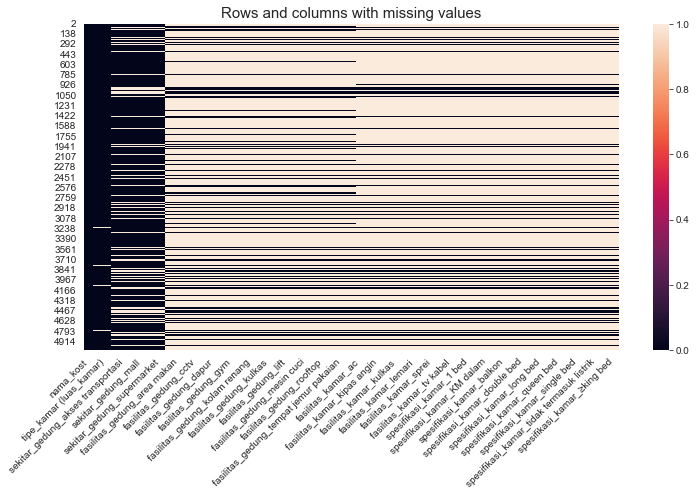

column  number of NaN (total)  \
1                                    nama_kost                      2   
74                                   luas_kost                     24   
41                     tipe_kamar (luas_kamar)                     24   
35              sekitar_gedung_akses kesehatan                    377   
37           sekitar_gedung_akses transportasi                    377   
34                       sekitar_gedung_kampus                    377   
32                         sekitar_gedung_mall                    377   
36                      sekitar_gedung_sekolah                    377   
33                  sekitar_gedung_supermarket                    377   
11                         fasilitas_gedung_ac                   1471   
12                 fasilitas_gedung_area makan                   1471   
13                fasilitas_gedung_area parkir                   1471   
14                       fasilitas_gedung_cctv                   1471   
15           fasilitas_gedung_cleaning service                   1471   
16                      fasilitas_gedung_dapur                   1471   
17                  fasilitas_gedung_dispenser                   1471   
18                        fasilitas_gedung_gym                   1471   
19     fasilitas_gedung_jendela menghadap luar                   1471   
20               fasilitas_gedung_kolam renang                   1471   
21                     fasilitas_gedung_kompor                   1471   
22                     fasilitas_gedung_kulkas                   1471   
23                    fasilitas_gedung_laundry                   1471   
24                       fasilitas_gedung_lift                   1471   
25                fasilitas_gedung_meja kompor                   1471   
26                 fasilitas_gedung_mesin cuci                   1471   
27                  fasilitas_gedung_microwave                   1471   
28                    fasilitas_gedung_rooftop                   1471   
29  fasilitas_gedung_ruang santai / ruang tamu                   1471   
30       fasilitas_gedung_tempat jemur pakaian                   1471   
31                       fasilitas_gedung_wifi                   1471   
63                          fasilitas_kamar_ac                   1518   
64                   fasilitas_kamar_dispenser                   1518   
65                 fasilitas_kamar_kipas angin                   1518   
66                      fasilitas_kamar_kompor                   1518   
67                      fasilitas_kamar_kulkas                   1518   
68                       fasilitas_kamar_kursi                   1518   
69                      fasilitas_kamar_lemari                   1518   
70                        fasilitas_kamar_meja                   1518   
71                       fasilitas_kamar_sprei                   1518   
72                          fasilitas_kamar_tv                   1518   
73                    fasilitas_kamar_tv kabel                   1518   
55                     spesifikasi_kamar_0 bed                   1518   
56                     spesifikasi_kamar_1 bed                   1518   
57                     spesifikasi_kamar_2 bed                   1518   
45                  spesifikasi_kamar_KM dalam                   1518   
46                   spesifikasi_kamar_KM luar                   1518   
51                    spesifikasi_kamar_balkon                   1518   
49                   spesifikasi_kamar_bathtub                   1518   
60                spesifikasi_kamar_double bed                   1518   
54       spesifikasi_kamar_jendela kearah luar                   1518   
59                  spesifikasi_kamar_long bed                   1518   
47               spesifikasi_kamar_pemanas air                   1518   
61                 spesifikasi_kamar_queen bed                   1518   
48                    spesifikasi_kamar_shower                   1518   
58                spesifi

In [4]:
# check missing values
missing_values = check_missing(df)
missing_values

In [5]:
# check missing values in 'luas_kost' and 'tipe_kamar (luas_kamar)'
df[df['luas_kost'].isnull()][['luas_kost', 'tipe_kamar (luas_kamar)']]

luas_kost  tipe_kamar (luas_kamar)
313         NaN                      NaN
615         NaN                      NaN
856         NaN                      NaN
1304        NaN                      NaN
1330        NaN                      NaN
1611        NaN                      NaN
1848        NaN                      NaN
1931        NaN                      NaN
2124        NaN                      NaN
2243        NaN                      NaN
2270        NaN                      NaN
2278        NaN                      NaN
2744        NaN                      NaN
2969        NaN                      NaN
3125        NaN                      NaN
3223        NaN                      NaN
3406        NaN                      NaN
3635        NaN                      NaN
3681        NaN                      NaN
3785        NaN                      NaN
4077        NaN                      NaN
4770        NaN                      NaN
4892        NaN                      NaN
4930        NaN                      NaN

In [6]:
# check missing values in 'nama_kost'
df[df['nama_kost'].isnull()]

link_kost nama_kost  \
864   https://infokost.id/listing/112671-2/       NaN   
1773  https://infokost.id/listing/107771-2/       NaN   

                                          alamat_kost_1  \
864   Jalan Tanjung Duren Raya Lama No.6 RT. 04 / RW...   
1773  Jl. Turi 4 No.11, Beji Tim., Kecamatan Beji, K...   

                                          alamat_kost_2            latitude  \
864   TANJUNG DUREN SELATAN,           GROGOL PETAMB...  -6.182866233839858   
1773  BEJI TIMUR,           BEJI,           KOTA DEP...  -6.386583852507274   

       longitude   jenis_kost  luas_kamar  \
864   106.787678  Kost Campur         0.0   
1773  106.822716  Kost Campur         0.0   

                                       fasilitas_gedung  \
864   [' Area makan', ' Area parkir', ' CCTV', ' Rua...   
1773  [' Area parkir', ' CCTV', ' Cleaning service',...   

                                         sekitar_gedung  harga_mulai  \
864   ['Mall Taman Anggrek', 'Ciputra Land', 'Centra...    2500000.0   
1773  ['Bank', 'Warung Makan', 'Coffe Shop', 'ITC De...    1300000.0   

      fasilitas_gedung_ac  fasilitas_gedung_area makan  \
864                   0.0                          1.0   
1773                  0.0                          0.0   

      fasilitas_gedung_area parkir  fasilitas_gedung_cctv  \
864                            1.0                    1.0   
1773                           1.0                    1.0   

      fasilitas_gedung_cleaning service  fasilitas_gedung_dapur  \
864                                 0.0                     0.0   
1773                                1.0                     1.0   

      fasilitas_gedung_dispenser  fasilitas_gedung_gym  \
864                          0.0                   0.0   
1773                         0.0                   0.0   

      fasilitas_gedung_jendela menghadap luar  fasilitas_gedung_kolam renang  \
864                                       0.0                            0.0   
1773                                      0.0                            0.0   

      fasilitas_gedung_kompor  fasilitas_gedung_kulkas  \
864                       0.0                      0.0   
1773                      0.0                      0.0   

      fasilitas_gedung_laundry  fasilitas_gedung_lift  \
864                        0.0                    0.0   
1773                       1.0                    0.0   

      fasilitas_gedung_meja kompor  fasilitas_gedung_mesin cuci  \
864                            0.0                          0.0   
1773                           0.0                          0.0   

      fasilitas_gedung_microwave  fasilitas_gedung_rooftop  \
864                          0.0                       0.0   
1773                         0.0                       1.0   

      fasilitas_gedung_ruang santai / ruang tamu  \
864                                          1.0   
1773                                         0.0   

      fasilitas_gedung_tempat jemur pakaian  fasilitas_gedung_wifi  \
864                                     0.0                    1.0   
1773                                    0.0                    0.0   

      sekitar_gedung_mall  sekitar_gedung_supermarket  sekitar_gedung_kampus  \
864                   1.0                         0.0                    0.0   
1773                  1.0                         0.0                    0.0   

      sekitar_gedung_akses kesehatan  sekitar_gedung_sekolah  \
864                              0.0                     0.0   
1773                             0.0                     0.0   

      sekitar_gedung_akses transportasi           kota tipe_kamar  \
864                                 0.0  Jakarta Barat        yes   
1773                                1.0          Depok        yes   

     tipe_kamar (nama_kamar)  tipe_kamar (luas_kamar)  \
864                   Tipe A                     12.0   
1773              Double Bed                      6.5   

      tipe_kamar (ha

In [7]:
# drop missing values in 'fasilitas_kamar_XXX' and `spesifikasi_kamar_XXX`
df = df[df.tipe_kamar == 'yes'].reset_index(drop = True)

# drop missing values in 'luas_kost' and 'tipe_kamar (luas_kamar)'
df = df[~df.luas_kost.isnull()]

# drop missing values in 'fasilitas_gedung_XXX'
df = df[~df.fasilitas_gedung_ac.isnull()]

# drop missing values in 'sekitar_gedung_XXX'
df = df[~df.sekitar_gedung_kampus.isnull()]

df.shape

(3087, 76)

## Check data types

- `latitude` should be be converted into numerical types.


In [8]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3087 entries, 0 to 3505
Data columns (total 76 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   link_kost                                   3087 non-null   object 
 1   nama_kost                                   3085 non-null   object 
 2   alamat_kost_1                               3087 non-null   object 
 3   alamat_kost_2                               3087 non-null   object 
 4   latitude                                    3087 non-null   object 
 5   longitude                                   3087 non-null   float64
 6   jenis_kost                                  3087 non-null   object 
 7   luas_kamar                                  3087 non-null   float64
 8   fasilitas_gedung                            3087 non-null   object 
 9   sekitar_gedung                              3087 non-null   object 
 10  harga_mulai 

In [9]:
# convert 'latitude' from object into numerical type
df['latitude'] = df['latitude'].apply(lambda x: x.replace('`','').replace(',','')).astype('float')

## Check duplicated records

The duplicated records have different values on `tipe_kamar (nama_kamar)` but actually the other feature values are sharing the same values (e.g. `luas_kost` and `harga_kost_per_bulan`). In total, There are 51 duplicate records. We will store only the first record from each of duplicated records.

In [10]:
# check duplicate records
subset_columns = ['link_kost', 'tipe_kamar (spesifikasi_kamar)', 
                  'tipe_kamar (fasilitas_kamar)', 'luas_kost', 'harga_kost_per_bulan']

duplicated_records = df[df.duplicated(subset = subset_columns, keep = False)].loc[:, ['tipe_kamar (nama_kamar)'] + subset_columns]
print('Total of duplicated records:', duplicated_records.shape[0])
display(duplicated_records)

Total of duplicated records: 51


tipe_kamar (nama_kamar)  \
259                               Kamar Tipe Semi Delux   
260                               Kamar Tipe Semi Delux   
418                                    Compact Single A   
419                                    Compact Single B   
420                                    Compact Single C   
552                                              Single   
553                                              Single   
554                                             Single    
570                                       Standard Room   
572                                       Standard Room   
573                                       Standard Room   
616                                              Tipe A   
619                                              Tipe B   
754                                              Type A   
755                                              Type B   
775    Apartement PIK 2 Tokyo Riverside Tower Akihabara   
776    Apartement PIK 2 Tokyo Riverside Tower Akihabara   
1017                                             Type C   
1019           Studio Type C / Type Studio paling besar   
1142                                   Superior Queen A   
1143                                   Superior Queen D   
1515                                         Standard D   
1516                                         Standard E   
1646                                   Superior Queen B   
1647                                   Superior Queen C   
2318                                    Compact Queen B   
2319                                    Compact Queen C   
2324                                             Single   
2325                                             Single   
2326                                             Single   
2327                                             Single   
2472                                  Superior Single B   
2473                                  Superior Single C   
2853                                              Gyana   
2854                                              Gyana   
2858                              Type A - Dengan Sekat   
2859                               Type B - Tanpa Sekat   
2868                                           Lantai 3   
2869                                           Lantai 3   
2937                                    Standard/Single   
2939                                    Standard/Single   
3070                                    Regular Queen A   
3071                                    Regular Queen B   
3204                                  Superior Single C   
3207                                  Superior Single F   
3259                             Firly Kamar Mandi Luar   
3260                             Firly Kamar Mandi Luar   
3323                                           Standard   
3324                                          Mezzanine   
3457                       Kost Sabang 40 Campur Tipe C   
3462                        Kost Sabang 40 Putri Tipe F   

                                              link_kost  \
259               https://infokost.id/listing/kost-kmc/   
260               https://infokost.id/listing/kost-kmc/   
418    https://infokost.id/listing/rukita-permai-pluit/   
419    https://infokost.id/listing/rukita-permai-pluit/   
420    https://infokost.id/listing/rukita-permai-pluit/   
552         https://infokost.id/listing/kost-ibu-nonih/   
553         https://infokost.id/listing/kost-ibu-nonih/   
554         https://infokost.id/listing/kost-ibu-nonih/   
570   https://infokost.id/listing/wisma-indah-setiab...   
572   https://infokost.id/listing/wisma-indah-setiab...   
573   https://infokost.id/listing/wisma-indah-setiab...   
616       https://infokost.id/listing/kost-bunda-niken/   
619       https://infokost.id/listing/kost-bunda-niken/   
754   https://infokost.id/listing/kost-nayan-residen...   
755   https://infokost.id/listing/kost-nayan-residen...   
775   https://infok

In [11]:
# store only the first record from each of duplicate records
df = df.drop_duplicates(subset = subset_columns, keep = 'first').reset_index(drop = True)
df.shape

(3059, 76)

## Refine the features

- Some of the binary features such as `spesifikasi_kamar_0 bed`, `spesifikasi_kamar_1 bed`, and `spesifikasi_kamar_2 bed` are represented as a single one-hot-encoded feature. For modeling purpose this one-hot-encoded representation must be fulfilled but for EDA purpose we need to decoded it into a single categorical feature which has 3 unique values, i.e. `0 bed`, `1 bed`, and `2 bed`. Also there are other binary features which behave like the previous example too.
- Some of the features such as `fasilitas_kamar_kompor` and `fasilitas_gedung_kompor` are actually sharing the same thing. So we will combine these two features into a single one. Also there are other features which share the same thing too.

In [12]:
def jumlah_kasur(x):
    if x['spesifikasi_kamar_0 bed'] == 1.0:
        return '0 bed'
    elif x['spesifikasi_kamar_1 bed'] == 1.0:
        return '1 bed'
    elif x['spesifikasi_kamar_2 bed'] == 1.0:
        return '2 bed'
    
df['fasilitas_kamar_jumlah kasur'] = df.apply(lambda x: jumlah_kasur(x), axis = 1)

dropped = ['spesifikasi_kamar_0 bed', 
           'spesifikasi_kamar_1 bed', 
           'spesifikasi_kamar_2 bed']
df.drop(dropped, axis = 1, inplace = True)

In [13]:
def tipe_kasur(x):
    if x['spesifikasi_kamar_single bed'] == 1.0:
        return 'single bed'
    elif x['spesifikasi_kamar_long bed'] == 1.0:
        return 'long bed'
    elif x['spesifikasi_kamar_double bed'] == 1.0:
        return 'double bed'
    elif x['spesifikasi_kamar_queen bed'] == 1.0:
        return 'queen bed'
    elif x['spesifikasi_kamar_≥king bed'] == 1.0:
        return '≥king bed'
    
df['fasilitas_kamar_tipe kasur'] = df.apply(lambda x: tipe_kasur(x), axis = 1)

dropped = ['spesifikasi_kamar_single bed', 'spesifikasi_kamar_long bed',
           'spesifikasi_kamar_double bed', 'spesifikasi_kamar_queen bed',
           'spesifikasi_kamar_≥king bed']
df.drop(dropped, axis = 1, inplace = True)

In [14]:
def tipe_kamar_mandi(x):
    if x['spesifikasi_kamar_KM dalam'] == 1.0:
        return 'dalam'
    elif x['spesifikasi_kamar_KM luar'] == 1.0:
        return 'luar'
    
df['fasilitas_kamar_tipe kamar mandi'] = df.apply(lambda x: tipe_kamar_mandi(x), axis = 1)

dropped = ['spesifikasi_kamar_KM dalam',
           'spesifikasi_kamar_KM luar']
df.drop(dropped, axis = 1, inplace = True)

In [15]:
def listrik(x):
    if x['spesifikasi_kamar_termasuk listrik'] == 1.0:
        return 'termasuk'
    elif x['spesifikasi_kamar_tidak termasuk listrik'] == 1.0:
        return 'tidak termasuk'
    
df['fasilitas_kamar_listrik'] = df.apply(lambda x: listrik(x), axis = 1)

dropped = ['spesifikasi_kamar_termasuk listrik',
           'spesifikasi_kamar_tidak termasuk listrik']
df.drop(dropped, axis = 1, inplace = True)

In [16]:
df['kompor'] = (df[['fasilitas_kamar_kompor', 'fasilitas_gedung_kompor']].sum(axis = 1) >= 1.0).replace({False:0.0, True:1.0})

dropped = ['fasilitas_kamar_kompor',
           'fasilitas_gedung_kompor']
df.drop(dropped, axis = 1, inplace = True)

In [17]:
df['fasilitas_kamar_ac'] = (df[['fasilitas_kamar_ac', 'fasilitas_gedung_ac']].sum(axis = 1) >= 1.0).replace({False:0.0, True:1.0})

dropped = ['fasilitas_gedung_ac']
df.drop(dropped, axis = 1, inplace = True)

In [18]:
df['kulkas'] = (df[['fasilitas_kamar_kulkas', 'fasilitas_gedung_kulkas']].sum(axis = 1) >= 1.0).replace({False:0.0, True:1.0})

dropped = ['fasilitas_kamar_kulkas', 
           'fasilitas_gedung_kulkas']
df.drop(dropped, axis = 1, inplace = True)

In [19]:
df['dispenser'] = (df[['fasilitas_kamar_dispenser', 'fasilitas_gedung_dispenser']].sum(axis = 1) >= 1.0).replace({False:0.0, True:1.0})

dropped = ['fasilitas_kamar_dispenser', 
           'fasilitas_gedung_dispenser']
df.drop(dropped, axis = 1, inplace = True)

In [20]:
df['fasilitas_kamar_jendela kearah luar'] = (df[['spesifikasi_kamar_jendela kearah luar', 'fasilitas_gedung_jendela menghadap luar']].sum(axis = 1) >= 1.0).replace({False:0.0, True:1.0})

dropped = ['spesifikasi_kamar_jendela kearah luar', 
           'fasilitas_gedung_jendela menghadap luar']
df.drop(dropped, axis = 1, inplace = True)

In [21]:
# rename the columns
import re
mapper = {}
mapper_1 = {col:col.split('fasilitas_gedung_')[1] for col in [col for col in df.columns if re.findall('fasilitas_gedung_', col)]}
mapper_2 = {col:'fasilitas_kamar_' + col.split('spesifikasi_kamar_')[1] for col in [col for col in df.columns if re.findall('spesifikasi_kamar_', col)]}
mapper.update(mapper_1)
mapper.update(mapper_2)
df.rename(columns = mapper, inplace = True)

## Select useful features

There are some features that will be ignored since they don't contain any useful information anymore (just a complex strings with high-level of granularity) or do contain redundant information, and here are the features:
- `link_kost`
- `nama_kost`
- `alamat_kost_1`
- `alamat_kost_2`
- `luas_kamar` (Redundant information, the actual information are stored in `luas_kost`)
- `fasilitas_gedung`
- `sekitar_gedung`
- `harga_mulai` (Redundant information, the actual information are stored in `harga_kost_per_bulan`)
- `tipe_kamar`
- `tipe_kamar (nama_kamar)`
- `tipe_kamar (luas_kamar)` (Redundant information, the actual information are stored in `luas_kost`)
- `tipe_kamar (harga_kamar)` (Redundant information, the actual information are stored in `harga_kost_per_bulan`)
- `tipe_kamar (spesifikasi_kamar)`
- `tipe_kamar (fasilitas_kamar)`

Therefore we will create some lists which contain features to be analyzed.

In [22]:
# get list of useless features to be not analyzed
useless_cols = ['link_kost', 'nama_kost', 'alamat_kost_1', 'alamat_kost_2', 'luas_kamar', 'fasilitas_gedung', 'sekitar_gedung', 'harga_mulai', 'tipe_kamar',
                'tipe_kamar (nama_kamar)', 'tipe_kamar (luas_kamar)', 'tipe_kamar (harga_kamar)', 'tipe_kamar (spesifikasi_kamar)', 'tipe_kamar (fasilitas_kamar)']

# get list of numerical features to be analyzed
num_cols = ['luas_kost', 'harga_kost_per_bulan', 'latitude', 'longitude']

# get list of categorical features to be analyzed
cat_cols = [col for col in df.columns if col not in num_cols + useless_cols]

print(len(set(useless_cols + num_cols + cat_cols)))
print(df.shape)

63
(3059, 63)


# Exploratory Data Analysis

In this section we will analyze and examine each feature one by one. We will check their distributions and find outliers or abnormal records. Then we investigate which features are the most important predictor variables to predict the dependent variable that is boarding house monthly prices (`harga_kost_per_bulan`).

## harga_kost_per_bulan

- The first lowest value is Rp. 250,000, the second lowest value is Rp.300,000, then followed by Rp.450,000.
    - After crosschecking the value of Rp. 250,000 on its website page, it turns out that the actual value should be at Rp. 2,500,000.
    - The other values seem reasonable but we are going to set the lower limit of prices to Rp. 500,000. So we will drop unit prices lower than Rp. 500,000.
- The first highest value is Rp. 24,500,000, the second highest value is Rp.19,000,000, the third highest value is Rp.17,000,000, and followed by three samples with prices in range of Rp. 10,000,000 to Rp. 11,000,000.
    - After crosschecking these values on their website pages one by one, it turns out that the units with price exceeding Rp. 10,000,000 belong to apartment unit instead of boarding house unit.
    - The number of samples of boarding house units having prices above Rp.7,000,000 are also relatively small so we will drop them. 
    - In sum, we will drop all units having prices above Rp.7,000,000.
- The distribution is skewed to the right.

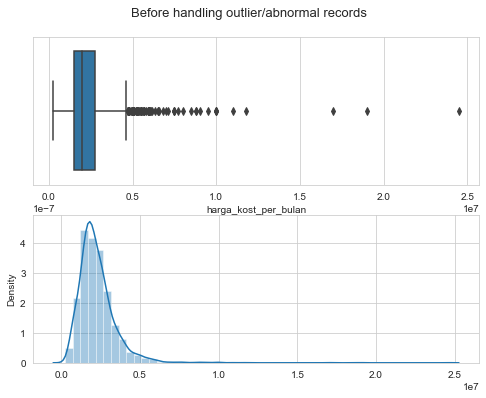

count          mean           std       min        25%  \
harga_kost_per_bulan  3059.0  2.278617e+06  1.254445e+06  250000.0  1500000.0   

                            50%        75%         max  
harga_kost_per_bulan  2000000.0  2750000.0  24500000.0

bottom 10 values:
118     250000.0
2001    250000.0
2402    300000.0
60      450000.0
2855    450000.0
1640    500000.0
1598    500000.0
2303    500000.0
1822    500000.0
1009    500000.0
Name: harga_kost_per_bulan, dtype: float64 

top 10 values:
412      9000000.0
204      9500000.0
359     10000000.0
2979    10000000.0
2910    10000000.0
1132    11000000.0
205     11800000.0
1458    17000000.0
2380    19000000.0
1827    24500000.0
Name: harga_kost_per_bulan, dtype: float64


In [23]:
fig, ax = plt.subplots(figsize = (8, 6), nrows = 2, ncols = 1)
sns.boxplot(x = df['harga_kost_per_bulan'], ax = ax[0])
sns.distplot(x = df['harga_kost_per_bulan'], ax = ax[1])
plt.suptitle('Before handling outlier/abnormal records', y = 0.95, size = 13)
plt.show()

display(df[['harga_kost_per_bulan']].describe().T)

print('bottom 10 values:')
print(df.harga_kost_per_bulan.sort_values().head(10), '\n')
print('top 10 values:')
print(df.harga_kost_per_bulan.sort_values().tail(10))

In [24]:
#### handle outlier/abnormal values in 'harga_kost_per_bulan' ####

# drop > 6600000 IDR
idx_harga_kost_per_bulan_upper = df[df['harga_kost_per_bulan'] > 6600000.0].index
df = df.drop(idx_harga_kost_per_bulan_upper, axis = 0)

# change 250000.0 IDR value with the correct one
idx_harga_kost_per_bulan = df[df['harga_kost_per_bulan'] == 250000.0].index
df.loc[idx_harga_kost_per_bulan, 'harga_kost_per_bulan'] = 2500000.0

# drop < 500000.0 IDR
idx_harga_kost_per_bulan_lower = df[df['harga_kost_per_bulan'] < 500000.0].index
df = df.drop(idx_harga_kost_per_bulan_lower, axis = 0)

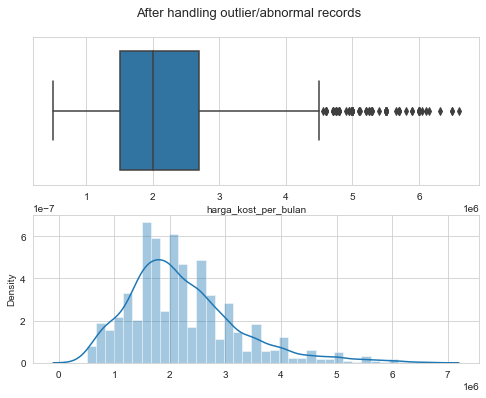

count          mean           std       min        25%  \
harga_kost_per_bulan  3035.0  2.226221e+06  997414.69623  500000.0  1500000.0   

                            50%        75%        max  
harga_kost_per_bulan  2000000.0  2700000.0  6600000.0

bottom 10 values:
1640    500000.0
2596    500000.0
2535    500000.0
1009    500000.0
2226    500000.0
2303    500000.0
1598    500000.0
524     500000.0
1822    500000.0
2038    550000.0
Name: harga_kost_per_bulan, dtype: float64 

top 10 values:
2912    6000000.0
306     6000000.0
2223    6000000.0
1202    6050000.0
848     6110000.0
1765    6150000.0
849     6310000.0
1803    6500000.0
2449    6500000.0
2145    6600000.0
Name: harga_kost_per_bulan, dtype: float64


In [25]:
fig, ax = plt.subplots(figsize = (8, 6), nrows = 2, ncols = 1)
sns.boxplot(x = df['harga_kost_per_bulan'], ax = ax[0])
sns.distplot(x = df['harga_kost_per_bulan'], ax = ax[1])
plt.suptitle('After handling outlier/abnormal records', y = 0.95, size = 13)
plt.show()

display(df[['harga_kost_per_bulan']].describe().T)

print('bottom 10 values:')
print(df.harga_kost_per_bulan.sort_values().head(10), '\n')
print('top 10 values:')
print(df.harga_kost_per_bulan.sort_values().tail(10))

## luas_kost

- The first lowest value is 1.0 $m^2$, the second lowest value is 2.0 $m^2$, and followed by a major number of values exceeding 4.0 $m^2$.
    - After crosschecking the value of 1.0 $m^2$ and 2.0 $m^2$ on their website page, perhaps these values are caused by human error when the owner of the boarding house wrongly input the room areas to their unit boarding house website pages. So we will just drop them by setting 4.0 $m^2$ as the lower limit of room areas.
- The highest value is 155.0 $m^2$ and then followed by three sample units with areas of 56.0 $m^2$. 
    - After crosschecking the value of 155.0 $m^2$ on its website page, the reasonable value should be at 15.5 $m^2$ instead of 155.0 $m^2$. We will change 155.0 $m^2$ to 15.5 $m^2$.
    - Only a few units of boarding houses have room areas exceeding 40 $m^2$ which can be considered as outliers. We will set the upper limit to 40 $m^2$.
- The distribution is skewed to the right.

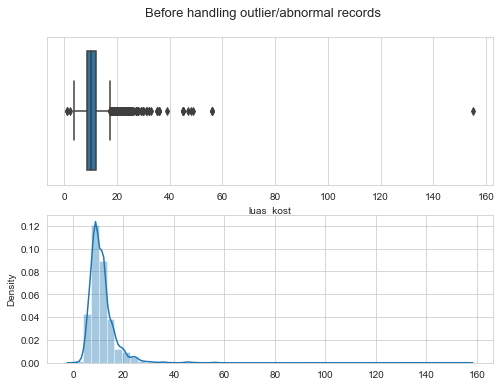

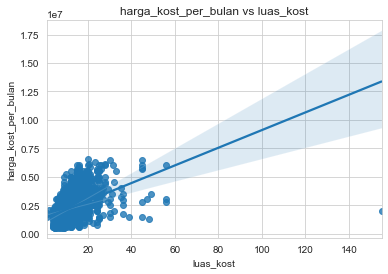

count       mean      std  min   25%   50%    75%    max
luas_kost  3035.0  11.382418  5.59899  1.0  8.64  10.0  12.07  155.0

bottom 10 values:
2983    1.00
789     1.00
23      2.00
2233    3.75
917     4.00
2877    4.00
2967    4.00
840     4.00
829     4.00
1254    4.00
Name: luas_kost, dtype: float64 

top 10 values:
902      45.0
2449     45.0
888      45.0
2924     47.0
2741     48.0
2829     49.0
310      56.0
311      56.0
2811     56.0
728     155.0
Name: luas_kost, dtype: float64


In [26]:
fig, ax = plt.subplots(figsize = (8, 6), nrows = 2, ncols = 1)
sns.boxplot(x = df['luas_kost'], ax = ax[0])
sns.distplot(x = df['luas_kost'], ax = ax[1])
plt.suptitle('Before handling outlier/abnormal records', y = 0.95, size = 13)
plt.show()

sns.regplot(data = df, y = 'harga_kost_per_bulan', x = 'luas_kost')
plt.title('harga_kost_per_bulan vs luas_kost')
plt.show()

display(df[['luas_kost']].describe().T)

print('bottom 10 values:')
print(df.luas_kost.sort_values().head(10), '\n')
print('top 10 values:')
print(df.luas_kost.sort_values().tail(10))

In [27]:
#### handle outlier/abnormal values in 'luas_kost' ####

# change 155.0 value with the correct one
idx_luas_kost_155 = df[df['luas_kost'] == 155.0].index
df.loc[idx_luas_kost_155, 'luas_kost'] = 15.5

# drop > 30.0 value
idx_luas_kost_30 = df[df['luas_kost'] > 30.0].index
df = df.drop(idx_luas_kost_30, axis = 0)

# drop < 4.0 value
idx_luas_kost_4 = df[df['luas_kost'] < 4.0].index
df = df.drop(idx_luas_kost_4, axis = 0)

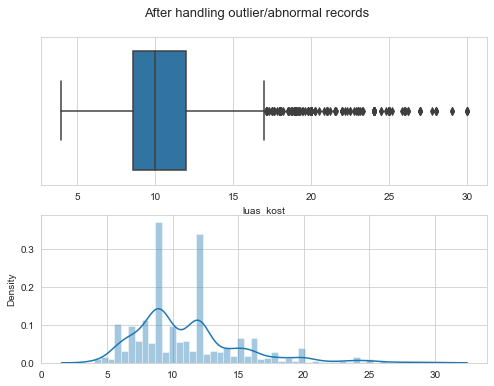

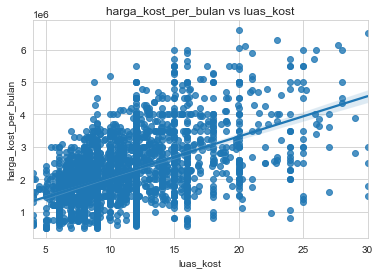

count      mean       std  min   25%   50%   75%   max
luas_kost  3007.0  11.10871  4.108017  4.0  8.62  10.0  12.0  30.0

bottom 10 values:
456     4.0
2967    4.0
1098    4.0
2137    4.0
1254    4.0
917     4.0
2877    4.0
829     4.0
840     4.0
2610    4.0
Name: luas_kost, dtype: float64 

top 10 values:
417     28.0
563     28.0
2539    28.0
1613    29.0
901     29.0
1811    30.0
2583    30.0
1919    30.0
2020    30.0
1803    30.0
Name: luas_kost, dtype: float64


In [28]:
fig, ax = plt.subplots(figsize = (8, 6), nrows = 2, ncols = 1)
sns.boxplot(x = df['luas_kost'], ax = ax[0])
sns.distplot(x = df['luas_kost'], ax = ax[1])
plt.suptitle('After handling outlier/abnormal records', y = 0.95, size = 13)
plt.show()

sns.regplot(data = df, y = 'harga_kost_per_bulan', x = 'luas_kost')
plt.title('harga_kost_per_bulan vs luas_kost')
plt.show()

display(df[['luas_kost']].describe().T)

print('bottom 10 values:')
print(df.luas_kost.sort_values().head(10), '\n')
print('top 10 values:')
print(df.luas_kost.sort_values().tail(10))

## longitude, latitude, and kota

Insights:
- It turns out that most of our scraped boarding house data are located in DKI Jakarta and Tangerang then followed by moderate amount from Depok and Bandung. 
- Only a few units are located in Bekasi, Yogayakarta, Bali, and Depok therefore We would consider to drop these cities because perhaps these lack amount of samples could negatively affect the regression model performance.

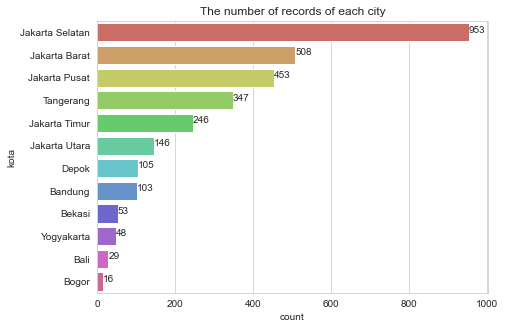

In [29]:
fig, ax = plt.subplots(figsize = (7, 5))
sns.countplot(data = df, y = 'kota', order = df.kota.value_counts().index, palette = 'hls')
for i, val in enumerate(df.kota.value_counts()):
    plt.text(s = val, x = val, y = i)
plt.title('The number of records of each city')
plt.show()

In [30]:
# drop Bekasi, Yogyakarta, Bali, and Bogor
mask = df.kota.isin(['Bekasi', 'Yogyakarta', 'Bali', 'Bogor'])
df = df[~mask]
df = df.reset_index(drop = True)
df.shape

(2861, 63)

Insights:
- There is one outlier latitude and longitude in Bandung city. Let's fix this.

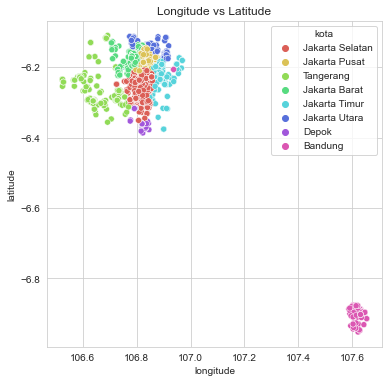

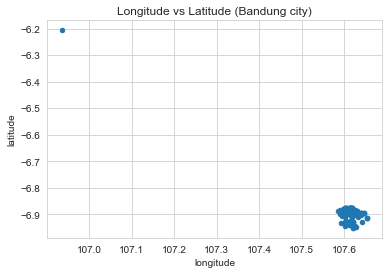

In [31]:
fig, ax = plt.subplots(figsize = (6, 6))
sns.scatterplot(data = df, x = 'longitude', y = 'latitude', hue = 'kota', palette = 'hls')
plt.title('Longitude vs Latitude')
plt.show()

df[df.kota == 'Bandung'].plot(x = 'longitude', y = 'latitude', kind = 'scatter')
plt.title('Longitude vs Latitude (Bandung city)')
plt.show()

In [32]:
# fix one outlier of longitude and latitude in Bandung city
mask = df[df.kota == 'Bandung'].longitude < 107.0
index = df[df.kota == 'Bandung'][mask].index
df.loc[index, 'longitude'] = df[df.kota == 'Bandung'].longitude.mean()
df.loc[index, 'latitude'] = df[df.kota == 'Bandung'].latitude.mean()

Insights:
- From the plots below we clearly see that "Jakarta Selatan" has the highest average of boarding house prices and "Bandung" has the lowest one. It's a common knowledge that the most expensive property price is Jakarta.
- There are two outliers of boarding house prices in Bandung city which have relatively high decrepancy with the upper whisker of its boxplot. We should drop these outliers. Also there is one outlier in Tangerang city that we would like to drop.

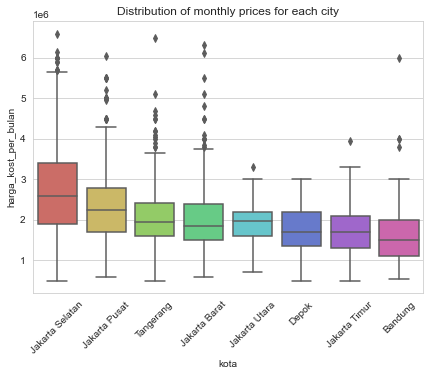

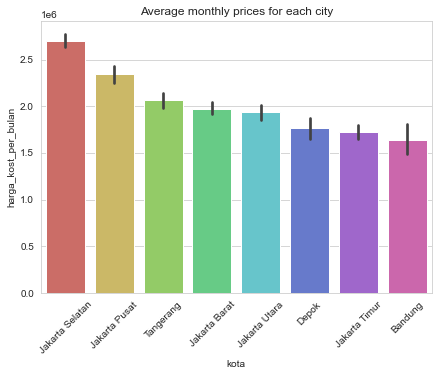

In [33]:
order = df.groupby('kota').agg({'harga_kost_per_bulan':'mean'}).sort_values(by = 'harga_kost_per_bulan', ascending = False).index

fig, ax = plt.subplots(figsize = (7, 5))
sns.boxplot(data = df, x = 'kota', y = 'harga_kost_per_bulan', palette = 'hls', order = order)
plt.xticks(rotation = 45)
plt.title('Distribution of monthly prices for each city')
plt.show()

fig, ax = plt.subplots(figsize = (7, 5))
sns.barplot(data = df, x = 'kota', y = 'harga_kost_per_bulan', palette = 'hls', order = order)
plt.xticks(rotation = 45)
plt.title('Average monthly prices for each city')
plt.show()

In [34]:
# drop outlier in Bandung city
kost_bandung = df[df.kota == 'Bandung']
index = kost_bandung[kost_bandung.harga_kost_per_bulan > 5000000].index
df = df.drop(index, axis = 0)

# drop outlier in Tangerang city
kost_tangerang = df[df.kota == 'Tangerang']
index = kost_tangerang[kost_tangerang.harga_kost_per_bulan > 6000000].index
df = df.drop(index, axis = 0)

df = df.reset_index(drop = True)
df.shape

(2859, 63)

## fasilitas_kamar_tipe kasur

Insights:
- Only relatively small samples of '≥king bed' is found on the scrapped website. We can combine this type of bed with 'queen bed' into a new category name called '≥queen bed'.

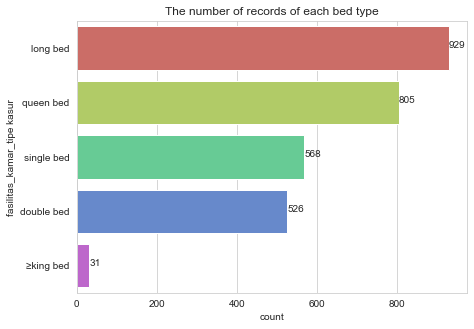

In [35]:
fig, ax = plt.subplots(figsize = (7, 5))
sns.countplot(data = df, y = 'fasilitas_kamar_tipe kasur', order = df['fasilitas_kamar_tipe kasur'].value_counts().index, palette = 'hls')
for i, val in enumerate(df['fasilitas_kamar_tipe kasur'].value_counts()):
    plt.text(s = val, x = val, y = i)
plt.title('The number of records of each bed type')
plt.show()

In [36]:
# combine 'queen bed' and '≥king bed' into '≥queen bed' 
df['fasilitas_kamar_tipe kasur'] = df['fasilitas_kamar_tipe kasur'].apply(lambda x: '≥queen bed' if x in ['≥king bed', 'queen bed'] else x)

Insights:
- The trend is very clear that the bigger the bed size, the higher the boarding house prices.

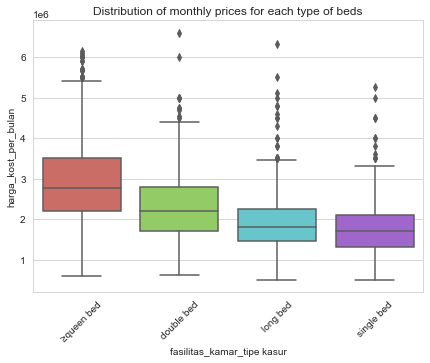

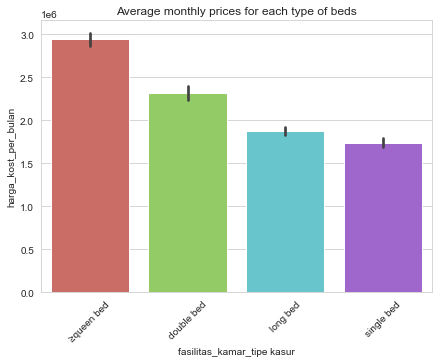

In [37]:
order = df.groupby('fasilitas_kamar_tipe kasur').agg({'harga_kost_per_bulan':'mean'}).sort_values(by = 'harga_kost_per_bulan', ascending = False).index

fig, ax = plt.subplots(figsize = (7, 5))
sns.boxplot(data = df, x = 'fasilitas_kamar_tipe kasur', y = 'harga_kost_per_bulan', palette = 'hls', order = order)
plt.xticks(rotation = 45)
plt.title('Distribution of monthly prices for each type of beds')
plt.show()

fig, ax = plt.subplots(figsize = (7, 5))
sns.barplot(data = df, x = 'fasilitas_kamar_tipe kasur', y = 'harga_kost_per_bulan', palette = 'hls', order = order)
plt.xticks(rotation = 45)
plt.title('Average monthly prices for each type of beds')
plt.show()

## jenis_kost

Insights:
- It seems that most of our boarding house data belong to "Kost Campur".
- This feature might not be good enough to determine the boarding house prices because the majority of category value is "Kost Campur". We don't have enough samples for the other category values so we would like to consider to drop this feature later on modeling section or perhaps we could combine "Kost Putri" and "Kost Putra" into a single category value called "Kost Tidak Campur". Therefore we only have two category value of this feature that are "Kost Campur" and "Kost Tidak Campur" which encodes as "1" and "0".

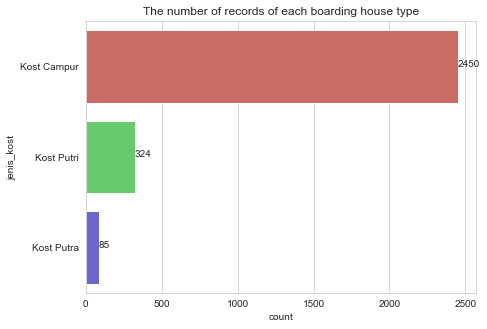

In [38]:
fig, ax = plt.subplots(figsize = (7, 5))
sns.countplot(data = df, y = 'jenis_kost', order = df['jenis_kost'].value_counts().index, palette = 'hls')
for i, val in enumerate(df['jenis_kost'].value_counts()):
    plt.text(s = val, x = val, y = i)
plt.title('The number of records of each boarding house type')
plt.show()

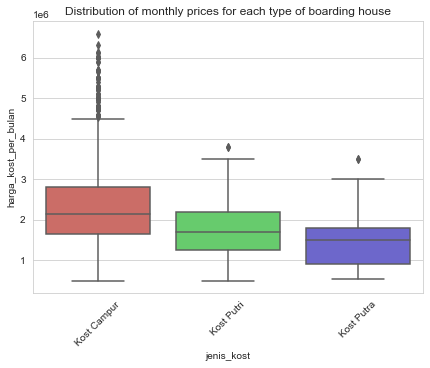

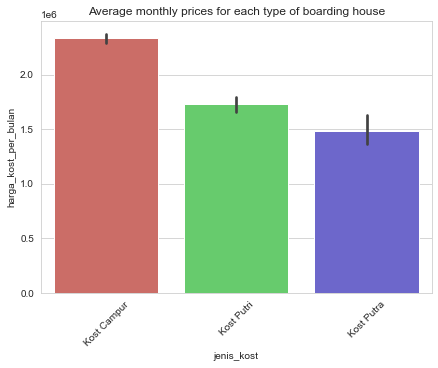

In [39]:
order = df.groupby('jenis_kost').agg({'harga_kost_per_bulan':'mean'}).sort_values(by = 'harga_kost_per_bulan', ascending = False).index

fig, ax = plt.subplots(figsize = (7, 5))
sns.boxplot(data = df, x = 'jenis_kost', y = 'harga_kost_per_bulan', palette = 'hls', order = order)
plt.xticks(rotation = 45)
plt.title('Distribution of monthly prices for each type of boarding house')
plt.show()

fig, ax = plt.subplots(figsize = (7, 5))
sns.barplot(data = df, x = 'jenis_kost', y = 'harga_kost_per_bulan', palette = 'hls', order = order)
plt.xticks(rotation = 45)
plt.title('Average monthly prices for each type of boarding house')
plt.show()

In [40]:
# create 'jenis_kost_campur' feature
df['jenis_kost_campur'] = df['jenis_kost'].apply(lambda x: 1 if x == 'Kost Campur' else 0)
cat_cols.append('jenis_kost_campur')

df['jenis_kost_campur'].value_counts()

1    2450
0     409
Name: jenis_kost_campur, dtype: int64

## fasilitas_kamar_jumlah kasur

Insights:
- Most of boarding houses have only "1 bed".
- It seems that we only have extremely few records of both "0 bed" and "2 bed".
- We should consider to drop this feature.

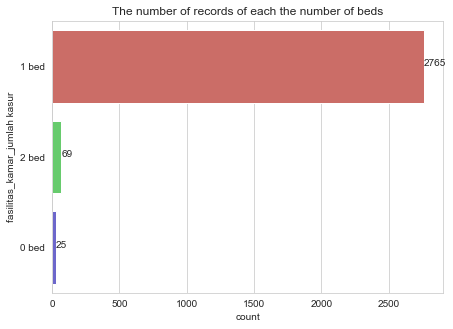

In [41]:
fig, ax = plt.subplots(figsize = (7, 5))
sns.countplot(data = df, y = 'fasilitas_kamar_jumlah kasur', order = df['fasilitas_kamar_jumlah kasur'].value_counts().index, palette = 'hls')
for i, val in enumerate(df['fasilitas_kamar_jumlah kasur'].value_counts()):
    plt.text(s = val, x = val, y = i)
plt.title('The number of records of each the number of beds')
plt.show()

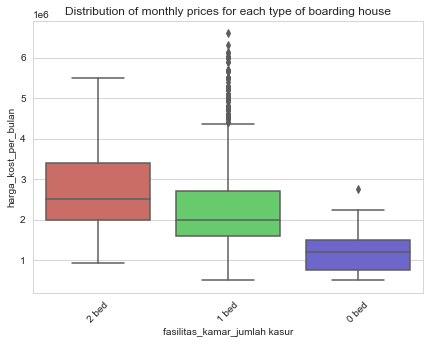

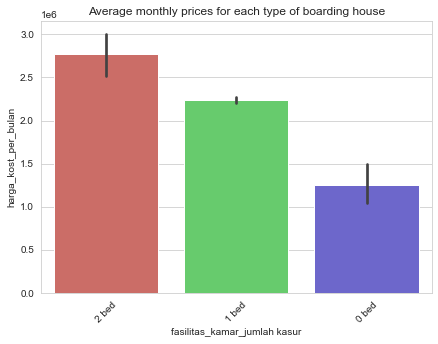

In [42]:
order = df.groupby('fasilitas_kamar_jumlah kasur').agg({'harga_kost_per_bulan':'mean'}).sort_values(by = 'harga_kost_per_bulan', ascending = False).index

fig, ax = plt.subplots(figsize = (7, 5))
sns.boxplot(data = df, x = 'fasilitas_kamar_jumlah kasur', y = 'harga_kost_per_bulan', palette = 'hls', order = order)
plt.xticks(rotation = 45)
plt.title('Distribution of monthly prices for each type of boarding house')
plt.show()

fig, ax = plt.subplots(figsize = (7, 5))
sns.barplot(data = df, x = 'fasilitas_kamar_jumlah kasur', y = 'harga_kost_per_bulan', palette = 'hls', order = order)
plt.xticks(rotation = 45)
plt.title('Average monthly prices for each type of boarding house')
plt.show()

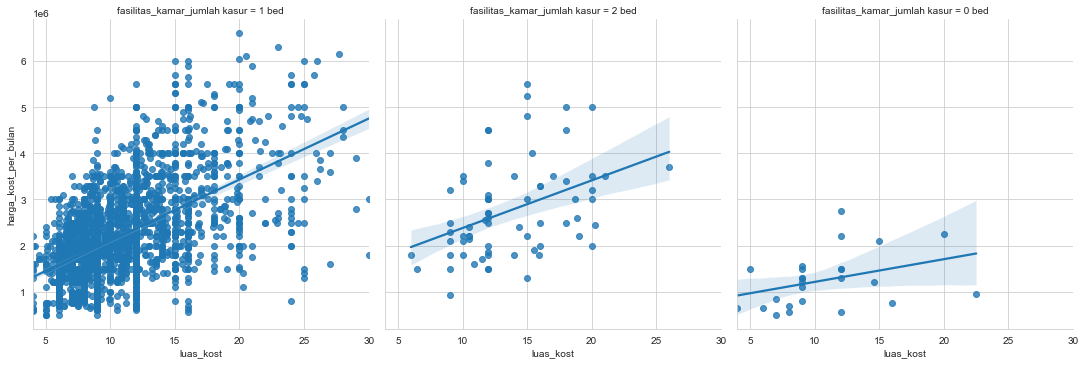

In [43]:
sns.lmplot(data = df, x = 'luas_kost', y = 'harga_kost_per_bulan', col = 'fasilitas_kamar_jumlah kasur')
plt.show()

## Binary features

We will draw some plots of binary features in this section. These binary features will represent the presence of a particular facility that a boarding house has. The feature will have value of "1" if a facility exists in a boarding house, otherwise the feature will have the value of "0". 

We would like to see if the presence of these facilities have an effect on the monthly rent price of boarding houses. We will remove facilities that don't affect the monthly prices.

In [44]:
# convert 'fasilitas_kamar_listrik' into binary features
df['fasilitas_kamar_termasuk listrik'] = df['fasilitas_kamar_listrik'].apply(lambda x: 0 if x == 'tidak termasuk' else 1)
df.drop(['fasilitas_kamar_listrik'], axis = 1, inplace = True)
cat_cols.remove('fasilitas_kamar_listrik')
cat_cols.append('fasilitas_kamar_termasuk listrik')

In [45]:
# convert 'fasilitas_kamar_tipe kamar mandi' into binary features
df['fasilitas_kamar_kamar mandi dalam'] = df['fasilitas_kamar_tipe kamar mandi'].apply(lambda x: 0 if x == 'luar' else 1)
df.drop(['fasilitas_kamar_tipe kamar mandi'], axis = 1, inplace = True)
cat_cols.remove('fasilitas_kamar_tipe kamar mandi')
cat_cols.append('fasilitas_kamar_kamar mandi dalam')

In [46]:
# create 'jakarta_check' features
df['jakarta_check'] = df['kota'].apply(lambda x: 1 if re.findall('Jakarta', x) else 0)
cat_cols.append('jakarta_check')

In [47]:
# get the binary features, ordinal features, and nominal features
nom_cols = ['kota'] 
ord_cols = ['fasilitas_kamar_jumlah kasur', 'fasilitas_kamar_tipe kasur']
bin_cols = [col for col in cat_cols if col not in nom_cols + ord_cols + ['jenis_kost']] # drop 'jenis_kost'

# convert into integer
for col in df[bin_cols].columns:
    df[col] = df[col].astype(int)

### Binary data distribution for each binary value

Insights:
- From the plot below, we see that some of features have a very dominant single binary value such as 'gym', 'kolam renang', 'lift', 'fasilitas_kamar_balkon' etc. Basically these could happen because most of boarding house units in Indonesia don't have such facility. Those facilities are usually found in apartement units rather than boarding house.
- Based on my experience, most of people who are looking for boarding house to be rented will not intend to have boarding house having facilities such as "gym", "kolam renang", "lift", "fasilitas_kamar_bathtub", and "fasilitas_kamar_balkon". So we would like to flag these features so later in modelling section we will try to train and to compare which models have the best model performance if we train the model using or not using these flagged features.

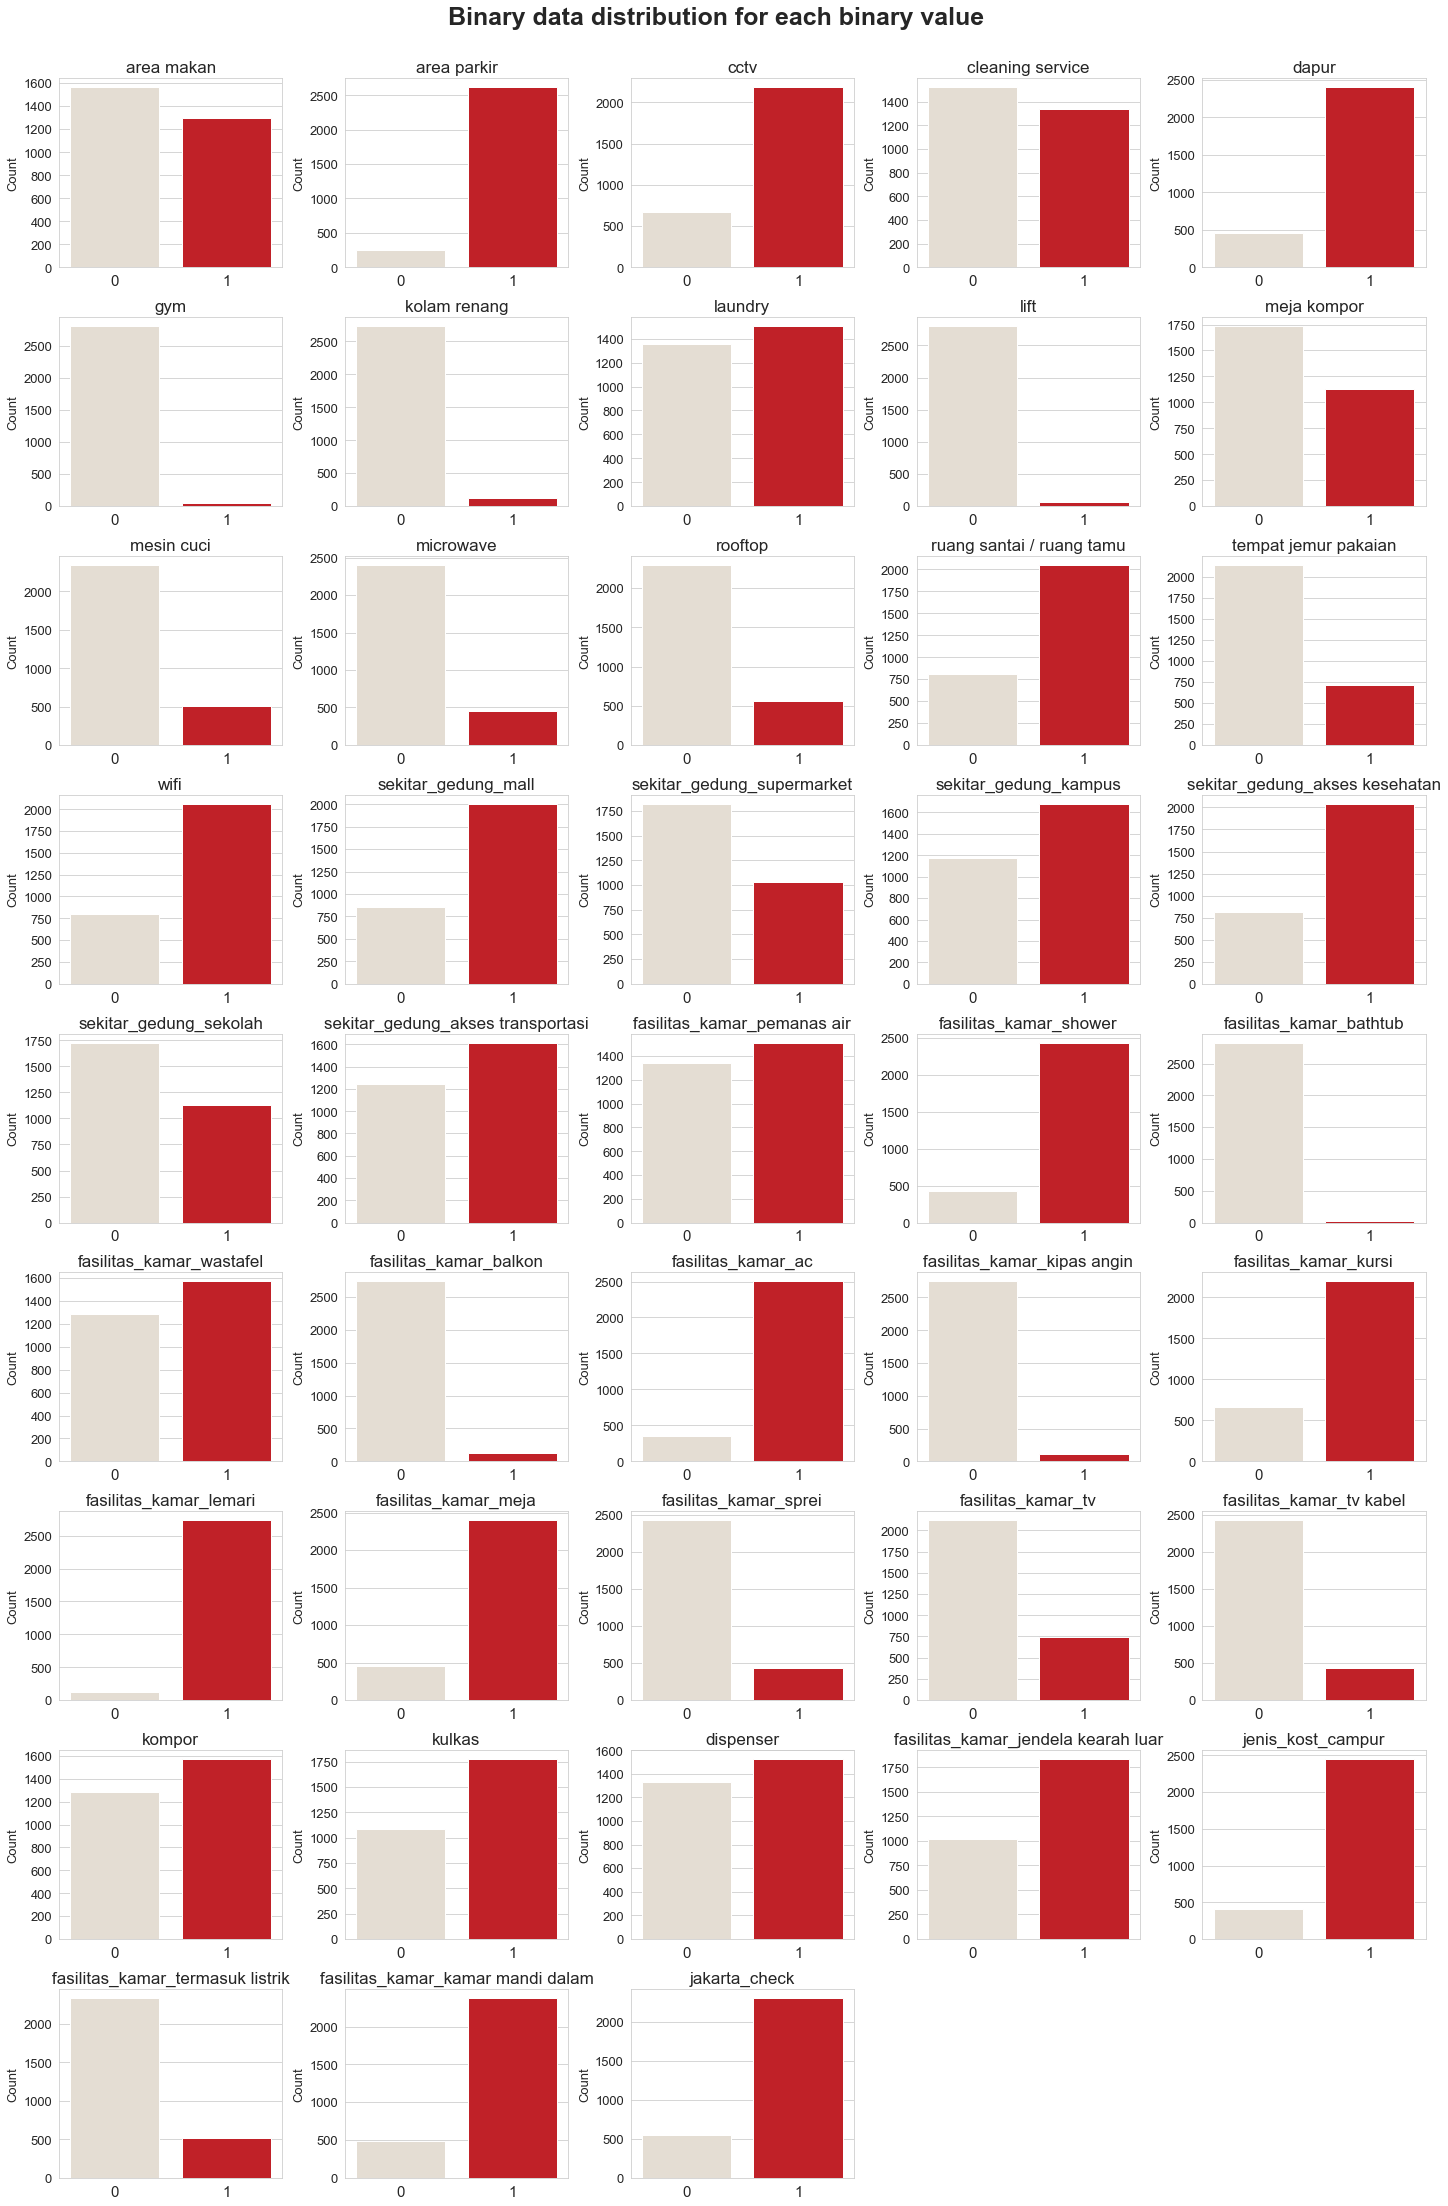

In [48]:
fig = plt.figure(figsize = (20, 30))
i = 1
for col in df[bin_cols].columns:
    plt.subplot(9, 5, i)
    ax = sns.countplot(data = df, x = col, palette = ['#E7DDD0', '#DA0610'])

    ax.set(xlabel = None, ylabel = None)
    ax.set_ylabel('Count', fontsize = 13)
    plt.title(str(col), loc = 'center', fontsize = 17)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 13)
    plt.tight_layout()
    i += 1
plt.suptitle(t = 'Binary data distribution for each binary value', y = 1.02, fontsize = 25, fontweight = 'bold')
plt.show()

### Monthly prices distribution and Average monthly prices for each binary value

Insights:
- We see that most of our features behave just like our common sense that the presence of facilities will positively affect to the monthly rent prices of boarding houses except `fasilitas_kamar_kipas angin` and `sekitar_gedung_kampus`.
- `fasilitas_kamar_kipas angin` seems to negatively affect to the monthly prices. We will drop this feature for sure since this doesn't make any sense.
- `sekitar_gedung_kampus` doesn't seem to affect at all to the monthly prices. We will drop this feature too.

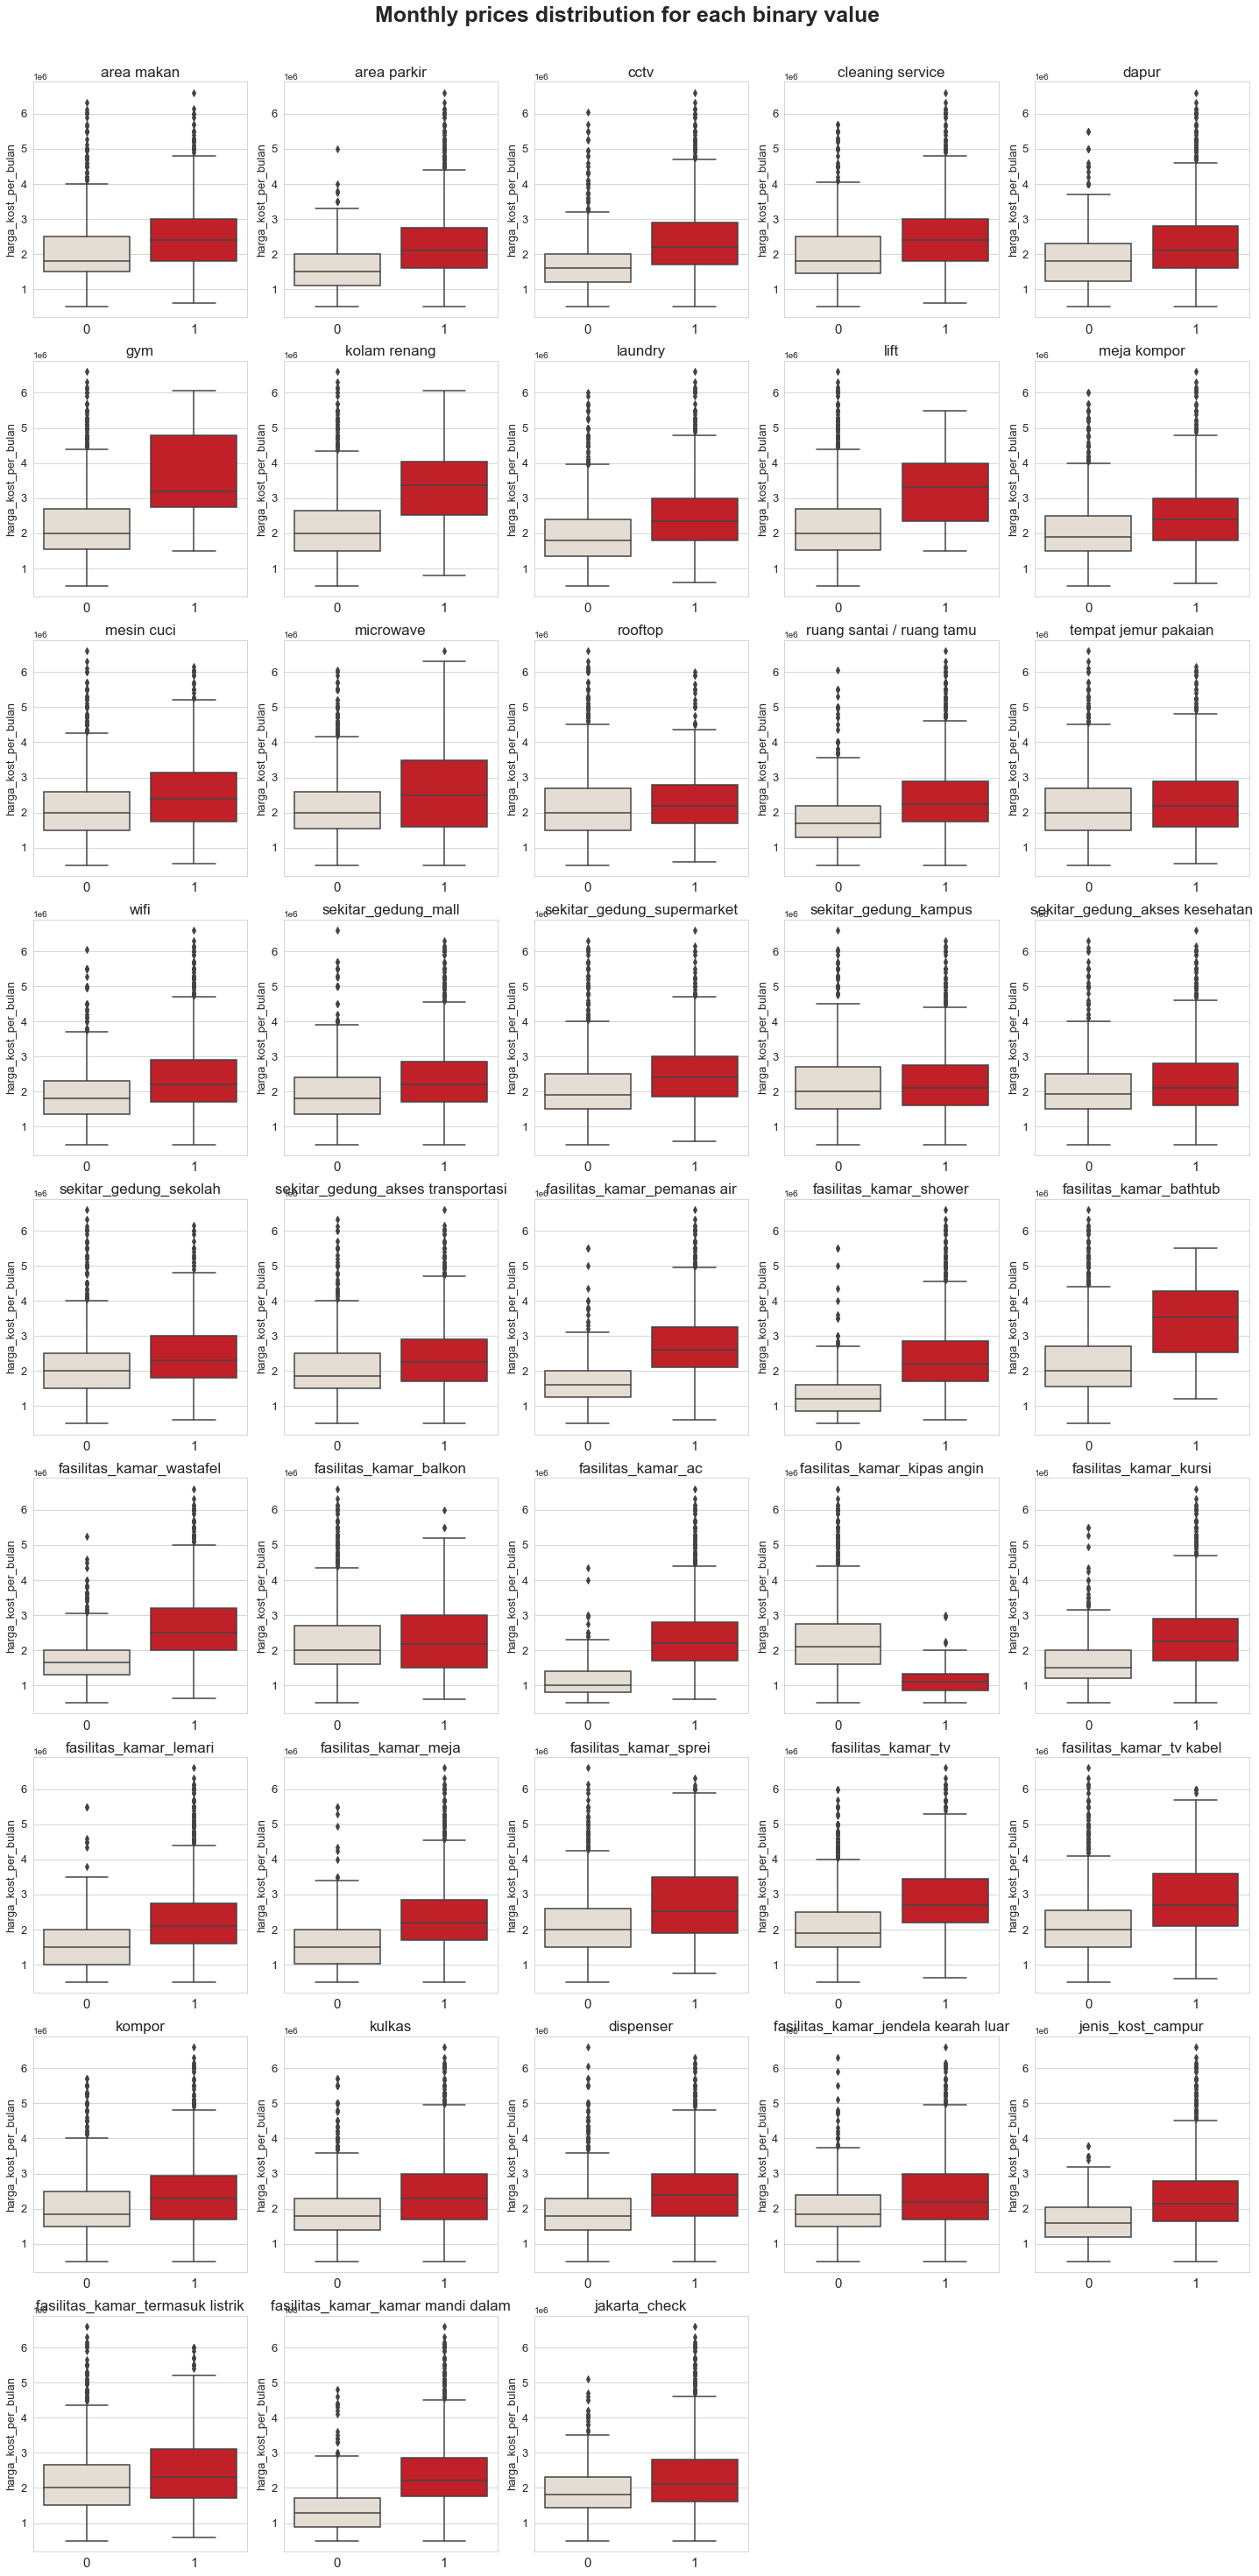

In [49]:
fig = plt.figure(figsize = (20, 40))
i = 1
for col in df[bin_cols].columns:
    plt.subplot(9, 5, i)
    ax = sns.boxplot(data = df, x = col, y = 'harga_kost_per_bulan', palette = ['#E7DDD0', '#DA0610'])
    
    ax.set(xlabel = None, ylabel = None)
    ax.set_ylabel('harga_kost_per_bulan', fontsize = 13)
    plt.title(str(col), loc = 'center', fontsize = 17)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 13)
    plt.tight_layout()
    i += 1
plt.suptitle(t = 'Monthly prices distribution for each binary value', y = 1.02, fontsize = 25, fontweight = 'bold')
plt.show()

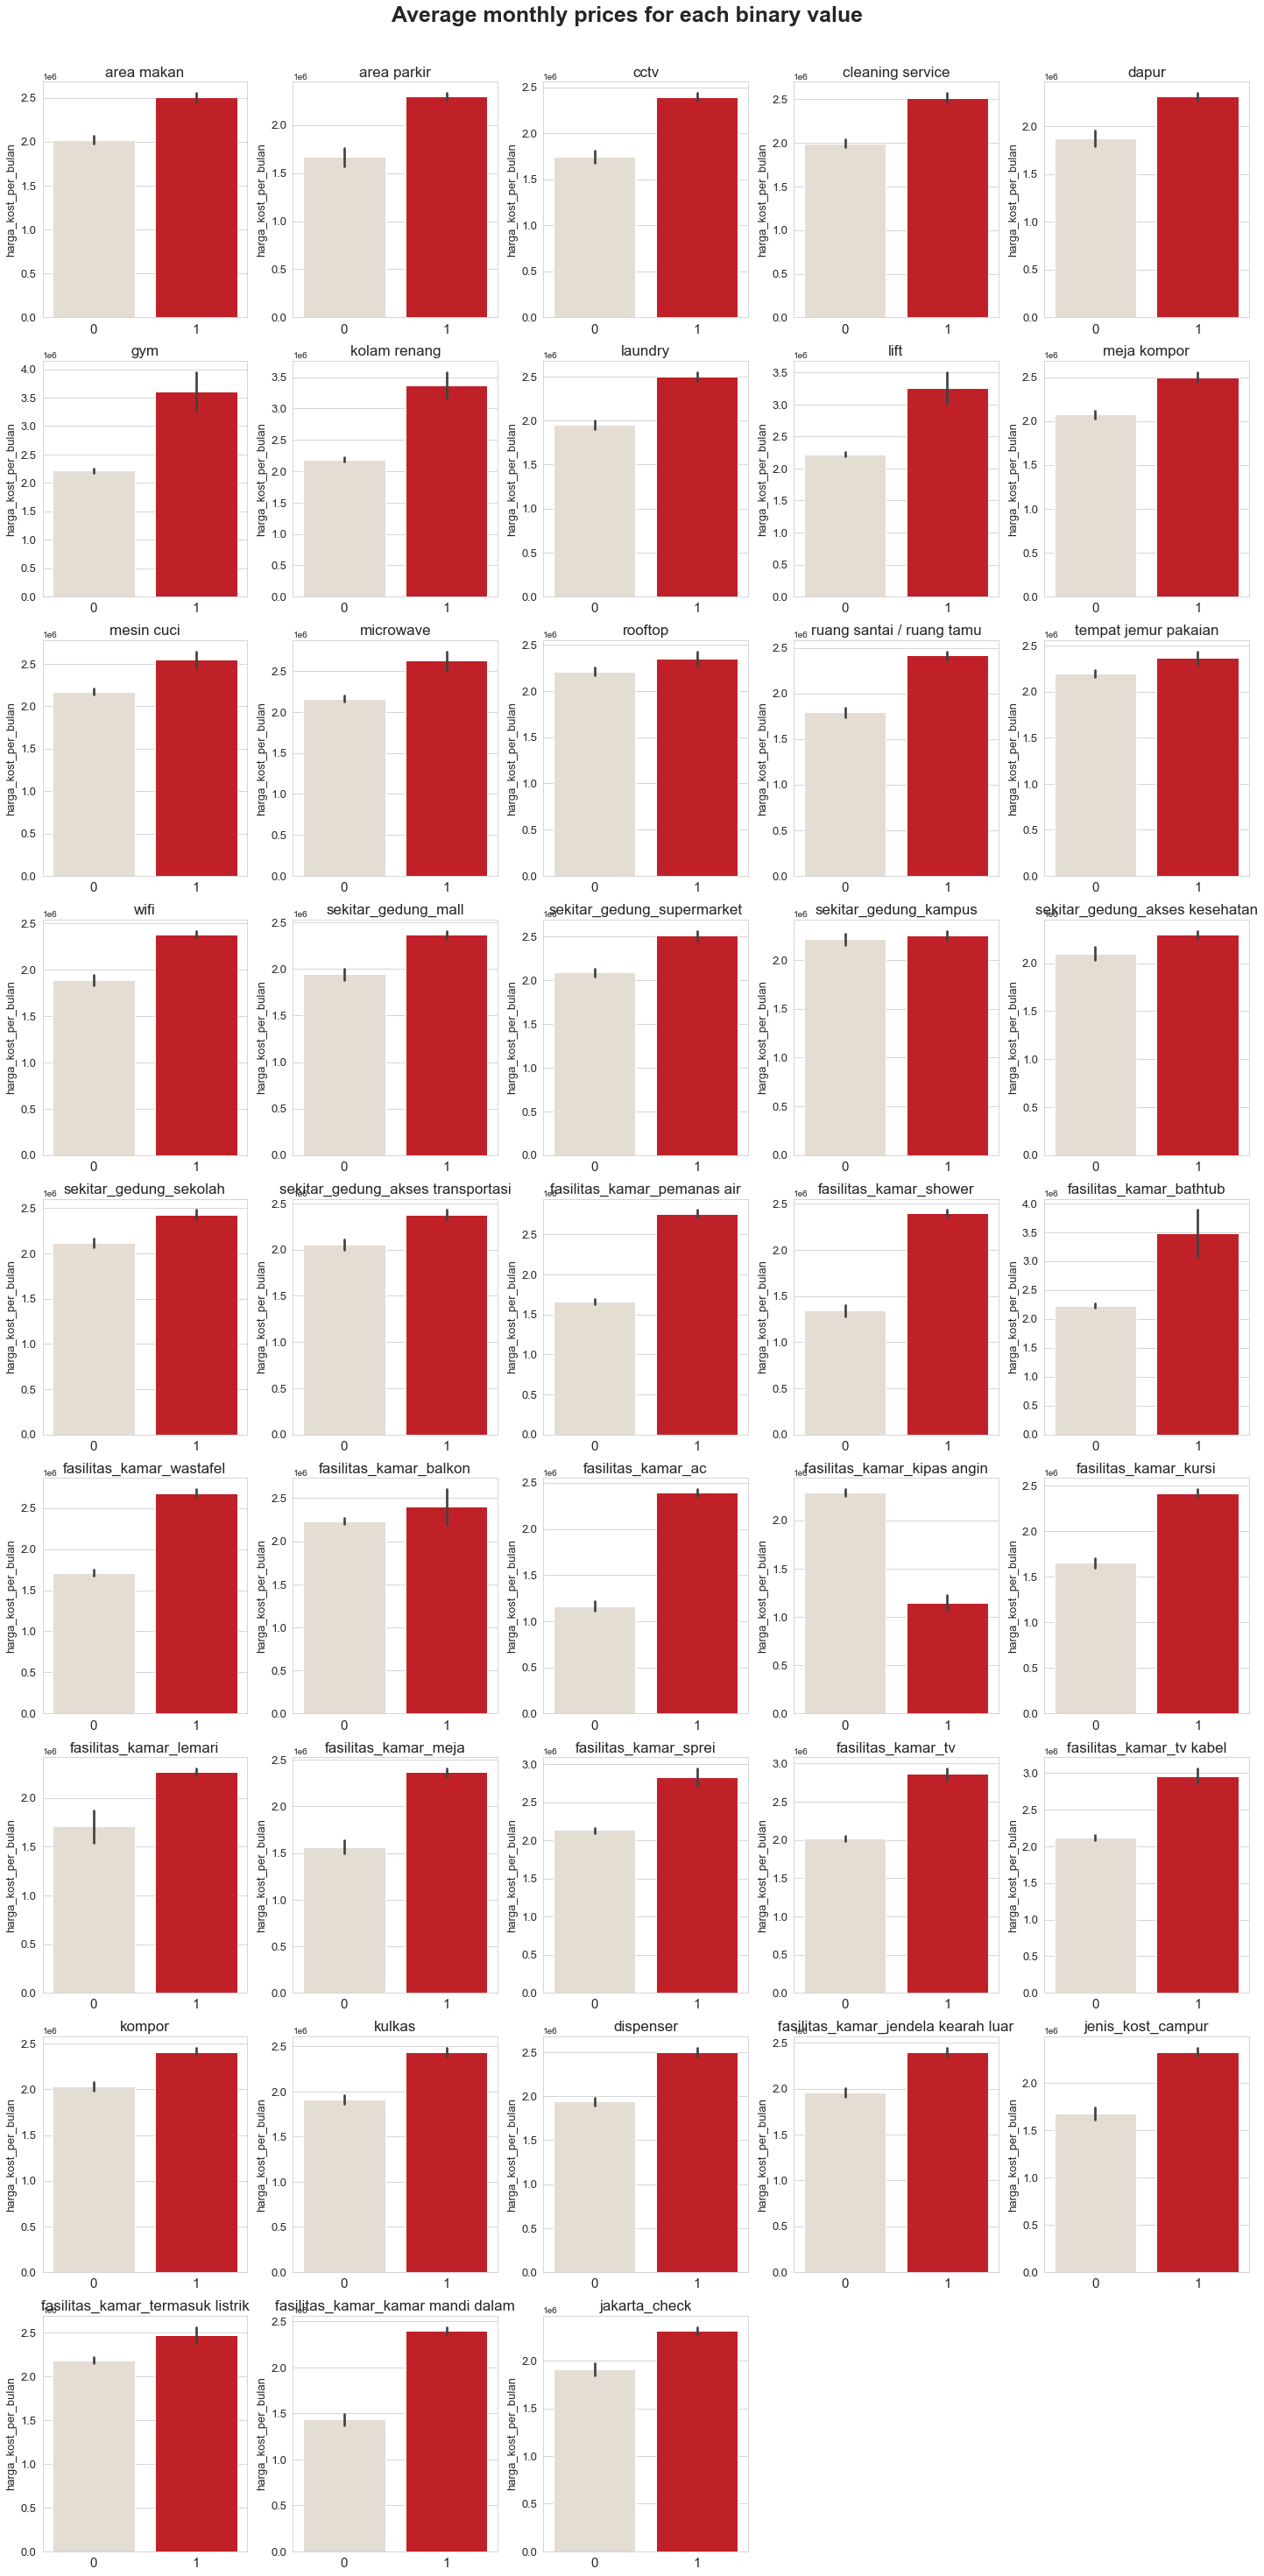

In [50]:
fig = plt.figure(figsize = (20, 40))
i = 1
for col in df[bin_cols].columns:
    plt.subplot(9, 5, i)
    ax = sns.barplot(data = df, x = col, y = 'harga_kost_per_bulan', palette = ['#E7DDD0', '#DA0610'])

    ax.set(xlabel = None, ylabel = None)
    ax.set_ylabel('harga_kost_per_bulan', fontsize = 13)
    plt.title(str(col), loc = 'center', fontsize = 17)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 13)
    plt.tight_layout()
    i += 1
plt.suptitle(t = 'Average monthly prices for each binary value', y = 1.02, fontsize = 25, fontweight = 'bold')
plt.show()

In [51]:
# drop 'fasilitas_kamar_kipas angin' and 'sekitar_gedung_kampus'
df.drop(['fasilitas_kamar_kipas angin', 'sekitar_gedung_kampus'], axis = 1, inplace = True)

for col in ['fasilitas_kamar_kipas angin', 'sekitar_gedung_kampus']:
    cat_cols.remove(col)
    bin_cols.remove(col)

### Total facilities

There are two types of facilities in our dataset, that are room facilities and building facilities. Building facility is a facility that can be used together with other boarding house room neighbors such as kitchen, parking area, dining area, washing machine, etc whereas room facility is a facility that can be used only by the owner of a particular room such as water heater, type of bed, wardrobe, etc.

Insights:
- The relationships between total facilities and monthly prices seem to be positively correlated with moderate level.
- The higher the number of facilities, the greater the monthly prices. It looks like what we expect.

In [52]:
near_building_cols = ['sekitar_gedung_mall', 'sekitar_gedung_supermarket', 
                      'sekitar_gedung_akses kesehatan', 'sekitar_gedung_sekolah', 'sekitar_gedung_akses transportasi']

room_fac_cols = [col for col in bin_cols if re.findall('fasilitas_kamar', col)]
building_fac_cols = [col for col in bin_cols if col not in room_fac_cols + near_building_cols]

print('Total of room facilities:', len(room_fac_cols))
print('Total of building facilities:', len(building_fac_cols))
print(len(bin_cols) - len(near_building_cols))

# create total facilities inside boarding house and room
df['total_fasilitas_kamar'] = df[room_fac_cols].sum(axis = 1)
df['total_fasilitas_gedung'] = df[building_fac_cols].sum(axis = 1)
df['total_fasilitas'] = df['total_fasilitas_kamar'] + df['total_fasilitas_gedung']

num_cols.append('total_fasilitas_kamar')
num_cols.append('total_fasilitas_gedung')
num_cols.append('total_fasilitas')

Total of room facilities: 15
Total of building facilities: 21
36


In [53]:
def scatterplot(col):
    fig, ax = plt.subplots(figsize = (6, 6))
    sns.regplot(data = df, x = col, y = 'harga_kost_per_bulan')
    plt.show()
    print('p-correlation:')
    display(df[[col, 'harga_kost_per_bulan']].corr())

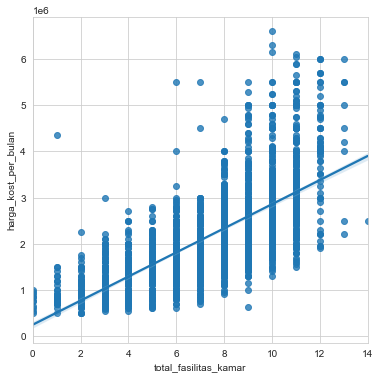

p-correlation:


total_fasilitas_kamar  harga_kost_per_bulan
total_fasilitas_kamar               1.000000              0.684679
harga_kost_per_bulan                0.684679              1.000000

In [54]:
scatterplot('total_fasilitas_kamar')

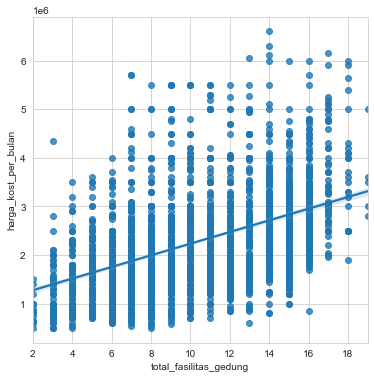

p-correlation:


total_fasilitas_gedung  harga_kost_per_bulan
total_fasilitas_gedung                1.000000              0.463488
harga_kost_per_bulan                  0.463488              1.000000

In [55]:
scatterplot('total_fasilitas_gedung')

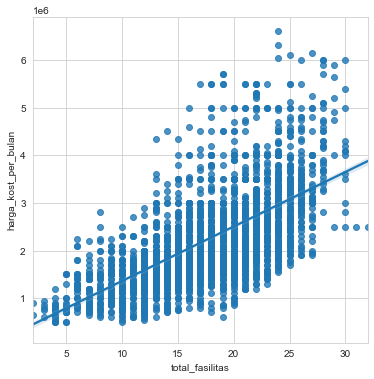

p-correlation:


total_fasilitas  harga_kost_per_bulan
total_fasilitas              1.000000              0.640411
harga_kost_per_bulan         0.640411              1.000000

In [56]:
scatterplot('total_fasilitas')

## Correlation and multicollinearity

For this section we won't use "latitude" and "longitude" features.

Insights:
- We can see that `total_fasilitas_kamar` and `total_fasilitas`, the features we have just created, are the only features having correlation values above 0.6.
- For the multicollinearity we will set the threshold of p-corr to be 0.7 (some articles and books prefered this threshold) hence all of independent features having p-corr greater than 0.7 will be considered to have multicollinearity effect.

There are three easy ways to handle multicollinearity issue. The first is to take only one independent variable which has the highest p-corr to the dependent variable among other correlated independent variables. The second is not to use a simple linear machine learning model such as Linear Regression. The third is to do some feature engineering among the correlated independent variables such as summing or averanging their each feature value.

Dropping correlated features may cause lower ML model performance but the learning parameters (the coefficient of linear regression) will be more reliable to be interpreted for later analysis. If we don't really need to analyze the learning parameters, we can completely ignore this multicollinearity issue.

As we won't certainly use Linear Regression at the end of the day, this issue can be handled automatically using more robust ML model but we would like to try to still use Linear Regression as the baseline model.

In [57]:
def tipe_kasur(x):
    if x == 'single bed':
        return 0
    elif x == 'long bed':
        return 1
    elif x == 'double bed':
        return 2
    elif x == '≥queen bed':
        return 3
df['fasilitas_kamar_tipe kasur (encoded)'] = df['fasilitas_kamar_tipe kasur'].apply(lambda x: tipe_kasur(x))

def jumlah_kasur(x):
    if x == '0 bed':
        return 0
    elif x == '1 bed':
        return 1
    elif x == '2 bed':
        return 2
df['fasilitas_kamar_jumlah kasur (encoded)'] = df['fasilitas_kamar_jumlah kasur'].apply(lambda x: jumlah_kasur(x))

In [58]:
selected_columns = bin_cols + [col for col in num_cols if col not in ['harga_kost_per_bulan', 'latitude', 'longitude']] + ['fasilitas_kamar_tipe kasur (encoded)', 'fasilitas_kamar_jumlah kasur (encoded)', 'harga_kost_per_bulan'] 

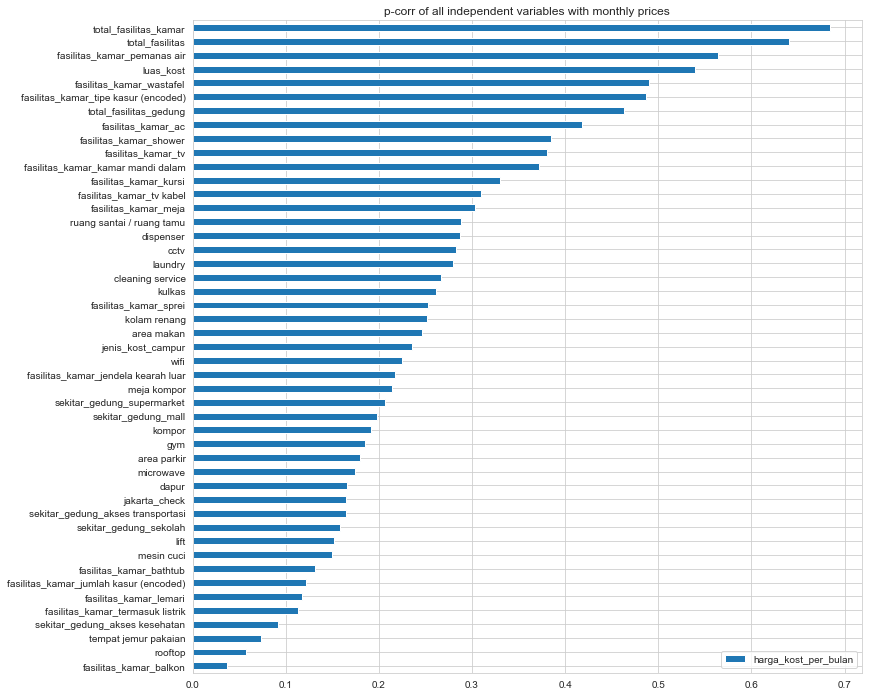

In [59]:
fig, ax = plt.subplots(figsize = (12, 12))
df[selected_columns].corr()[['harga_kost_per_bulan']].sort_values('harga_kost_per_bulan', ascending = True).drop('harga_kost_per_bulan', axis = 0).plot(kind = 'barh', ax = ax)
plt.title('p-corr of all independent variables with monthly prices')
plt.show()

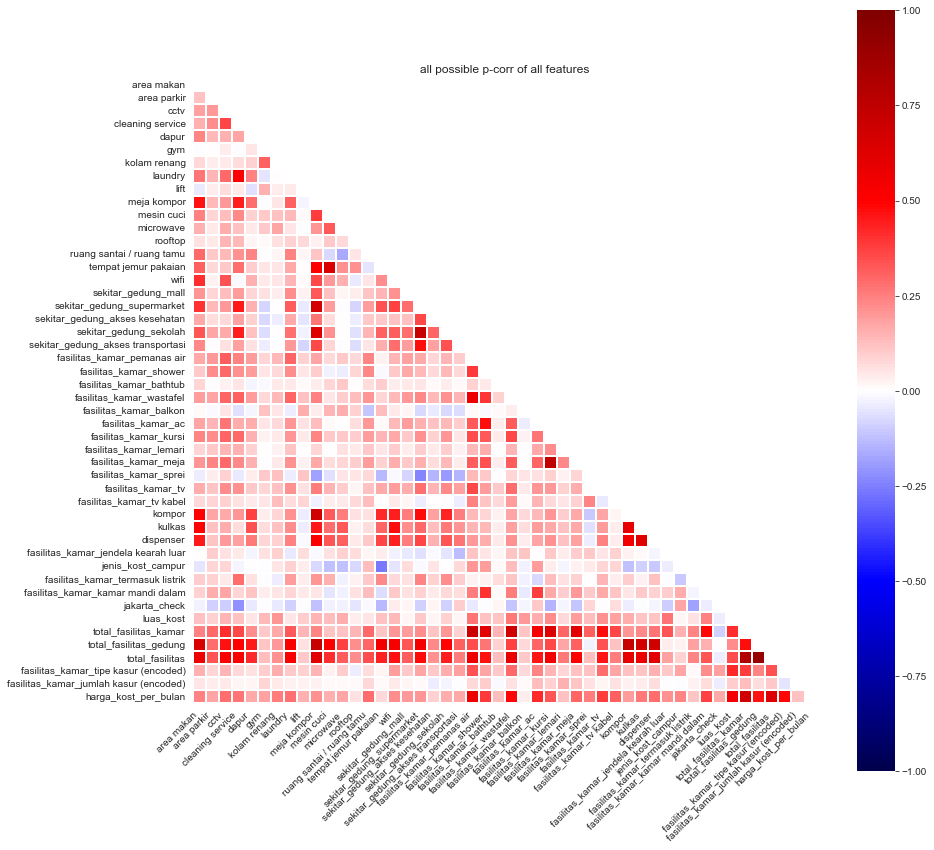

In [60]:
fig, ax = plt.subplots(figsize = (14, 14))
cat_correlation = df[selected_columns].corr()

mask = np.zeros_like(cat_correlation)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(cat_correlation, cmap = 'seismic', linewidths = 0.1,  mask = mask, vmin = -1, vmax = 1, square = True)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize = 10, ha = 'right', rotation = 45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize = 10, va = 'center', rotation = 0)
plt.title('all possible p-corr of all features')
plt.show()

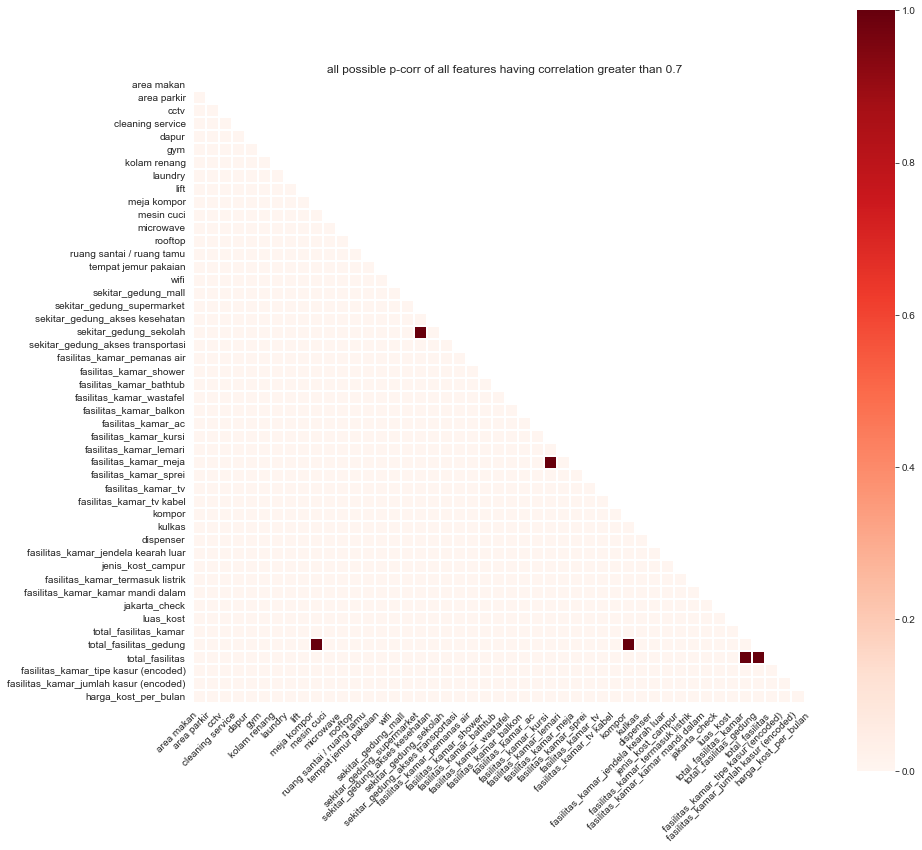

In [61]:
fig, ax = plt.subplots(figsize = (14, 14))
cat_correlation = df[selected_columns].corr().abs() > 0.7

mask = np.zeros_like(cat_correlation)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(cat_correlation, cmap = 'Reds', linewidths = 0.1,  mask = mask, vmin = 0, vmax = 1, square = True)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize = 10, ha = 'right', rotation = 45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize = 10, va = 'center', rotation = 0)
plt.title('all possible p-corr of all features having correlation greater than 0.7')
plt.show()

There are several groups of features which are highly correlated with other features:
- Group 1: `total_fasilitas`, `total_fasilitas_kamar`, and `total_fasilitas_gedung`
- Group 2: `kompor` and `meja kompor`
- Group 3: `fasilitas_kamar_kursi` and `fasilitas_kamar_meja`
- Group 4: `sekitar_gedung_sekolah` and `sekitar_gedung_supermarket`

We will handle this by grouping the correlated features into a single feature by summing them in the same group. 

For the first group, actually `total_fasilitas` is a feature that we get by summing `total_fasilitas_kamar` and `total_fasilitas_gedung` so we will just use `total_fasilitas` only to remove multicollinearity.

In [62]:
df['group_1'] = df['total_fasilitas']
df['group_2'] = df[['kompor', 'meja kompor']].sum(axis = 1)
df['group_3'] = df[['fasilitas_kamar_kursi', 'fasilitas_kamar_meja']].sum(axis = 1)
df['group_4'] = df[['sekitar_gedung_sekolah', 'sekitar_gedung_supermarket']].sum(axis = 1)
group_cols = ['group_1', 'group_2', 'group_3', 'group_4']
non_group_cols = ['total_fasilitas', 'kompor', 'meja kompor', 'fasilitas_kamar_kursi', 'fasilitas_kamar_meja', 'sekitar_gedung_sekolah', 'sekitar_gedung_supermarket']

# Modeling

## Data preprocessing

Here are to sum up all list of features that could be used for training our ML models later.
- `num_cols` is a list of all numerical features.
- `ord_cols` is a list of all ordinal features.
- `nom_cols` is a list of all nominal features.
- `bin_cols` is a list of all binary features.
- `group_cols` is a list of all grouped features based on multicollinearity features which have numerical data types.

Before we start the modeling process, we need to preprocess the data first. Here are some crucial preprocessing steps that we need to conduct:
- Split the data set into train and test sets.
    - For the splitting the dataset, we will stratify it based on the city.
- Scale the values of numerical features (`num_cols` and `group_cols`) using standardization or normalization except for tree-based ML algorithm by using `StandardScaler` or `MinMaxScaler` from `sklearn`.
- Encode the values of categorical features using one-hot-encoding for nominal features (`nom_cols`) and ordinal encoding for ordinal features (`ord_cols`) by using `OneHotEncoder` for one-hot-encoding and `OrdinalEncoder` for ordinal encoding from `sklearn`.
- For the binary features, `bin_cols`, we don't need to preprocess them as these features are already in binary values.

All of the preprocessing steps will be performed implicitly in `sklearn.Pipeline` object as the preprocessing pipeline.

In [63]:
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn import metrics
from sklearn.model_selection import cross_validate, train_test_split
from yellowbrick.model_selection import LearningCurve
plt.rcParams.update(plt.rcParamsDefault)
sns.set_style('whitegrid')
%matplotlib inline

# function to get the preprocessing pipeline
def get_feature_pipeline(numerical, nominal, ordinal, binary, algorithm, ordinal_category):
    # get every features as their data types
    get_numerical = FunctionTransformer(lambda x: x[numerical], validate = False)
    get_nominal = FunctionTransformer(lambda x: x[nominal], validate = False)
    get_ordinal = FunctionTransformer(lambda x: x[ordinal], validate = False)
    get_binary = FunctionTransformer(lambda x: x[binary], validate = False)
    
    # preprocessing pipeline for tree-based algorithm
    if algorithm == 'tree-based':
        pipeline_numerical = Pipeline([('numerical', get_numerical)])
        pipeline_nominal = Pipeline([('nominal', get_nominal),
                                     ('nominal-encoder', OneHotEncoder())])
        pipeline_ordinal = Pipeline([('ordinal', get_ordinal),
                                     ('ordinal-encoder', OrdinalEncoder(categories = ordinal_category))])
        pipeline_binary = Pipeline([('binary', get_binary)])
        feature_pipeline = FeatureUnion([('pipeline_numerical', pipeline_numerical),
                                         ('pipeline_nominal', pipeline_nominal),
                                         ('pipeline_ordinal', pipeline_ordinal),
                                         ('pipeline_binary',pipeline_binary)])
        return feature_pipeline
    
    # preprocessing pipeline for other than tree-based algorithm 
    elif algorithm == 'non-tree-based':
        pipeline_numerical = Pipeline([('numerical', get_numerical),
                                       ('scaler', MinMaxScaler())])  # scaler               
        pipeline_nominal = Pipeline([('nominal', get_nominal),
                                     ('nominal-encoder', OneHotEncoder())])
        pipeline_ordinal = Pipeline([('ordinal', get_ordinal),
                                     ('ordinal-encoder', OrdinalEncoder(categories = ordinal_category)),
                                     ('scaler', MinMaxScaler())])    # scaler
        pipeline_binary = Pipeline([('binary', get_binary)])
        feature_pipeline = FeatureUnion([('pipeline_numerical', pipeline_numerical),
                                         ('pipeline_nominal', pipeline_nominal),
                                         ('pipeline_ordinal', pipeline_ordinal),
                                         ('pipeline_binary',pipeline_binary)])
        return feature_pipeline
    else:
        print('error in algorithm input argument. try "tree-based" or "non-tree-based"')
        
# function to evaluate the model performances
def model_eval(model, name, plot):
    print(30*'=', 'model evaluation of "{}"'.format(name), 30*'=')
    # compute the model predictions
    y_pred_train = model.predict(X_train).reshape(-1, 1)
    y_pred_test = model.predict(X_test).reshape(-1, 1)
    
    # compute the model performances
    r2_train = metrics.r2_score(y_train, y_pred_train).round(3)
    r2_test = metrics.r2_score(y_test, y_pred_test).round(3)
    RMSE_train = metrics.mean_squared_error(y_train, y_pred_train, squared = False).round(3)
    RMSE_test = metrics.mean_squared_error(y_test, y_pred_test, squared = False).round(3)
    MAE_train = metrics.mean_absolute_error(y_train, y_pred_train).round(3)
    MAE_test = metrics.mean_absolute_error(y_test, y_pred_test).round(3)
    r2_cv = cross_validate(estimator = model, X = X_train, y = y_train, cv = 5, scoring = 'r2', return_train_score = True)
    
    # create a dictionary of lists of model performances
    model_performances = {'R^2':[r2_train, r2_test],
                          'R^2 5-CV train and validate':['{} ± {}'.format(r2_cv['train_score'].mean().round(3), r2_cv['train_score'].std().round(3)),
                                                         '{} ± {}'.format(r2_cv['test_score'].mean().round(3), r2_cv['test_score'].std().round(3))],
                          'RMSE':[RMSE_train, RMSE_test],
                          'MAE':[MAE_train, MAE_test]}
    # create a dataframe of model performances
    tuples = [(name, 'train'),
              (name, 'test')]
    results = pd.DataFrame(model_performances, index = pd.MultiIndex.from_tuples(tuples))
    
    # plot the actual values vs predicted values, the residual error, and the residual error distribution
    if plot == True:
        fig, ax = plt.subplots(figsize = (15, 4), nrows = 1, ncols = 3)
        
        # the actual values vs predicted values
        ax[0].scatter(y_train.values.reshape(-1, 1), y_pred_train, label = 'train set', alpha = 0.5)
        ax[0].scatter(y_test.values.reshape(-1, 1), y_pred_test, label = 'test set', alpha = 0.5)
        ax[0].plot([0, 6000000], [0, 6000000], '--k')
        ax[0].set_xlabel('Actual Price (IDR)', fontsize = 10)
        ax[0].set_ylabel('Predicted Price (IDR)', fontsize = 10)
        ax[0].set_title('Model predictions compared to observed values', fontsize = 12, y = 1.05)
        ax[0].legend()
        
        # the residual error
        ax[1].scatter(y_pred_train, y_pred_train - y_train.values.reshape(-1, 1), label = 'train set', alpha = 0.5)
        ax[1].scatter(y_pred_test, y_pred_test - y_test.values.reshape(-1, 1), label = 'test set', alpha = 0.5)
        ax[1].set_xlabel('Predicted Price (IDR)', fontsize = 10)
        ax[1].set_ylabel('Residual Error (IDR)', fontsize = 10)
        ax[1].set_title('The differences between predicted prices and actual prices', fontsize = 12, y = 1.05)
        ax[1].hlines(y = 0, xmin = 0, xmax = 6000000, linewidth = 2, colors = 'black', linestyles = 'dashed')
        ax[1].legend()
        
        # the residual error distribution
        ax[2].hist(y_pred_train - y_train.values.reshape(-1, 1), label = 'train set', alpha = 0.5, orientation = 'horizontal', bins = 30)
        ax[2].hist(y_pred_test - y_test.values.reshape(-1, 1), label = 'test set', alpha = 0.5, orientation = 'horizontal', bins = 30)
        ax[2].set_title('Distribution of residual errors', fontsize = 12, y = 1.05)
        ax[2].legend()
        
        plt.axis('tight')
        plt.show()
    return results

# function to get the list of features from FeatureUnion object
def get_feature_names(feature_union_object, numerical, ordinal, binary):
    if type(feature_union_object) == FeatureUnion:
        num_features = numerical
        nom_features = feature_union_object.transformer_list[1][1].steps[1][1].get_feature_names_out().tolist()
        ord_features = ordinal
        bin_features = binary
        feature_names = num_features + nom_features + ord_features + bin_features
        return feature_names
    else:
        print('wrong input argument of feature_union_object!')

## Baseline model (Linear Regression)

In this part we are going to model the rent prices using a very simple machine learning algorithm called Linear Regression. We will use all the features that we have in the dataset first, then we will try to remove the multicollinearity features, then we will use greedy search algorithm called sequential feature selection with backward elimination as the feature selection method to find the best features to fit the model properly, and the last but not least we will try to perform manual feature selection.

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
df.drop([2603], axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True)
X = df.drop('harga_kost_per_bulan', axis = 1)
y = df[['harga_kost_per_bulan']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = df['kota'])
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(2143, 71) (715, 71)
(2143, 1) (715, 1)


### Using all features

In this part we will use all features that we have to be fed into our Linear Regression model.

============================== model evaluation of "LinReg_all_features" ==============================


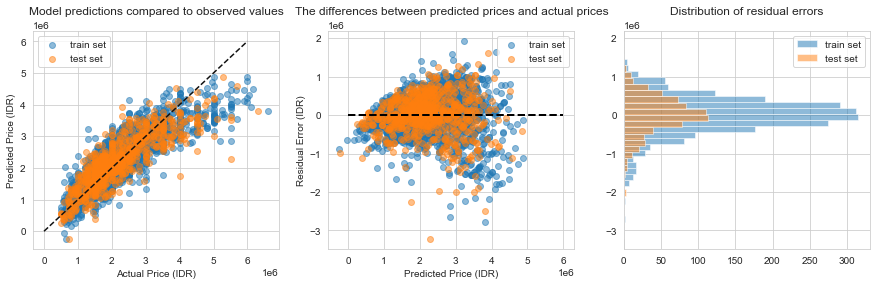

Wall time: 5.28 s


R^2 R^2 5-CV train and validate        RMSE  \
LinReg_all_features train  0.733               0.735 ± 0.005  504122.099   
                    test   0.705               0.712 ± 0.021  528792.067   

                                  MAE  
LinReg_all_features train  371164.653  
                    test   388580.538

In [66]:
%%time
#### LinReg_all_features ####

# set up the features to be included in preprocessing pipeline
pl_features_LinReg_all_features = get_feature_pipeline(numerical = [col for col in num_cols if col not in ['harga_kost_per_bulan', 'latitude', 'longitude']], 
                                                       nominal = nom_cols, 
                                                       ordinal = ord_cols, 
                                                       binary = bin_cols, 
                                                       algorithm = 'non-tree-based', 
                                                       ordinal_category = [['0 bed', '1 bed', '2 bed'],
                                                                           ['single bed', 'long bed', 'double bed', '≥queen bed']])

# create workflow pipeline
LinReg_all_features = Pipeline([('preprocess the features', pl_features_LinReg_all_features),
                            ('Linear Regression', LinearRegression(n_jobs = -1))])

# fit the model
LinReg_all_features.fit(X_train, y_train)

# evaluate the model
df_LinReg_all_features = model_eval(LinReg_all_features, 
                                    'LinReg_all_features', plot = True)
df_LinReg_all_features

In [67]:
# analyze the linear regression model using statsmodels library
import statsmodels.api as sm

# get the feature names in the trained 'LinReg_baseline' model
features = get_feature_names(feature_union_object = LinReg_all_features[0], 
                             numerical = [col for col in num_cols if col not in ['harga_kost_per_bulan', 'latitude', 'longitude']], 
                             ordinal = ord_cols, 
                             binary = bin_cols)

# get the preprocessed X_train data
X_train_preprocessed = pd.DataFrame(LinReg_all_features[0].transform(X_train).toarray(), columns = features)

# get the model summary
model = sm.OLS(y_train.reset_index(drop = True), X_train_preprocessed).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     harga_kost_per_bulan   R-squared:                       0.733
Model:                              OLS   Adj. R-squared:                  0.727
Method:                   Least Squares   F-statistic:                     115.0
Date:                  Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                          10:59:45   Log-Likelihood:                -31180.
No. Observations:                  2143   AIC:                         6.246e+04
Df Residuals:                      2092   BIC:                         6.275e+04
Df Model:                            50                                         
Covariance Type:              nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
luas_kost                            1.774e+06   9.03e+04     19.639      0.000     1.6e+06    1.95e+06
total_fasilitas_kamar                1.091e+05   1.01e+04     10.843      0.000    8.93e+04    1.29e+05
total_fasilitas_gedung               2.385e+05   3.74e+04      6.378      0.000    1.65e+05    3.12e+05
total_fasilitas                      1.861e+05   2.18e+04      8.530      0.000    1.43e+05    2.29e+05
kota_Bandung                        -3.078e+05    1.1e+05     -2.793      0.005   -5.24e+05   -9.17e+04
kota_Depok                          -6.341e+05   1.12e+05     -5.656      0.000   -8.54e+05   -4.14e+05
kota_Jakarta Barat                  -1.246e+05   3.13e+04     -3.980      0.000   -1.86e+05   -6.32e+04
kota_Jakarta Pusat                   1.252e+05   3.13e+04      3.997      0.000    6.37e+04    1.87e+05
kota_Jakarta Selatan                 2.191e+05   2.74e+04      7.993      0.000    1.65e+05    2.73e+05
kota_Jakarta Timur                  -2.583e+05   3.77e+04     -6.850      0.000   -3.32e+05   -1.84e+05
kota_Jakarta Utara                  -3.646e+04   4.72e+04     -0.772      0.440   -1.29e+05    5.61e+04
kota_Tangerang                      -4.281e+05   9.83e+04     -4.356      0.000   -6.21e+05   -2.35e+05
fasilitas_kamar_jumlah kasur         4.437e+05   1.28e+05      3.455      0.001    1.92e+05    6.96e+05
fasilitas_kamar_tipe kasur           2.224e+05   3.75e+04      5.927      0.000    1.49e+05    2.96e+05
area makan                          -2330.6358   2.96e+04     -0.079      0.937   -6.04e+04    5.57e+04
area parkir                           7.84e+04    4.4e+04      1.782      0.075   -7893.010    1.65e+05
cctv                                -5.389e+04   3.29e+04     -1.638      0.102   -1.18e+05    1.06e+04
cleaning service                     1.143e+05   3.38e+04      3.383      0.001     4.8e+04    1.81e+05
dapur                               -8.725e+04   3.58e+04     -2.437      0.015   -1.57e+05    -1.7e+04
gym                                  3.239e+05   8.88e+04      3.649      0.000     1.5e+05    4.98e+05
kolam renang                         2.205e+05   5.77e+04      3.824      0.000    1.07e+05    3.34e+05
laundry                              7.556e+04    2.8e+04      2.698      0.007    2.06e+04     1.3e+05
lift                                 7.915e+04   8.59e+04      0.922      0.357   -8.93e+04    2.48e+05
meja kompor                          3.144e+04   4.22e+04      0.744      0.457   -5.14e+04    1.14e+05
mesin cuci                            8.06e+04   4.09e+04      1.971      0.049     408.623    1.61e+05
microwave                            1.114e+05   3.61e+04      3.083      0.002    4.05e+04    1.82e+05
rooftop                             -1.733e+0

Insights:
- We get a quite good model performance with R-squared of 0.732 on train set and 0.720 on test set. It seems that the residual erros are normally distributed but unfortunately the model can't manage to generalize the actual prices above Rp 5,000,000 (the predicted prices always below Rp 5,000,000).
- There are some features having p-values (`P>|t|`) > 0.05 significant level. They represent non-significant features meaning that there is no significant linear relation between our features (independent variables) and our target, monthly rent price (dependent varaible). Here are some insignificant features:
    - `jenis_kost_Kost Putri`
    - `kota_Jakarta Barat`
    - `area makan`
    - `are parkir`
    - `cctv`
    - `dapur`
    - `lift`
    - `meja kompor`
    - `rooftop`
    - `wifi`
    - `sekitar_gedung_supermarket`, `sekitar_gedung_kesehatan`, and `sekitar_gedung_sekolah`
    - `fasilitas_kamar_bathtub`
    - `fasilitas_kamar_kursi`
    - `fasilitas_kamar_meja`
    - `dispenser`

### Removing multicollinearity features

In this part we will try to train the Linear Regression model without using multicollinearity features that we have determined based on pearson-correlation of features on the previous section - "Correlation and multicollinearity".

*Note that `total_fasilitas`, `total_fasilitas_kamar`, and `total_fasilitas_gedung` values need to be updated since we won't use some of the binary features*

In [68]:
# update 'total_fasilitas', 'total_fasilitas_kamar', and 'total_fasilitas_gedung'
near_building_cols = ['sekitar_gedung_mall', 'sekitar_gedung_supermarket', 
                      'sekitar_gedung_akses kesehatan', 'sekitar_gedung_sekolah', 'sekitar_gedung_akses transportasi']

room_fac_cols = [col for col in bin_cols if re.findall('fasilitas_kamar', col) and col not in non_group_cols]
building_fac_cols = [col for col in bin_cols if col not in room_fac_cols + near_building_cols + non_group_cols]

print('Total of room facilities:', len(room_fac_cols))
print('Total of building facilities:', len(building_fac_cols))

# create total facilities inside boarding house and room
df['total_fasilitas_kamar'] = df[room_fac_cols].sum(axis = 1)
df['total_fasilitas_gedung'] = df[building_fac_cols].sum(axis = 1)
df['total_fasilitas'] = df['total_fasilitas_kamar'] + df['total_fasilitas_gedung']

df['group_1'] = df['total_fasilitas']

Total of room facilities: 13
Total of building facilities: 19


============================== model evaluation of "LinReg_no_multicol" ==============================


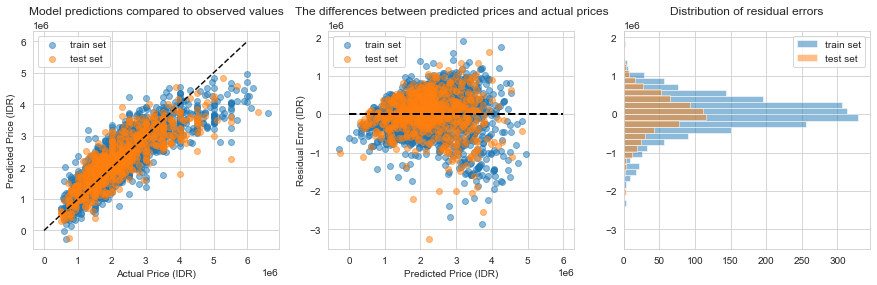

Wall time: 2.21 s


R^2 R^2 5-CV train and validate        RMSE  \
LinReg_no_multicol train  0.732               0.733 ± 0.005  505655.220   
                   test   0.706               0.711 ± 0.022  528408.306   

                                 MAE  
LinReg_no_multicol train  371584.173  
                   test   387042.934

In [69]:
%%time
#### LinReg_no_multicol ####

# set up the features to be included in preprocessing pipeline
pl_features_LinReg_no_multicol = get_feature_pipeline(numerical = [col for col in num_cols if col not in ['harga_kost_per_bulan', 'latitude', 'longitude', 'total_fasilitas_kamar', 'total_fasilitas_gedung', 'total_fasilitas']] + group_cols, 
                                                      nominal = nom_cols, 
                                                      ordinal = ord_cols, 
                                                      binary = [col for col in bin_cols if col not in non_group_cols], 
                                                      algorithm = 'non-tree-based', 
                                                      ordinal_category = [['0 bed', '1 bed', '2 bed'],
                                                                          ['single bed', 'long bed', 'double bed', '≥queen bed']])

# create workflow pipeline
LinReg_no_multicol = Pipeline([('preprocess the features', pl_features_LinReg_no_multicol),
                               ('Linear Regression', LinearRegression(n_jobs = -1))])

# fit the model
LinReg_no_multicol.fit(X_train, y_train)

# evaluate the model
df_LinReg_no_multicol = model_eval(LinReg_no_multicol, 
                                   'LinReg_no_multicol', plot = True)
df_LinReg_no_multicol

In [70]:
# analyze the linear regression model using statsmodels library
import statsmodels.api as sm

# get the feature names in the trained 'LinReg_no_multicol' model
features = get_feature_names(feature_union_object = LinReg_no_multicol[0], 
                             numerical = [col for col in num_cols if col not in ['harga_kost_per_bulan', 'latitude', 'longitude', 'total_fasilitas_kamar', 'total_fasilitas_gedung', 'total_fasilitas']] + group_cols, 
                             ordinal = ord_cols, 
                             binary = [col for col in bin_cols if col not in non_group_cols])

# get the preprocessed X_train data
X_train_preprocessed = pd.DataFrame(LinReg_no_multicol[0].transform(X_train).toarray(), columns = features)
# X_train_preprocessed = sm.add_constant(X_train_preprocessed)

# get the model summary
model = sm.OLS(y_train.reset_index(drop = True), X_train_preprocessed).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     harga_kost_per_bulan   R-squared:                       0.732
Model:                              OLS   Adj. R-squared:                  0.726
Method:                   Least Squares   F-statistic:                     121.5
Date:                  Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                          10:59:47   Log-Likelihood:                -31186.
No. Observations:                  2143   AIC:                         6.247e+04
Df Residuals:                      2095   BIC:                         6.274e+04
Df Model:                            47                                         
Covariance Type:              nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
luas_kost                            1.761e+06   9.04e+04     19.487      0.000    1.58e+06    1.94e+06
group_1                              2.029e+05    2.4e+04      8.446      0.000    1.56e+05     2.5e+05
group_2                             -1.203e+05   4.34e+04     -2.770      0.006   -2.05e+05   -3.51e+04
group_3                              4.413e+04    3.6e+04      1.225      0.221   -2.65e+04    1.15e+05
group_4                             -3.349e+04   4.18e+04     -0.801      0.423   -1.16e+05    4.85e+04
kota_Bandung                        -3.372e+05   1.14e+05     -2.959      0.003   -5.61e+05   -1.14e+05
kota_Depok                          -6.703e+05   1.16e+05     -5.797      0.000   -8.97e+05   -4.44e+05
kota_Jakarta Barat                  -1.253e+05   3.15e+04     -3.980      0.000   -1.87e+05   -6.36e+04
kota_Jakarta Pusat                   1.221e+05   3.15e+04      3.870      0.000    6.02e+04    1.84e+05
kota_Jakarta Selatan                 2.131e+05   2.77e+04      7.708      0.000    1.59e+05    2.67e+05
kota_Jakarta Timur                  -2.644e+05   3.76e+04     -7.041      0.000   -3.38e+05   -1.91e+05
kota_Jakarta Utara                  -4.677e+04   4.74e+04     -0.987      0.324    -1.4e+05    4.62e+04
kota_Tangerang                      -4.686e+05   1.02e+05     -4.591      0.000   -6.69e+05   -2.68e+05
fasilitas_kamar_jumlah kasur         4.573e+05   1.28e+05      3.559      0.000    2.05e+05    7.09e+05
fasilitas_kamar_tipe kasur           2.269e+05   3.76e+04      6.039      0.000    1.53e+05    3.01e+05
area makan                            1.12e+04   2.94e+04      0.380      0.704   -4.65e+04    6.89e+04
area parkir                          7.011e+04   4.42e+04      1.585      0.113   -1.66e+04    1.57e+05
cctv                                -3.742e+04    3.3e+04     -1.135      0.256   -1.02e+05    2.72e+04
cleaning service                     1.418e+05   3.35e+04      4.235      0.000    7.61e+04    2.07e+05
dapur                               -7.958e+04   3.61e+04     -2.203      0.028    -1.5e+05   -8754.001
gym                                  3.327e+05   8.89e+04      3.742      0.000    1.58e+05    5.07e+05
kolam renang                         2.358e+05   5.77e+04      4.086      0.000    1.23e+05    3.49e+05
laundry                              8.751e+04   2.79e+04      3.140      0.002    3.29e+04    1.42e+05
lift                                 9.862e+04   8.62e+04      1.144      0.253   -7.04e+04    2.68e+05
mesin cuci                           9.252e+04   4.07e+04      2.275      0.023    1.28e+04    1.72e+05
microwave                            1.302e+05   3.62e+04      3.593      0.000    5.91e+04    2.01e+05
rooftop                              -1.43e+0

Insights:
- It looks like after removing multicollinearity features our model doesn't improve at all but on the bright side, our new features (i.e. `group_1`, `group_2`, and `group_3` except `group_4`) have significant linear relation to the target variable compared to the multicollinearity features that we had before.

### Feature selection: Sequential Backward Floating Selection (SBFS)

In this part we would like to know what features are the best to be used in our Linear Regression model. Especially for the binary features because we have a lot of them. Therefore we will use a greedy approach algorthm to find the best one, that is Sequential Backward Floating Selection (SBFS) by `mlxtend` library.

In a nutshell this algorithm will train a model using all the features that we have and then remove one feature at a time in which that feature could increase the model performance. This will be iterated over and over again until the desired k-features is reached. [Check this link for more detail](http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector)

In [71]:
# prepare the workflow of preprocessing steps of the dataset
pl_features_LinReg_SBFS = get_feature_pipeline(numerical = [col for col in num_cols if col not in ['harga_kost_per_bulan', 'latitude', 'longitude']], 
                                               nominal = [], 
                                               ordinal = ord_cols, 
                                               binary = bin_cols, 
                                               algorithm = 'non-tree-based', 
                                               ordinal_category = [['0 bed', '1 bed', '2 bed'],
                                                                   ['single bed', 'long bed', 'double bed', '≥queen bed']])
# fit the preprocessing steps of the dataset
pl_features_LinReg_SBFS.fit(X_train)

# get the feature names in the fitted 'pl_features_LinReg_SBFS' model
features = get_feature_names(feature_union_object = pl_features_LinReg_SBFS, 
                             numerical = [col for col in num_cols if col not in ['harga_kost_per_bulan', 'latitude', 'longitude']], 
                             ordinal = ord_cols, 
                             binary = bin_cols)

# get the preprocessed dataset - X_train_preprocessed
X_train_preprocessed = pd.DataFrame(pl_features_LinReg_SBFS.transform(X_train).toarray(), columns = features)

In [72]:
%%time
# find the best features using SBFS algorithm
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
sfs = SFS(estimator = LinearRegression(), 
          k_features = 'best', 
          forward = False, 
          floating = True, 
          verbose = 0,
          scoring = 'r2',
          cv = 5,
          n_jobs = -1)
sfs = sfs.fit(X_train_preprocessed, y_train.reset_index(drop = True), custom_feature_names = X_train_preprocessed.columns)

# get the best features from SFS with backward elimination
SBFS_cols = list(sfs.k_feature_names_)

Wall time: 30.7 s


*Note that `total_fasilitas`, `total_fasilitas_kamar`, and `total_fasilitas_gedung` values need to be updated since we won't use some of the binary features*

In [73]:
# update 'total_fasilitas', 'total_fasilitas_kamar', and 'total_fasilitas_gedung'
near_building_cols = ['sekitar_gedung_mall', 'sekitar_gedung_supermarket', 
                      'sekitar_gedung_akses kesehatan', 'sekitar_gedung_sekolah', 'sekitar_gedung_akses transportasi']

room_fac_cols = [col for col in bin_cols if re.findall('fasilitas_kamar', col) and col in SBFS_cols]
building_fac_cols = [col for col in bin_cols if col not in room_fac_cols + near_building_cols and col in SBFS_cols]

print('Total of room facilities:', len(room_fac_cols))
print('Total of building facilities:', len(building_fac_cols))

# create total facilities inside boarding house and room
df['total_fasilitas_kamar'] = df[room_fac_cols].sum(axis = 1)
df['total_fasilitas_gedung'] = df[building_fac_cols].sum(axis = 1)
df['total_fasilitas'] = df['total_fasilitas_kamar'] + df['total_fasilitas_gedung']

Total of room facilities: 8
Total of building facilities: 12


============================== model evaluation of "LinReg_SBFS" ==============================


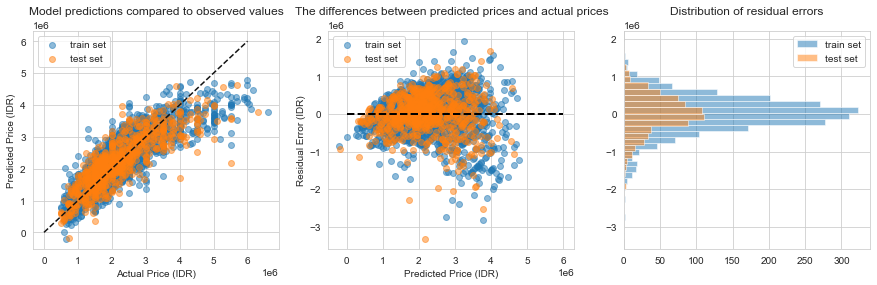

Wall time: 1.06 s


R^2 R^2 5-CV train and validate        RMSE         MAE
LinReg_SBFS train  0.730               0.731 ± 0.005  507489.831  373317.821
            test   0.701                0.717 ± 0.02  532264.927  391882.975

In [74]:
%%time
#### LinReg_SBFS ####

# set up the features to be included in preprocessing pipeline
pl_features_LinReg_SBFS = get_feature_pipeline(numerical = [col for col in num_cols if col in SBFS_cols], 
                                               nominal = nom_cols, 
                                               ordinal = [col for col in ord_cols if col in SBFS_cols], 
                                               binary = [col for col in bin_cols if col in SBFS_cols], 
                                               algorithm = 'non-tree-based', 
                                               ordinal_category = [['0 bed', '1 bed', '2 bed'],
                                                                   ['single bed', 'long bed', 'double bed', '≥queen bed']])

# create workflow pipeline
LinReg_SBFS = Pipeline([('preprocess the features', pl_features_LinReg_SBFS),
                        ('Linear Regression', LinearRegression(n_jobs = -1))])

# fit the model
LinReg_SBFS.fit(X_train, y_train)

# evaluate the model
df_LinReg_SBFS = model_eval(LinReg_SBFS, 
                            'LinReg_SBFS', plot = True)
df_LinReg_SBFS

Insights:
- It seems that our Linear Regresion model doesn't improved with only using the best features getting from SBFS algorithm. I wonder how it would happen if we use another robust model, i.e. Gradient Boosting Model (GBM) with these selected features later.

### Manual feature selection

In this part we will select the features manually in which they commonly exist in most of boarding house in Indonesia.

In [75]:
uncommon_cols = ['gym', 'kolam renang', 'lift', 'meja kompor',
                 'rooftop', 'fasilitas_kamar_bathtub', 'fasilitas_kamar_balkon']

*Note that `total_fasilitas`, `total_fasilitas_kamar`, and `total_fasilitas_gedung` values need to be updated since we won't use some of the binary features*

In [76]:
# update 'total_fasilitas', 'total_fasilitas_kamar', and 'total_fasilitas_gedung'
near_building_cols = ['sekitar_gedung_mall', 'sekitar_gedung_supermarket', 
                      'sekitar_gedung_akses kesehatan', 'sekitar_gedung_sekolah', 'sekitar_gedung_akses transportasi']

room_fac_cols = [col for col in bin_cols if re.findall('fasilitas_kamar', col) and col not in uncommon_cols]
building_fac_cols = [col for col in bin_cols if col not in room_fac_cols + near_building_cols + uncommon_cols]

print('Total of room facilities:', len(room_fac_cols))
print('Total of building facilities:', len(building_fac_cols))

# create total facilities inside boarding house and room
df['total_fasilitas_kamar'] = df[room_fac_cols].sum(axis = 1)
df['total_fasilitas_gedung'] = df[building_fac_cols].sum(axis = 1)
df['total_fasilitas'] = df['total_fasilitas_kamar'] + df['total_fasilitas_gedung']

Total of room facilities: 13
Total of building facilities: 16


============================== model evaluation of "LinReg_common_feature" ==============================


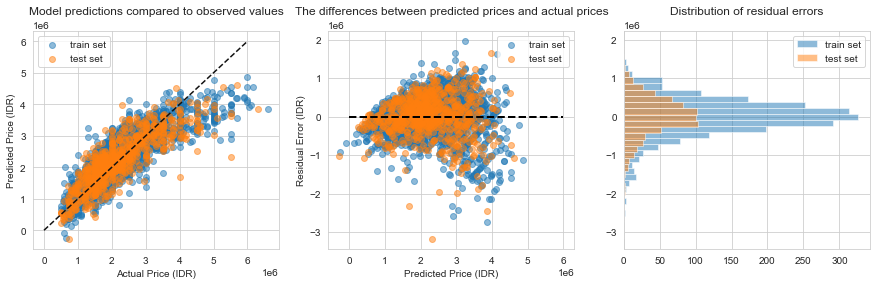

Wall time: 862 ms


R^2 R^2 5-CV train and validate        RMSE  \
LinReg_common_feature train  0.729               0.731 ± 0.005  507844.416   
                      test   0.700               0.711 ± 0.022  533261.857   

                                    MAE  
LinReg_common_feature train  373854.819  
                      test   394383.086

In [77]:
%%time
#### LinReg_common_feature ####

# set up the features to be included in preprocessing pipeline
pl_features_LinReg_common_feature = get_feature_pipeline(numerical = [col for col in num_cols if col not in ['harga_kost_per_bulan', 'latitude', 'longitude']], 
                                                         nominal = nom_cols, 
                                                         ordinal = ord_cols, 
                                                         binary = [col for col in bin_cols if col not in uncommon_cols], 
                                                         algorithm = 'non-tree-based', 
                                                         ordinal_category = [['0 bed', '1 bed', '2 bed'],
                                                                             ['single bed', 'long bed', 'double bed', '≥queen bed']])

# create workflow pipeline
LinReg_common_feature = Pipeline([('preprocess the features', pl_features_LinReg_common_feature),
                                  ('Linear Regression', LinearRegression(n_jobs = -1))])

# fit the model
LinReg_common_feature.fit(X_train, y_train)

# evaluate the model
df_LinReg_common_feature = model_eval(LinReg_common_feature, 
                                      'LinReg_common_feature', plot = True)
df_LinReg_common_feature

### Manual feature selection and removing outliers

In this part we will remove outlier records in which have `gym`, `kolam renang`, `lift`, `fasilitas_kamar_bathtub`, and `fasilitas_kamar_balkon` as boarding house facilities. We remove these records because the presence of such facilities don't exist commonly in boarding house and most people usually have no intention to rent boading house with such facilities. Instead of removing the features, we will remove the records hence those records will not affect our model when we are not using uncommon facilities to train the model.

In [78]:
df_common = df.copy()
df_common = df_common[df_common['gym'] == 0]
df_common = df_common[df_common['kolam renang'] == 0]
df_common = df_common[df_common['lift'] == 0]
df_common = df_common[df_common['fasilitas_kamar_bathtub'] == 0]
df_common = df_common[df_common['fasilitas_kamar_balkon'] == 0]
df_common = df_common.reset_index(drop = True)

X = df_common.drop('harga_kost_per_bulan', axis = 1)
y = df_common[['harga_kost_per_bulan']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = df_common['kota'])
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1901, 71) (634, 71)
(1901, 1) (634, 1)


In [79]:
uncommon_cols = ['gym', 'kolam renang', 'lift', 'meja kompor',
                 'rooftop', 'fasilitas_kamar_bathtub', 'fasilitas_kamar_balkon']

*Note that `total_fasilitas`, `total_fasilitas_kamar`, and `total_fasilitas_gedung` values need to be updated since we won't use some of the binary features*

In [80]:
# update 'total_fasilitas', 'total_fasilitas_kamar', and 'total_fasilitas_gedung'
near_building_cols = ['sekitar_gedung_mall', 'sekitar_gedung_supermarket', 
                      'sekitar_gedung_akses kesehatan', 'sekitar_gedung_sekolah', 'sekitar_gedung_akses transportasi']

room_fac_cols = [col for col in bin_cols if re.findall('fasilitas_kamar', col) and col not in uncommon_cols]
building_fac_cols = [col for col in bin_cols if col not in room_fac_cols + near_building_cols + uncommon_cols]

print('Total of room facilities:', len(room_fac_cols))
print('Total of building facilities:', len(building_fac_cols))

# create total facilities inside boarding house and room
df['total_fasilitas_kamar'] = df[room_fac_cols].sum(axis = 1)
df['total_fasilitas_gedung'] = df[building_fac_cols].sum(axis = 1)
df['total_fasilitas'] = df['total_fasilitas_kamar'] + df['total_fasilitas_gedung']

Total of room facilities: 13
Total of building facilities: 16


============================== model evaluation of "LinReg_no_outliers" ==============================


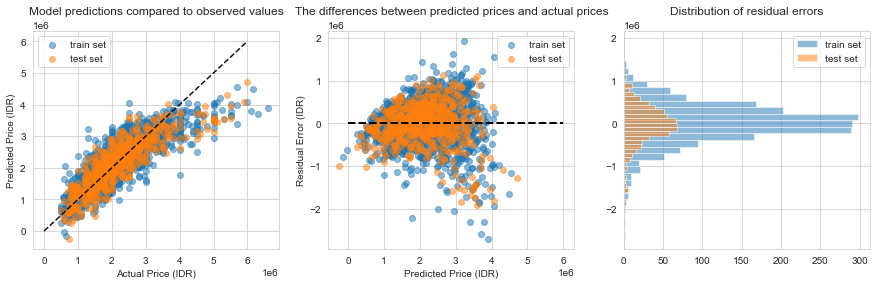

Wall time: 899 ms


R^2 R^2 5-CV train and validate        RMSE  \
LinReg_no_outliers train  0.708                0.71 ± 0.007  478510.957   
                   test   0.733                0.689 ± 0.03  472501.726   

                                 MAE  
LinReg_no_outliers train  349957.506  
                   test   346066.491

In [81]:
%%time
#### LinReg_no_outliers ####

# set up the features to be included in preprocessing pipeline
pl_features_LinReg_no_outliers = get_feature_pipeline(numerical = [col for col in num_cols if col not in ['harga_kost_per_bulan', 'latitude', 'longitude']], 
                                                      nominal = nom_cols, 
                                                      ordinal = ord_cols, 
                                                      binary = [col for col in bin_cols if col not in uncommon_cols], 
                                                      algorithm = 'non-tree-based', 
                                                      ordinal_category = [['0 bed', '1 bed', '2 bed'],
                                                                          ['single bed', 'long bed', 'double bed', '≥queen bed']])

# create workflow pipeline
LinReg_no_outliers = Pipeline([('preprocess the features', pl_features_LinReg_no_outliers),
                               ('Linear Regression', LinearRegression(n_jobs = -1))])

# fit the model
LinReg_no_outliers.fit(X_train, y_train)

# evaluate the model
df_LinReg_no_outliers = model_eval(LinReg_no_outliers, 
                                   'LinReg_no_outliers', plot = True)
df_LinReg_no_outliers

### Summary of baseline models

Here are the summary of models that we have trained so far:
- `LinReg_all_features` is a trained linear regression model using all features that we have.
- `LinReg_no_multicol` is a trained linear regression model using all features that we have and we have also removed multicollinearity features.
- `LinReg_SBFS` is a trained linear regression model using selected features based on the selection process of Sequential Backward Floating Selection (SBFS) algorithm.
- `LinReg_common_feature` is a trained linear regression model using the most common features (facilities) that commonly exist in boarding house Indonesia.
- `LinReg_no_outliers` is a trained linear regression model using the most common features (facilities) that commonly exist in boarding house Indonesia and we have droped those records in which they provide uncommon facilities such as `gym`. `kolam renang`, etc.

At this point, we have trained 5 baseline models using Linear Regression algorithm and we found the one that performs the best, that is `LinReg_no_outliers`. This model has the lowest `RMSE` and `MAE` values compread to the others. However all the model seems having good performances with `R-Squared` over 70%.

In [82]:
# summary of Linear Regression models
LinReg_model = pd.concat([df_LinReg_all_features, df_LinReg_no_multicol, 
                          df_LinReg_SBFS, df_LinReg_common_feature, df_LinReg_no_outliers], axis = 0)
LinReg_model

R^2 R^2 5-CV train and validate        RMSE  \
LinReg_all_features   train  0.733               0.735 ± 0.005  504122.099   
                      test   0.705               0.712 ± 0.021  528792.067   
LinReg_no_multicol    train  0.732               0.733 ± 0.005  505655.220   
                      test   0.706               0.711 ± 0.022  528408.306   
LinReg_SBFS           train  0.730               0.731 ± 0.005  507489.831   
                      test   0.701                0.717 ± 0.02  532264.927   
LinReg_common_feature train  0.729               0.731 ± 0.005  507844.416   
                      test   0.700               0.711 ± 0.022  533261.857   
LinReg_no_outliers    train  0.708                0.71 ± 0.007  478510.957   
                      test   0.733                0.689 ± 0.03  472501.726   

                                    MAE  
LinReg_all_features   train  371164.653  
                      test   388580.538  
LinReg_no_multicol    train  371584.173  
                      test   387042.934  
LinReg_SBFS           train  373317.821  
                      test   391882.975  
LinReg_common_feature train  373854.819  
                      test   394383.086  
LinReg_no_outliers    train  349957.506  
                      test   346066.491

As we can see from the learning curve of `LinReg_no_outliers` model, adding more data won't add a value to our model performance since the curve of training score and cross validation score from the train set (`X_train` and `y_train`) has already reached a plateau. In addition, our model doesn't seem to be overfitting the train set but I think that it is a little bit underfitting. We could improve our model even better and reduce the bias of the model by using more complex machine learning algorithm.

Now let's try a few other more robust models and compare them with our baseline Linear Regression model, that is `LinReg_no_outliers`. 

In the next part we will use the train and test sets as the same as the `LinReg_no_outliers` model. Also we will use the same features that we have been used on `LinReg_no_outliers` model.

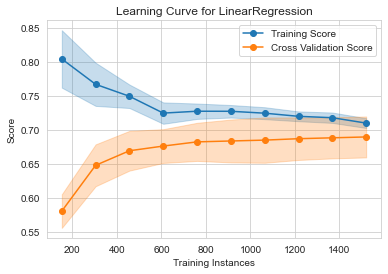

In [83]:
# plot the learning curve of 'LinReg_no_outliers' model
visualizer = LearningCurve(LinReg_no_outliers, scoring = 'r2', cv = 5, n_jobs = -1, 
                           train_sizes = np.linspace(0.1, 1.0, 10))
visualizer.fit(X_train, y_train)
visualizer.show()
plt.show()

In [84]:
# prepare train and test sets for the next modeling section
X = df_common.drop('harga_kost_per_bulan', axis = 1)
y = df_common[['harga_kost_per_bulan']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = df_common['kota'])
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1901, 71) (634, 71)
(1901, 1) (634, 1)


## Random Forest

In [85]:
from sklearn.ensemble import RandomForestRegressor

### Default hyperparameter

What a surprise! Our Random Forest model seems to be overfitting to the train set. Let's perfom hyperparameter tuning on it and see what happen.

============================== model evaluation of "RF_no_outliers" ==============================


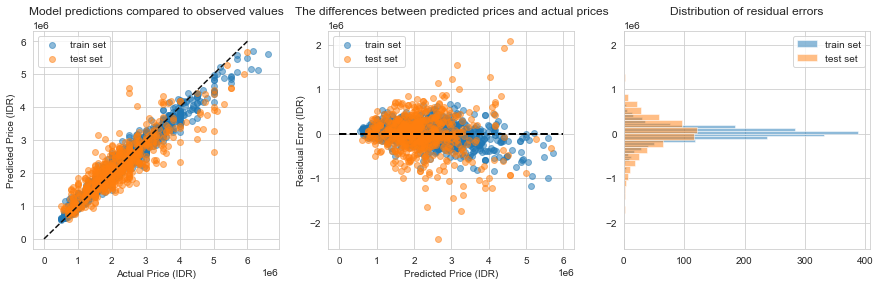

Wall time: 8.53 s


R^2 R^2 5-CV train and validate        RMSE  \
RF_no_outliers train  0.961                0.96 ± 0.002  174370.078   
               test   0.786               0.718 ± 0.029  423286.167   

                             MAE  
RF_no_outliers train  121860.032  
               test   297649.845

In [86]:
%%time
#### RF_no_outliers ####

# set up the features to be included in preprocessing pipeline
pl_features_RF_no_outliers = get_feature_pipeline(numerical = [col for col in num_cols if col not in ['harga_kost_per_bulan', 'latitude', 'longitude']], 
                                                  nominal = nom_cols, 
                                                  ordinal = ord_cols, 
                                                  binary = [col for col in bin_cols if col not in uncommon_cols], 
                                                  algorithm = 'tree-based', 
                                                  ordinal_category = [['0 bed', '1 bed', '2 bed'],
                                                                      ['single bed', 'long bed', 'double bed', '≥queen bed']])

# create workflow pipeline
RF_no_outliers = Pipeline([('preprocess the features', pl_features_RF_no_outliers),
                           ('Random Forest', RandomForestRegressor(n_jobs = -1))])

# fit the model
RF_no_outliers.fit(X_train, y_train)

# evaluate the model
df_RF_no_outliers = model_eval(RF_no_outliers, 
                              'RF_no_outliers', plot = True)
df_RF_no_outliers

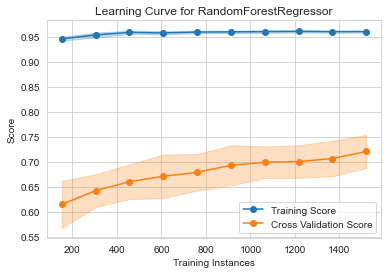

In [87]:
# plot the learning curve of 'RF_no_outliers' model
visualizer = LearningCurve(RF_no_outliers, scoring = 'r2', cv = 5, n_jobs = -1, 
                           train_sizes = np.linspace(0.1, 1.0, 10))
visualizer.fit(X_train, y_train)
visualizer.show()
plt.show()

### Hyperparameter tuning

It seems that after hyperparameter tuning our model is still overfit the train set but on the bright sight the tuned model performs slightly better than the one that untuned. Moreover, take a look on the learning curve, the training score is much greater than the validation score and if we extrapolate the curve then the model probably requires more training data in order to generalize more effectively the training set.

Let's see what happen if we use the most popular and robust ML algorithm, Gradient Boosting Method.

In [88]:
%%time
# get the feature names in the trained 'RF_no_outliers' model
features = get_feature_names(feature_union_object = RF_no_outliers[0], 
                             numerical = [col for col in num_cols if col not in ['harga_kost_per_bulan', 'latitude', 'longitude']], 
                             ordinal = ord_cols, 
                             binary = [col for col in bin_cols if col not in uncommon_cols])

# get the preprocessed X_train data
X_train_preprocessed = pd.DataFrame(RF_no_outliers[0].transform(X_train).toarray(), columns = features)

# hyperparameter tuning with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'n_estimators': list(np.arange(10, 501, 10)),
              'max_features': list(np.linspace(0.3, 1, 30)),
              'max_depth': list(np.arange(1, 110, 10)),
              'min_samples_split': list(np.arange(2, 21, 2)),
              'min_samples_leaf': list(np.arange(2, 21, 2))}

model = RandomForestRegressor(n_jobs = -1, random_state = 42)

model_random_search = RandomizedSearchCV(model, param_grid, scoring = 'r2', cv = 5, n_iter = 250, 
                                         n_jobs = -1, random_state = 42, verbose = 1)

model_random_search.fit(X_train_preprocessed, y_train)
print('done')

Fitting 5 folds for each of 250 candidates, totalling 1250 fits
done
Wall time: 4min 52s


============================== model evaluation of "RF_no_outliers_tuned" ==============================


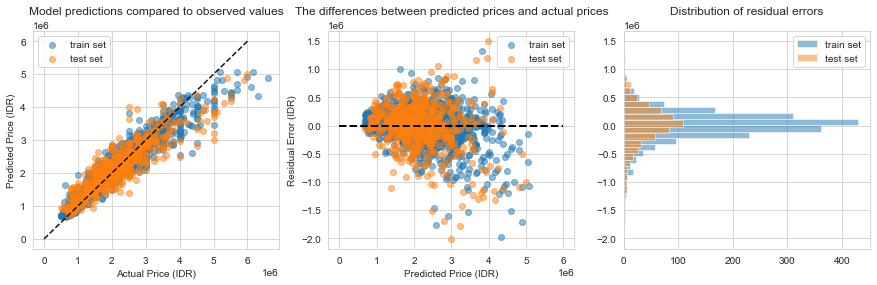

Wall time: 8.18 s


R^2 R^2 5-CV train and validate        RMSE  \
RF_no_outliers_tuned train  0.897               0.896 ± 0.003  283978.946   
                     test   0.798               0.725 ± 0.023  411127.168   

                                   MAE  
RF_no_outliers_tuned train  195563.772  
                     test   292612.168

In [89]:
%%time
#### RF_no_outliers_tuned ####

# set up the features to be included in preprocessing pipeline
pl_features_RF_no_outliers_tuned = get_feature_pipeline(numerical = [col for col in num_cols if col not in ['harga_kost_per_bulan', 'latitude', 'longitude']], 
                                                        nominal = nom_cols, 
                                                        ordinal = ord_cols, 
                                                        binary = [col for col in bin_cols if col not in uncommon_cols], 
                                                        algorithm = 'tree-based', 
                                                        ordinal_category = [['0 bed', '1 bed', '2 bed'],
                                                                            ['single bed', 'long bed', 'double bed', '≥queen bed']])

# create workflow pipeline
RF_no_outliers_tuned = Pipeline([('preprocess the features', pl_features_RF_no_outliers_tuned),
                                 ('Random Forest', model_random_search.best_estimator_)])

# fit the model
RF_no_outliers_tuned.fit(X_train, y_train)

# evaluate the model
df_RF_no_outliers_tuned = model_eval(RF_no_outliers_tuned, 
                                     'RF_no_outliers_tuned', plot = True)
df_RF_no_outliers_tuned

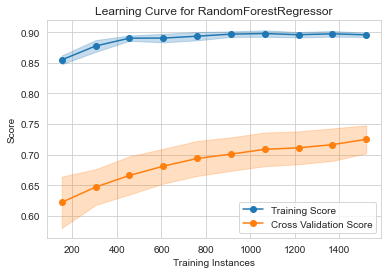

In [90]:
# plot the learning curve of 'RF_no_outliers_tuned' model
visualizer = LearningCurve(RF_no_outliers_tuned, scoring = 'r2', cv = 5, n_jobs = -1, 
                           train_sizes = np.linspace(0.1, 1.0, 10))
visualizer.fit(X_train, y_train)
visualizer.show()
plt.show()

### Summary of Random Forest models

In [91]:
# summary of Random Forest models
RF_model = pd.concat([df_RF_no_outliers, df_RF_no_outliers_tuned], axis = 0)
RF_model

R^2 R^2 5-CV train and validate        RMSE  \
RF_no_outliers       train  0.961                0.96 ± 0.002  174370.078   
                     test   0.786               0.718 ± 0.029  423286.167   
RF_no_outliers_tuned train  0.897               0.896 ± 0.003  283978.946   
                     test   0.798               0.725 ± 0.023  411127.168   

                                   MAE  
RF_no_outliers       train  121860.032  
                     test   297649.845  
RF_no_outliers_tuned train  195563.772  
                     test   292612.168

## LightGBM

In [92]:
from lightgbm import LGBMRegressor

### Default hyperparameter

It seems that LGBM performs better than Random Forest models. Let's see what happen after performing hyperparameter tuning.

============================== model evaluation of "LGBM_no_outliers" ==============================


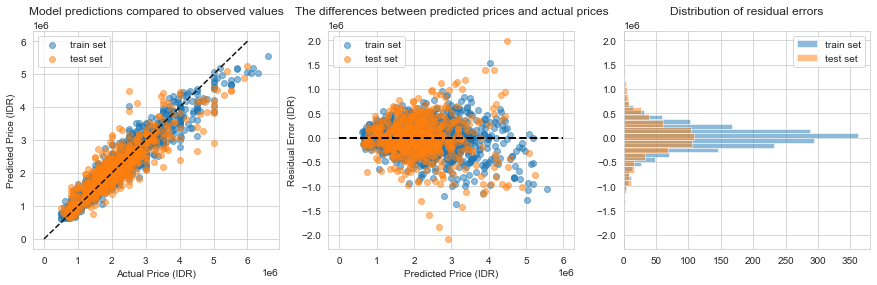

Wall time: 2.13 s


R^2 R^2 5-CV train and validate        RMSE  \
LGBM_no_outliers train  0.909               0.919 ± 0.002  266886.035   
                 test   0.799               0.721 ± 0.017  410300.806   

                               MAE  
LGBM_no_outliers train  195860.855  
                 test   293284.135

In [93]:
%%time
#### LGBM_no_outliers ####

# set up the features to be included in preprocessing pipeline
pl_features_LGBM_no_outliers = get_feature_pipeline(numerical = [col for col in num_cols if col not in ['harga_kost_per_bulan', 'latitude', 'longitude']], 
                                                    nominal = nom_cols, 
                                                    ordinal = ord_cols, 
                                                    binary = [col for col in bin_cols if col not in uncommon_cols], 
                                                    algorithm = 'tree-based', 
                                                    ordinal_category = [['0 bed', '1 bed', '2 bed'],
                                                                        ['single bed', 'long bed', 'double bed', '≥queen bed']])

# create workflow pipeline
LGBM_no_outliers = Pipeline([('preprocess the features', pl_features_LGBM_no_outliers),
                             ('LightGBM', LGBMRegressor(n_jobs = -1))])

# fit the model
LGBM_no_outliers.fit(X_train, y_train)

# evaluate the model
df_LGBM_no_outliers = model_eval(LGBM_no_outliers, 
                                 'LGBM_no_outliers', plot = True)
df_LGBM_no_outliers

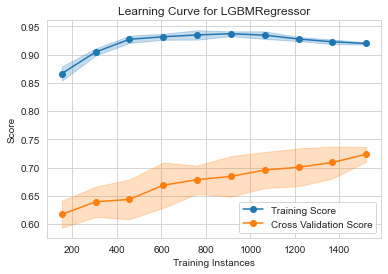

In [94]:
# plot the learning curve of 'LGBM_no_outliers' model
visualizer = LearningCurve(LGBM_no_outliers, scoring = 'r2', cv = 5, n_jobs = -1, 
                           train_sizes = np.linspace(0.1, 1.0, 10))
visualizer.fit(X_train, y_train)
visualizer.show()
plt.show()

### Hyperparameter tuning

After doing hyperparameter tuning, we have already reduced the overfitting isue while the model performance is better than the one without hyperparameter tuning.

In [95]:
%%time
# get the feature names in the trained 'LGBM_no_outliers' model
features = get_feature_names(feature_union_object = LGBM_no_outliers[0], 
                             numerical = [col for col in num_cols if col not in ['harga_kost_per_bulan', 'latitude', 'longitude']], 
                             ordinal = ord_cols, 
                             binary = [col for col in bin_cols if col not in uncommon_cols])

# get the preprocessed X_train data
X_train_preprocessed = pd.DataFrame(LGBM_no_outliers[0].transform(X_train).toarray(), columns = features)

# hyperparameter tuning with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'boosting_type': ['gbdt', 'goss', 'dart'],
    'learning_rate': list(np.logspace(np.log10(0.005), np.log10(0.5), base = 10, num = 50)),
    'max_depth': list(np.arange(1, 15, 1)),
    'reg_alpha': list(np.linspace(0, 1, 15)),
    'reg_lambda': list(np.linspace(0, 1, 15)),
    'colsample_bytree': list(np.linspace(0.5, 1, 15)),
    'subsample': list(np.linspace(0.5, 1, 15)),
    'n_estimators': list(np.arange(100, 751, 50))}

model = LGBMRegressor(n_jobs = -1, random_state = 42)

model_random_search = RandomizedSearchCV(model, param_grid, scoring = 'r2', cv = 5, n_iter = 500, 
                                         n_jobs = -1, random_state = 42, verbose = 1)

model_random_search.fit(X_train_preprocessed, y_train)
print('done')

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
done
Wall time: 6min 20s


============================== model evaluation of "LGBM_no_outliers_tuned" ==============================


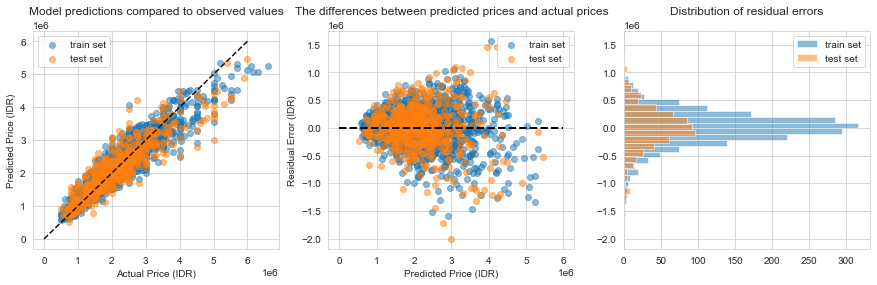

Wall time: 4.23 s


R^2 R^2 5-CV train and validate        RMSE  \
LGBM_no_outliers_tuned train  0.875               0.877 ± 0.004  313225.327   
                       test   0.808               0.737 ± 0.019  400564.657   

                                     MAE  
LGBM_no_outliers_tuned train  229755.225  
                       test   288193.634

In [96]:
%%time
#### LGBM_no_outliers_tuned ####

# set up the features to be included in preprocessing pipeline
pl_features_LGBM_no_outliers_tuned = get_feature_pipeline(numerical = [col for col in num_cols if col not in ['harga_kost_per_bulan', 'latitude', 'longitude']], 
                                                          nominal = nom_cols, 
                                                          ordinal = ord_cols, 
                                                          binary = [col for col in bin_cols if col not in uncommon_cols], 
                                                          algorithm = 'tree-based', 
                                                          ordinal_category = [['0 bed', '1 bed', '2 bed'],
                                                                              ['single bed', 'long bed', 'double bed', '≥queen bed']])

# create workflow pipeline
LGBM_no_outliers_tuned = Pipeline([('preprocess the features', pl_features_LGBM_no_outliers_tuned),
                                   ('LightGBM', model_random_search.best_estimator_)])

# fit the model
LGBM_no_outliers_tuned.fit(X_train, y_train)

# evaluate the model
df_LGBM_no_outliers_tuned = model_eval(LGBM_no_outliers_tuned, 
                                       'LGBM_no_outliers_tuned', plot = True)
df_LGBM_no_outliers_tuned

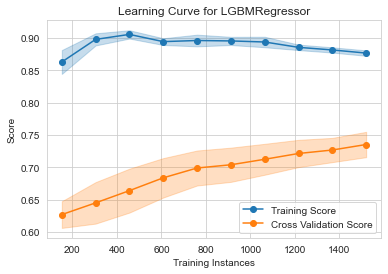

In [97]:
# plot the learning curve of 'LGBM_no_outliers_tuned' model
visualizer = LearningCurve(LGBM_no_outliers_tuned, scoring = 'r2', cv = 5, n_jobs = -1, 
                           train_sizes = np.linspace(0.1, 1.0, 10))
visualizer.fit(X_train, y_train)
visualizer.show()
plt.show()

### Summary of LightGBM

In [98]:
# summary of LightGBM models
LGBM_model = pd.concat([df_LGBM_no_outliers, df_LGBM_no_outliers_tuned], axis = 0)
LGBM_model

R^2 R^2 5-CV train and validate        RMSE  \
LGBM_no_outliers       train  0.909               0.919 ± 0.002  266886.035   
                       test   0.799               0.721 ± 0.017  410300.806   
LGBM_no_outliers_tuned train  0.875               0.877 ± 0.004  313225.327   
                       test   0.808               0.737 ± 0.019  400564.657   

                                     MAE  
LGBM_no_outliers       train  195860.855  
                       test   293284.135  
LGBM_no_outliers_tuned train  229755.225  
                       test   288193.634

## VotingRegressor

In this part, I wonder what would happen if we take several our best models (tuned models) then calculate the average of those output predictions. Let's see what happen!

For this section we can implement `VotingRegressor` from `sklearn` to make the average of output predictions from several models. We will create four `VotingRegressor` models, that are:
1. Averaging output predictions using Linear Regression (`LinReg_no_outliers`) and Random Forest (`RF_no_outliers_tuned`).
2. Averaging output predictions using Linear Regression (`LinReg_no_outliers`) and LightGBM (`LGBM_no_outliers_tuned`).
3. Averaging output predictions using Random Forest (`RF_no_outliers_tuned`) and LightGBM (`LGBM_no_outliers_tuned`).
4. Averaging output predictions using Linear Regression (`LinReg_no_outliers`), Random Forest (`RF_no_outliers_tuned`), and LightGBM (`LGBM_no_outliers_tuned`).

In [99]:
from sklearn.ensemble import VotingRegressor

In [100]:
# set up the features to be included in preprocessing pipeline
pl_features_tree = get_feature_pipeline(numerical = [col for col in num_cols if col not in ['harga_kost_per_bulan', 'latitude', 'longitude']], 
                                        nominal = nom_cols, 
                                        ordinal = ord_cols, 
                                        binary = [col for col in bin_cols if col not in uncommon_cols], 
                                        algorithm = 'tree-based', 
                                        ordinal_category = [['0 bed', '1 bed', '2 bed'],
                                                            ['single bed', 'long bed', 'double bed', '≥queen bed']])

pl_features_non_tree = get_feature_pipeline(numerical = [col for col in num_cols if col not in ['harga_kost_per_bulan', 'latitude', 'longitude']], 
                                            nominal = nom_cols, 
                                            ordinal = ord_cols, 
                                            binary = [col for col in bin_cols if col not in uncommon_cols], 
                                            algorithm = 'non-tree-based', 
                                            ordinal_category = [['0 bed', '1 bed', '2 bed'],
                                                                ['single bed', 'long bed', 'double bed', '≥queen bed']])

In [101]:
# Linear Regression
LinReg = Pipeline([('preprocess the features', pl_features_non_tree),
                   ('Linear Regression', LinearRegression(n_jobs = -1))])

# tuned Random Forest
RF_params = RF_no_outliers_tuned[1].get_params()
RF_tuned = Pipeline([('preprocess the features', pl_features_tree),
                     ('Random Forest', RandomForestRegressor(**RF_params))])

# tuned LightGBM
LGBM_params = LGBM_no_outliers_tuned[1].get_params()
LGBM_tuned = Pipeline([('preprocess the features', pl_features_tree),
                       ('LightGBM', LGBMRegressor(**LGBM_params))])

### Averaging output predictions using Linear Regression and Random Forest

============================== model evaluation of "voting_LinReg_RF" ==============================


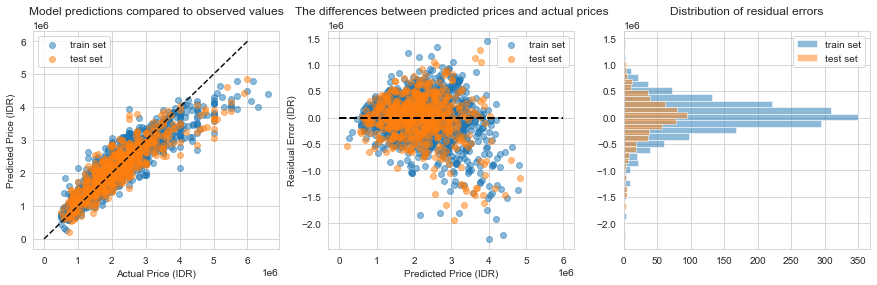

Wall time: 9.26 s


R^2 R^2 5-CV train and validate        RMSE  \
voting_LinReg_RF train  0.827               0.827 ± 0.005  368213.674   
                 test   0.786               0.726 ± 0.026  423226.177   

                               MAE  
voting_LinReg_RF train  259913.945  
                 test   301633.448

In [102]:
%%time
# create workflow pipeline
voting_LinReg_RF = VotingRegressor(estimators = [('Linear Regression', LinReg), 
                                                 ('Random Forest', RF_tuned)], n_jobs = -1)

# fit the model
voting_LinReg_RF.fit(X_train, y_train)

# evaluate the model
df_voting_LinReg_RF = model_eval(voting_LinReg_RF, 
                                 'voting_LinReg_RF', plot = True)
df_voting_LinReg_RF

### Averaging output predictions using Linear Regression and LightGBM

============================== model evaluation of "voting_LinReg_LGBM" ==============================


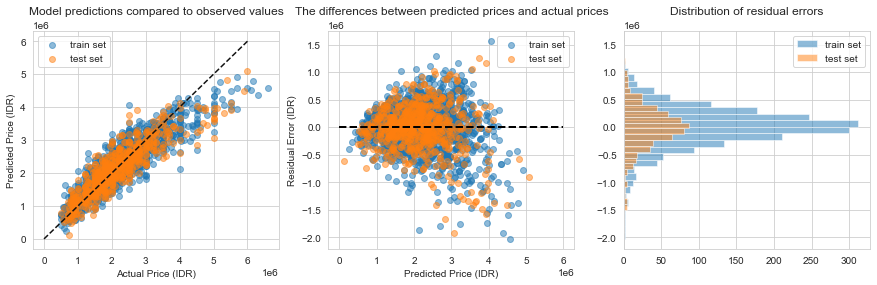

Wall time: 3.17 s


R^2 R^2 5-CV train and validate        RMSE  \
voting_LinReg_LGBM train  0.814               0.815 ± 0.005  381997.624   
                   test   0.789                0.73 ± 0.023  420720.869   

                                 MAE  
voting_LinReg_LGBM train  277215.355  
                   test   303533.020

In [103]:
%%time
# create workflow pipeline
voting_LinReg_LGBM = VotingRegressor(estimators = [('Linear Regression', LinReg), 
                                                   ('LightGBM', LGBM_tuned)], n_jobs = -1)

# fit the model
voting_LinReg_LGBM.fit(X_train, y_train)

# evaluate the model
df_voting_LinReg_LGBM = model_eval(voting_LinReg_LGBM, 
                                   'voting_LinReg_LGBM', plot = True)
df_voting_LinReg_LGBM

### Averaging output predictions using Random Forest and LightGBM

============================== model evaluation of "voting_RF_LGBM" ==============================


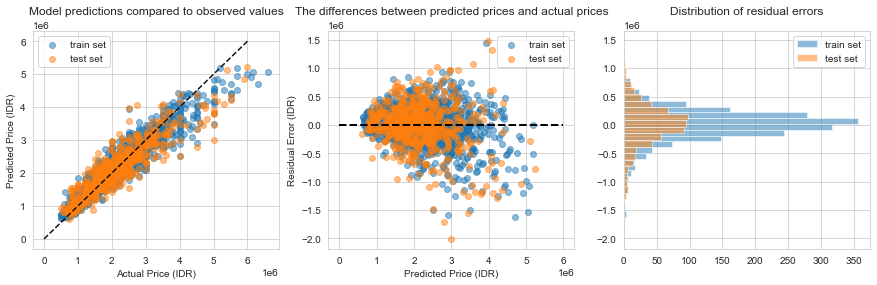

Wall time: 9.54 s


R^2 R^2 5-CV train and validate        RMSE  \
voting_RF_LGBM train  0.891               0.891 ± 0.003  292802.505   
               test   0.809               0.738 ± 0.021  400162.746   

                             MAE  
voting_RF_LGBM train  209011.642  
               test   287224.944

In [104]:
%%time
# create workflow pipeline
voting_RF_LGBM = VotingRegressor(estimators = [('Random Forest', RF_tuned), 
                                               ('LightGBM', LGBM_tuned)], n_jobs = -1)

# fit the model
voting_RF_LGBM.fit(X_train, y_train)

# evaluate the model
df_voting_RF_LGBM = model_eval(voting_RF_LGBM, 
                               'voting_RF_LGBM', plot = True)
df_voting_RF_LGBM

### Averaging output predictions using Linear Regression, Random Forest, and LightGBM

============================== model evaluation of "voting_LinReg_RF_LGBM" ==============================


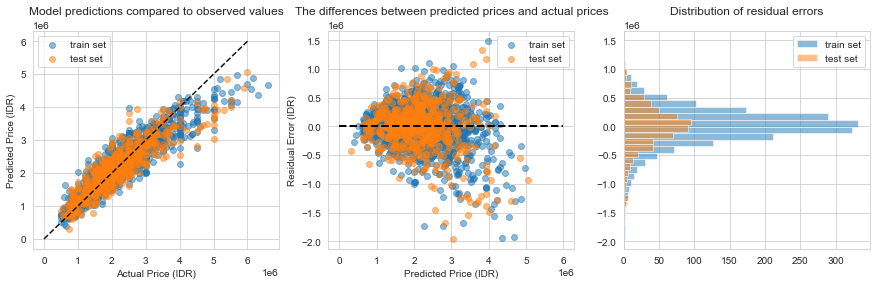

Wall time: 10 s


R^2 R^2 5-CV train and validate        RMSE  \
voting_LinReg_RF_LGBM train  0.850                0.85 ± 0.004  343385.161   
                      test   0.799               0.736 ± 0.023  409917.500   

                                    MAE  
voting_LinReg_RF_LGBM train  244626.403  
                      test   293103.790

In [105]:
%%time
# create workflow pipeline
voting_LinReg_RF_LGBM = VotingRegressor(estimators = [('Linear Regression', LinReg),
                                                      ('Random Forest', RF_tuned), 
                                                      ('LightGBM', LGBM_tuned)], n_jobs = -1)

# fit the model
voting_LinReg_RF_LGBM.fit(X_train, y_train)

# evaluate the model
df_voting_LinReg_RF_LGBM = model_eval(voting_LinReg_RF_LGBM, 
                                      'voting_LinReg_RF_LGBM', plot = True)
df_voting_LinReg_RF_LGBM

### Summary of VotingRegressor

In [106]:
# summary of VotingRegressor model
VotingRegressor_model = pd.concat([df_voting_LinReg_RF, 
                                   df_voting_LinReg_LGBM, 
                                   df_voting_RF_LGBM,
                                   df_voting_LinReg_RF_LGBM], axis = 0)
VotingRegressor_model

R^2 R^2 5-CV train and validate        RMSE  \
voting_LinReg_RF      train  0.827               0.827 ± 0.005  368213.674   
                      test   0.786               0.726 ± 0.026  423226.177   
voting_LinReg_LGBM    train  0.814               0.815 ± 0.005  381997.624   
                      test   0.789                0.73 ± 0.023  420720.869   
voting_RF_LGBM        train  0.891               0.891 ± 0.003  292802.505   
                      test   0.809               0.738 ± 0.021  400162.746   
voting_LinReg_RF_LGBM train  0.850                0.85 ± 0.004  343385.161   
                      test   0.799               0.736 ± 0.023  409917.500   

                                    MAE  
voting_LinReg_RF      train  259913.945  
                      test   301633.448  
voting_LinReg_LGBM    train  277215.355  
                      test   303533.020  
voting_RF_LGBM        train  209011.642  
                      test   287224.944  
voting_LinReg_RF_LGBM train  244626.403  
                      test   293103.790

## StackingRegressor

In this part I wonder what would gonna be if we use stacking method. Some articles said that model stacking could generalizes better than a single model meaning that reduce overfitting.

Stacking regression is an ensemble learning technique to combine multiple regression models via a meta-regressor. The individual regression models are trained based on the complete training set, then the meta-regressor is fitted based on the outputs, i.e. meta-features, of the individual regression models in the ensemble. You can read this [blog](https://developer.ibm.com/articles/stack-machine-learning-models-get-better-results/) for comprehensive explanation or a brief [overview](http://rasbt.github.io/mlxtend/user_guide/regressor/StackingRegressor/) from mlxtend library.

We will use tuned Random Forest and tuned LightGBM as the first layer of the stack then Linear Regression as the meta-regressor in the second layer.

In [107]:
from mlxtend.regressor import StackingCVRegressor

============================== model evaluation of "stacking_meta_LinReg" ==============================


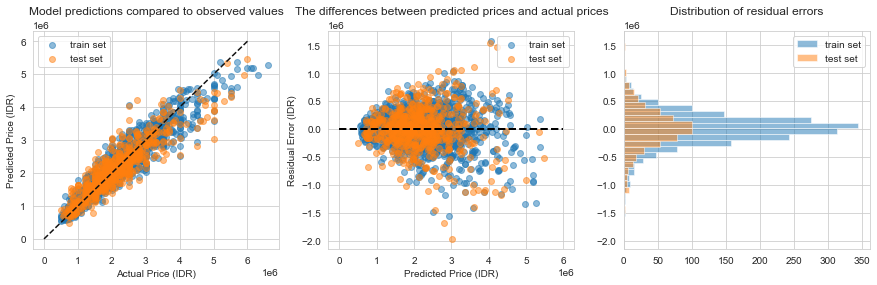

Wall time: 51.5 s


R^2 R^2 5-CV train and validate        RMSE  \
stacking_meta_LinReg train  0.888               0.893 ± 0.002  296050.562   
                     test   0.814                0.74 ± 0.021  395154.953   

                                   MAE  
stacking_meta_LinReg train  214922.214  
                     test   284512.581

In [108]:
%%time
# create stacking regressor
stack = StackingCVRegressor(regressors = (RandomForestRegressor(**RF_params), LGBMRegressor(**LGBM_params)),
                            meta_regressor = LinearRegression(n_jobs = -1), 
                            cv = 5,
                            use_features_in_secondary = True,
                            random_state = 42)
# create workflow pipeline
stacking_meta_LinReg = Pipeline([('preprocess the features', pl_features_non_tree),
                                  ('stack', stack)])

# fit the model
stacking_meta_LinReg.fit(X_train, y_train)

# evaluate the model
df_stacking_meta_LinReg = model_eval(stacking_meta_LinReg, 
                                     'stacking_meta_LinReg', plot = True)
df_stacking_meta_LinReg

## Bayesian Optimization

### Prepare the function to perform Bayesian Optimization

In [109]:
import lightgbm as lgb

In [110]:
# set up the features to be included in preprocessing pipeline
pl_features_tree = get_feature_pipeline(numerical = [col for col in num_cols if col not in ['harga_kost_per_bulan', 'latitude', 'longitude']], 
                                        nominal = nom_cols, 
                                        ordinal = ord_cols, 
                                        binary = [col for col in bin_cols if col not in uncommon_cols], 
                                        algorithm = 'tree-based', 
                                        ordinal_category = [['0 bed', '1 bed', '2 bed'],
                                                            ['single bed', 'long bed', 'double bed', '≥queen bed']])

X = df_common.drop('harga_kost_per_bulan', axis = 1)
y = df_common[['harga_kost_per_bulan']]

X_data = pd.DataFrame(pl_features_tree.fit_transform(X).toarray(), columns = features)
y_data = y

params = {'verbose': -1}

# training set
train_set = lgb.Dataset(X_data, label = y_data, params = params)

In [111]:
import csv
from hyperopt import STATUS_OK
from timeit import default_timer as timer

def objective(hyperparameters):
    """Objective function for Gradient Boosting Machine Hyperparameter Optimization.
       Writes a new line to `outfile` on every iteration"""
    
    # Keep track of evals
    global ITERATION
    ITERATION += 1
    
    # Using early stopping to find number of trees trained
    if 'n_estimators' in hyperparameters:
        del hyperparameters['n_estimators']
    
    # Make sure parameters that need to be integers are integers
    for parameter_name in ['num_leaves', 'max_depth']:
        hyperparameters[parameter_name] = int(hyperparameters[parameter_name])
        
    # Remove verbose in training process
    hyperparameters['verbose'] = -1
    
    # Perform n_folds cross validation
    start = timer()
    cv_results = lgb.cv(hyperparameters, train_set, num_boost_round = 5000, nfold = N_FOLDS, 
                        early_stopping_rounds = 50, metrics = 'rmse', seed = 420, verbose_eval = False,
                        stratified = False)
    run_time = timer() - start
    
    # Remove 'verbose' in hyperparameters dict
    hyperparameters.pop('verbose')
    
    # Extract the best score
    best_score = cv_results['rmse-mean'][-1]
    
    # Loss must be minimized
    loss = best_score
    
    # Boosting rounds that returned the highest cv score
    n_estimators = len(cv_results['rmse-mean'])
    hyperparameters['n_estimators'] = n_estimators

    # Write to the csv file ('a' means append)
    of_connection = open(OUT_FILE, 'a')
    writer = csv.writer(of_connection)
    writer.writerow([loss, hyperparameters, ITERATION, run_time, best_score])
    of_connection.close()
#     print('ITERATION: {0} ---> time: {1}'.format(ITERATION, run_time))

    return loss

In [112]:
from hyperopt import hp
from hyperopt.pyll.stochastic import sample

# Define the search space
space = {
    'boosting_type': hp.choice('boosting_type', ['gbdt', 'dart']),
    'subsample': hp.uniform('subsample', 0.3, 1.0),
    'num_leaves': hp.quniform('num_leaves', 20, 150, 1),
    'max_depth': hp.quniform('max_depth', 1, 10, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.05), np.log(0.5)),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.3, 1.0)
}

In [113]:
from hyperopt import fmin, Trials, tpe

# Create a file and open a connection
OUT_FILE = 'dataset/Bayesian Optimization (LightGBM).csv'
of_connection = open(OUT_FILE, 'w')
writer = csv.writer(of_connection)

ITERATION = 0

# Write column names
headers = ['loss', 'hyperparameters', 'iteration', 'runtime', 'score']
writer.writerow(headers)
of_connection.close()

# Record results
trials = Trials()

In [114]:
# Run bayesian optimization
MAX_EVALS = 150
N_FOLDS = 5

global ITERATION

ITERATION = 0

best = fmin(fn = objective, space = space, algo = tpe.suggest,
            trials = trials, max_evals = MAX_EVALS)

100%|█████████████████████████████████████████████| 150/150 [1:54:17<00:00, 45.72s/trial, best loss: 419629.9985712931]


### Train the model using best hyperparams

In [115]:
X = df_common.drop('harga_kost_per_bulan', axis = 1)
y = df_common[['harga_kost_per_bulan']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = df_common['kota'])
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1901, 71) (634, 71)
(1901, 1) (634, 1)


In [116]:
bayesian_results = pd.read_csv('dataset/Bayesian Optimization (LightGBM).csv').sort_values(by = 'loss')
bayesian_results.head()

loss                                    hyperparameters  \
147  419629.998571  {'boosting_type': 'gbdt', 'colsample_bytree': ...   
81   419710.349506  {'boosting_type': 'gbdt', 'colsample_bytree': ...   
98   420695.657286  {'boosting_type': 'gbdt', 'colsample_bytree': ...   
130  420815.523897  {'boosting_type': 'gbdt', 'colsample_bytree': ...   
47   420844.767470  {'boosting_type': 'gbdt', 'colsample_bytree': ...   

     iteration   runtime          score  
147        148  3.597719  419629.998571  
81          82  2.813352  419710.349506  
98          99  2.935022  420695.657286  
130        131  1.979109  420815.523897  
47          48  4.206148  420844.767470

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.4891603028706284,
 'learning_rate': 0.05735933929469523,
 'max_depth': 5,
 'num_leaves': 101,
 'reg_alpha': 0.5310190142416866,
 'reg_lambda': 0.6506541926186737,
 'subsample': 0.6015954338669168,
 'n_estimators': 543}

============================== model evaluation of "LGBM_bayesian_opt" ==============================


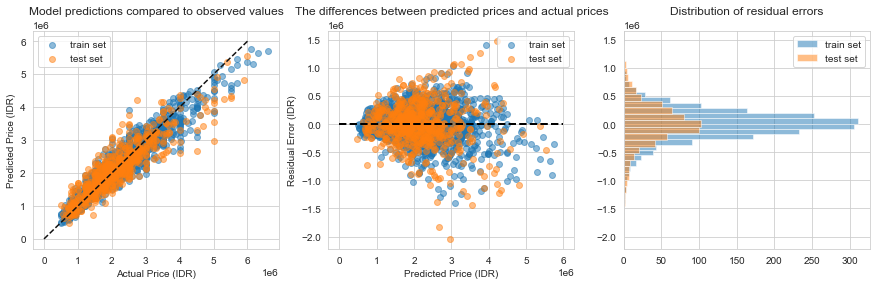

R^2 R^2 5-CV train and validate        RMSE  \
LGBM_bayesian_opt train  0.901                0.91 ± 0.003  278690.642   
                  test   0.808               0.736 ± 0.015  400814.739   

                                MAE  
LGBM_bayesian_opt train  205158.311  
                  test   288133.543

In [117]:
import ast
# best hyperparameters
hyperparameters = ast.literal_eval(bayesian_results.head(1).hyperparameters.tolist()[0])
display(hyperparameters)

# create workflow pipeline
LGBM_bayesian_opt = Pipeline([('preprocess the features', pl_features_tree),
                              ('LightGBM', LGBMRegressor(**hyperparameters))])
# fit the model
LGBM_bayesian_opt.fit(X_train, y_train)

# evaluate the model
df_LGBM_bayesian_opt = model_eval(LGBM_bayesian_opt, 
                                  'LGBM_bayesian_opt', plot = True)
df_LGBM_bayesian_opt

# Model evaluation

We have trained so many models and here are to sum up what we have done at this point:
1. We have trained several Linear Regression models as the baseline model and have founded the one performing the best that is `LinReg_no_outliers`. `LinReg_no_outliers` are trained using most common facilities (features) and then all the records (rows) having uncommon facilities (such as gym, kolam renang, bathub, etc) have been removed since these records are considered as outliers.
2. We have trained two different machine learning algorithm, i.e. Random Forest and LightGBM, using the same features as we use for `LinReg_no_outliers`. We have also done the hyperparameter tuning process for both models. The models improve so well as what we expect after hyperparameter tuning process and our best model is tuned LGBM (`LGBM_no_outliers_tuned`).
3. We have tried to use averaging regression algorithm by taking the average value of the output predictions from a combination of several different models (Linear Regression, tuned Random Forest, and tuned LightGBM). Unfortunately, the best model still belongs to `LGBM_no_outliers_tuned`. Actually `voting_RF_LGBM` model does have slightly lower RMSE and MAE compared to `LGBM_no_outliers_tuned` model, yet that model is too overfitting the train set.
4. We have tried to use stacking method and the model performance is slighly better than tuned LightGBM model (`LGBM_no_outliers_tuned`). We have improved our model just by using stacking method! The gap between `LGBM_no_outliers_tuned` and `stacking_meta_LinReg` is relatively small (The difference on R-squared is only 0.006, around 5409 IDR on the RMSE, and around 3681 IDR on the MAE) because of that I decide to use a single LightGBM model since this single model is relatively easier to be interpreted later. Essentially, the more complex the model is, the harder the model to be interpreted later.
5. We have tried to perform hyperparameter tuning once more for LightGBM algorithm using Bayesian Optimization method. I turns out that this model overfit the train set.

In [118]:
# summary of LightGBM models
LGBM_model = pd.concat([df_LGBM_no_outliers, df_LGBM_no_outliers_tuned], axis = 0)
LGBM_model

R^2 R^2 5-CV train and validate        RMSE  \
LGBM_no_outliers       train  0.909               0.919 ± 0.002  266886.035   
                       test   0.799               0.721 ± 0.017  410300.806   
LGBM_no_outliers_tuned train  0.875               0.877 ± 0.004  313225.327   
                       test   0.808               0.737 ± 0.019  400564.657   

                                     MAE  
LGBM_no_outliers       train  195860.855  
                       test   293284.135  
LGBM_no_outliers_tuned train  229755.225  
                       test   288193.634

In [119]:
model_performance = pd.concat([df_LinReg_no_outliers,
                               RF_model,
                               LGBM_model,
                               VotingRegressor_model,
                               df_stacking_meta_LinReg,
                               df_LGBM_bayesian_opt], axis = 0)
model_performance

R^2 R^2 5-CV train and validate        RMSE  \
LinReg_no_outliers     train  0.708                0.71 ± 0.007  478510.957   
                       test   0.733                0.689 ± 0.03  472501.726   
RF_no_outliers         train  0.961                0.96 ± 0.002  174370.078   
                       test   0.786               0.718 ± 0.029  423286.167   
RF_no_outliers_tuned   train  0.897               0.896 ± 0.003  283978.946   
                       test   0.798               0.725 ± 0.023  411127.168   
LGBM_no_outliers       train  0.909               0.919 ± 0.002  266886.035   
                       test   0.799               0.721 ± 0.017  410300.806   
LGBM_no_outliers_tuned train  0.875               0.877 ± 0.004  313225.327   
                       test   0.808               0.737 ± 0.019  400564.657   
voting_LinReg_RF       train  0.827               0.827 ± 0.005  368213.674   
                       test   0.786               0.726 ± 0.026  423226.177   
voting_LinReg_LGBM     train  0.814               0.815 ± 0.005  381997.624   
                       test   0.789                0.73 ± 0.023  420720.869   
voting_RF_LGBM         train  0.891               0.891 ± 0.003  292802.505   
                       test   0.809               0.738 ± 0.021  400162.746   
voting_LinReg_RF_LGBM  train  0.850                0.85 ± 0.004  343385.161   
                       test   0.799               0.736 ± 0.023  409917.500   
stacking_meta_LinReg   train  0.888               0.893 ± 0.002  296050.562   
                       test   0.814                0.74 ± 0.021  395154.953   
LGBM_bayesian_opt      train  0.901                0.91 ± 0.003  278690.642   
                       test   0.808               0.736 ± 0.015  400814.739   

                                     MAE  
LinReg_no_outliers     train  349957.506  
                       test   346066.491  
RF_no_outliers         train  121860.032  
                       test   297649.845  
RF_no_outliers_tuned   train  195563.772  
                       test   292612.168  
LGBM_no_outliers       train  195860.855  
                       test   293284.135  
LGBM_no_outliers_tuned train  229755.225  
                       test   288193.634  
voting_LinReg_RF       train  259913.945  
                       test   301633.448  
voting_LinReg_LGBM     train  277215.355  
                       test   303533.020  
voting_RF_LGBM         train  209011.642  
                       test   287224.944  
voting_LinReg_RF_LGBM  train  244626.403  
                       test   293103.790  
stacking_meta_LinReg   train  214922.214  
                       test   284512.581  
LGBM_bayesian_opt      train  205158.311  
                       test   288133.543

In [120]:
# best model so far
best_model = model_performance.loc[(['LGBM_bayesian_opt', 'LGBM_no_outliers_tuned', 'stacking_meta_LinReg', 'voting_RF_LGBM'])]
best_model.to_csv('dataset/summary_model_eval.csv')
best_model

R^2 R^2 5-CV train and validate        RMSE  \
LGBM_bayesian_opt      train  0.901                0.91 ± 0.003  278690.642   
                       test   0.808               0.736 ± 0.015  400814.739   
LGBM_no_outliers_tuned train  0.875               0.877 ± 0.004  313225.327   
                       test   0.808               0.737 ± 0.019  400564.657   
stacking_meta_LinReg   train  0.888               0.893 ± 0.002  296050.562   
                       test   0.814                0.74 ± 0.021  395154.953   
voting_RF_LGBM         train  0.891               0.891 ± 0.003  292802.505   
                       test   0.809               0.738 ± 0.021  400162.746   

                                     MAE  
LGBM_bayesian_opt      train  205158.311  
                       test   288133.543  
LGBM_no_outliers_tuned train  229755.225  
                       test   288193.634  
stacking_meta_LinReg   train  214922.214  
                       test   284512.581  
voting_RF_LGBM         train  209011.642  
                       test   287224.944

Below I try to train the best models that we have gotten so far (`LGBM_bayesian_opt`, `LGBM_no_outliers_tuned`, `voting_RF_LGBM`, and `stacking_meta_LinReg`) 50 times with different subset of train and test sets. Then evaluate the model performance on the test set and save the metrics (R-squared, RMSE, MAE) for each iteration.

In [121]:
from tqdm import tqdm
from random import randint
X = df_common.drop('harga_kost_per_bulan', axis = 1)
y = df_common[['harga_kost_per_bulan']]

LGBM_bayes_list = []
LGBM_list = []
RF_LGBM_list = []
stacking_list = []

for i in tqdm(range(50)):    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                        random_state = randint(0, 100000), 
                                                        stratify = df_common['kota'])
    pl_features = get_feature_pipeline(numerical = [col for col in num_cols if col not in ['harga_kost_per_bulan', 'latitude', 'longitude']], 
                                                    nominal = nom_cols, 
                                                    ordinal = ord_cols, 
                                                    binary = [col for col in bin_cols if col not in uncommon_cols], 
                                                    algorithm = 'non-tree-based', 
                                                    ordinal_category = [['0 bed', '1 bed', '2 bed'],
                                                                        ['single bed', 'long bed', 'double bed', '≥queen bed']])
    X_train_preprocessed = pl_features.fit_transform(X_train)
    X_test_preprocessed = pl_features.transform(X_test)
    
    # LGBM_bayes_list (Bayesian Optimization)
    LGBM_bayes = LGBMRegressor(**hyperparameters)
    LGBM_bayes.fit(X_train_preprocessed, y_train)
    LGBM_bayes_y_pred_test = LGBM_bayes.predict(X_test_preprocessed) 
    LGBM_bayes_dict = {'R^2 test':metrics.r2_score(y_test, LGBM_bayes_y_pred_test).round(3),
                       'RMSE test':metrics.mean_squared_error(y_test, LGBM_bayes_y_pred_test, squared = False).round(3),
                       'MAE test':metrics.mean_absolute_error(y_test, LGBM_bayes_y_pred_test).round(3)}
    LGBM_bayes_list.append(LGBM_bayes_dict)
    
    # LGBM_list (Random Search)
    LGBM = LGBMRegressor(**LGBM_params)
    LGBM.fit(X_train_preprocessed, y_train)
    LGBM_y_pred_test = LGBM.predict(X_test_preprocessed) 
    LGBM_dict = {'R^2 test':metrics.r2_score(y_test, LGBM_y_pred_test).round(3),
                 'RMSE test':metrics.mean_squared_error(y_test, LGBM_y_pred_test, squared = False).round(3),
                 'MAE test':metrics.mean_absolute_error(y_test, LGBM_y_pred_test).round(3)}
    LGBM_list.append(LGBM_dict)
    
    # RF_LGBM_list (Voting model)    
    RF_LGBM = VotingRegressor(estimators = [('Random Forest', RandomForestRegressor(**RF_params)),
                                            ('LightGBM', LGBMRegressor(**LGBM_params))], n_jobs = -1)
    RF_LGBM.fit(X_train_preprocessed, y_train)
    RF_LGBM_y_pred_test = RF_LGBM.predict(X_test_preprocessed)
    RF_LGBM_dict = {'R^2 test':metrics.r2_score(y_test, RF_LGBM_y_pred_test).round(3),
                    'RMSE test':metrics.mean_squared_error(y_test, RF_LGBM_y_pred_test, squared = False).round(3),
                    'MAE test':metrics.mean_absolute_error(y_test, RF_LGBM_y_pred_test).round(3)}
    RF_LGBM_list.append(RF_LGBM_dict)
    
    # stacking_list (Stacking model)    
    stacking = StackingCVRegressor(regressors = (RandomForestRegressor(**RF_params), LGBMRegressor(**LGBM_params)),
                                   meta_regressor = LinearRegression(n_jobs = -1), 
                                   cv = 5,
                                   use_features_in_secondary = True,
                                   random_state = 42)
    stacking.fit(X_train_preprocessed, y_train)
    stacking_y_pred_test = stacking.predict(X_test_preprocessed)
    stacking_dict = {'R^2 test':metrics.r2_score(y_test, stacking_y_pred_test).round(3),
                       'RMSE test':metrics.mean_squared_error(y_test, stacking_y_pred_test, squared = False).round(3),
                       'MAE test':metrics.mean_absolute_error(y_test, stacking_y_pred_test).round(3)}
    stacking_list.append(stacking_dict)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [11:33<00:00, 13.87s/it]


In [122]:
# model performance trained using different subset of train and test sets 50 times
pd.concat([pd.DataFrame(LGBM_bayes_list).mean().to_frame().rename({0:'LGBM_bayesian_opt'}, axis = 1).T,
           pd.DataFrame(LGBM_list).mean().to_frame().rename({0:'LGBM_no_outliers_tuned'}, axis = 1).T,
           pd.DataFrame(RF_LGBM_list).mean().to_frame().rename({0:'voting_RF_LGBM'}, axis = 1).T,
           pd.DataFrame(stacking_list).mean().to_frame().rename({0:'stacking_meta_LinReg'}, axis = 1).T]
          , axis = 0).sort_values('R^2 test', ascending = False)

R^2 test     RMSE test      MAE test
LGBM_bayesian_opt        0.77454  425613.26106  304764.92178
stacking_meta_LinReg     0.77186  428057.17092  304637.38094
LGBM_no_outliers_tuned   0.77058  429338.77390  307067.34570
voting_RF_LGBM           0.76984  429988.89798  304540.57042

From the results below we have some takeaways: 
- The best performing model is tuned LGBM using Bayes Opt (`LGBM_bayesian_opt`), then followed by stacking model (`stacking_meta_LinReg`), tuned LGBM using random search (`LGBM_no_outliers_tuned`), voting using Random Forest and LGBM (`voting_RF_LGBM`).
- It turns out that stacking is the the second highest model performance but the difference of model performance between `stacking_meta_LinReg` and `LGBM_no_outliers_tuned` is so small (the improvement gain is not that much). Since we want to know the interpretation of the model and later we also want to know the prediction interval, we better use a single model instead (`LGBM_no_outliers_tuned`). Unless we only concern about the ouput prediction without knowing how the model makes the prediction, we can just go straight to use stacking model as this method yields better performance.
- Having hyperparameter tuning using Bayesian Optimization yields better performance but since we don't have enough samples to train, it tends to overfit. Therefore using these results, I will decide that LGBM tuned using random search (`LGBM_no_outliers_tuned`) as our final model for this project.

# Prediction interval

Our final task now is to create prediction interval. The reason of creating prediction interval is that we can never be 100 percent certain about one prediction from one model. Instead, the idea is to give an interval back to a person who ends up controlling the final decision based on the range that is given by the model.

For example, if you are trying to set the price for a house, it's common knowledge that the price depends on how well-maintained and renovated the house is. Therefore, you want to give a range. If the house is poorly maintained, perhaps the price would land in the lower end of the price interval, and if it's well-maintained, the price might be at the upper end.

So instead of just having a single price, we can know the 'price range' and the end users will determine by themself which price is desired. We will try to create 95% prediction interval and 99% prediction interval.

In [123]:
# set up the features to be included in preprocessing pipeline
pl_features_tree = get_feature_pipeline(numerical = [col for col in num_cols if col not in ['harga_kost_per_bulan', 'latitude', 'longitude']], 
                                        nominal = nom_cols, 
                                        ordinal = ord_cols, 
                                        binary = [col for col in bin_cols if col not in uncommon_cols], 
                                        algorithm = 'tree-based', 
                                        ordinal_category = [['0 bed', '1 bed', '2 bed'],
                                                            ['single bed', 'long bed', 'double bed', '≥queen bed']])

X = df_common.drop('harga_kost_per_bulan', axis = 1)
y = df_common[['harga_kost_per_bulan']]

X_data = pd.DataFrame(pl_features_tree.fit_transform(X).toarray(), columns = features)
y_data = y
print(X_data.shape, y_data.shape)

(2535, 48) (2535, 1)


In [124]:
# get the hyperparameters for LGBM
LGBM_params_pred_int = LGBM_no_outliers_tuned[1].get_params()
LGBM_params_pred_int['objective'] = 'quantile'

LGBM_params = LGBM_no_outliers_tuned[1].get_params()

In [125]:
# 95% prediction interval
LGBM_095 = LGBMRegressor(**LGBM_params_pred_int, alpha = 0.95)
LGBM_005 = LGBMRegressor(**LGBM_params_pred_int, alpha = 0.05)

# 99% prediction interval
LGBM_099 = LGBMRegressor(**LGBM_params_pred_int, alpha = 0.99)
LGBM_001 = LGBMRegressor(**LGBM_params_pred_int, alpha = 0.01)

# tuned LGBM model
LGBM_final = LGBMRegressor(**LGBM_params)

# fit the prediction interval
regressors = [LGBM_final, LGBM_095, LGBM_005, LGBM_099, LGBM_001]
y_pred_test = np.zeros((X_data.shape[0], 5))
for i, reg in enumerate(regressors):
    reg.fit(X_data, y_data)
    y_pred_test[:, i] = reg.predict(X_data)

In [126]:
def check_within_5_95(x):
    if x['Actual Price'] < x['Quantile 0.95'] and x['Actual Price'] > x['Quantile 0.05']:
        return 1
    else:
        return 0
def check_within_1_99(x):
    if x['Actual Price'] < x['Quantile 0.99'] and x['Actual Price'] > x['Quantile 0.01']:
        return 1
    else:
        return 0

In [127]:
# create prediction interval dataframe
pred_interval = pd.DataFrame(y_pred_test)
pred_interval = pd.concat([pred_interval, y.reset_index(drop = True)], axis = 1)
pred_interval.columns = ['Predicted Price', 'Quantile 0.95', 'Quantile 0.05', 'Quantile 0.99', 'Quantile 0.01', 'Actual Price']
pred_interval['Between 1% and 99%'] = pred_interval.apply(lambda x: check_within_1_99(x), axis = 1)
pred_interval['Between 5% and 95%'] = pred_interval.apply(lambda x: check_within_5_95(x), axis = 1)

pred_interval.to_csv('dataset/summary_pred_int.csv', index = False)
pred_interval.describe()

Predicted Price  Quantile 0.95  Quantile 0.05  Quantile 0.99  \
count     2.535000e+03   2.535000e+03   2.535000e+03   2.535000e+03   
mean      2.147832e+06   2.753417e+06   1.617590e+06   3.097261e+06   
std       7.975107e+05   9.358463e+05   5.310745e+05   9.001813e+05   
min       5.207925e+05   8.862571e+05   4.654932e+05   1.506821e+06   
25%       1.621891e+06   2.096384e+06   1.254319e+06   2.419191e+06   
50%       2.032865e+06   2.592686e+06   1.574607e+06   2.903199e+06   
75%       2.585020e+06   3.258635e+06   1.976333e+06   3.625524e+06   
max       5.640717e+06   6.470286e+06   3.056372e+06   6.600196e+06   

       Quantile 0.01  Actual Price  Between 1% and 99%  Between 5% and 95%  
count   2.535000e+03  2.535000e+03         2535.000000         2535.000000  
mean    1.403340e+06  2.147831e+06            0.969625            0.899803  
std     4.091388e+05  8.932188e+05            0.171650            0.300322  
min     4.817630e+05  5.000000e+05            0.000000            0.000000  
25%     1.096797e+06  1.500000e+06            1.000000            1.000000  
50%     1.399727e+06  2.000000e+06            1.000000            1.000000  
75%     1.735212e+06  2.600000e+06            1.000000            1.000000  
max     2.194326e+06  6.600000e+06            1.000000            1.000000

- Given our best final regression model using tuned LightGBM, It turns out that 97% of the actual monthly prices from the test set is within the 99% prediction interval. However, only 90% of them is within the 95% prediction interval.
- Since 95 % confident interval is commonly used in many cases and our 95% prediction interval is not a bad at all (90% of the actual prices are within this prediction interval), we can use 95% prediction interval.

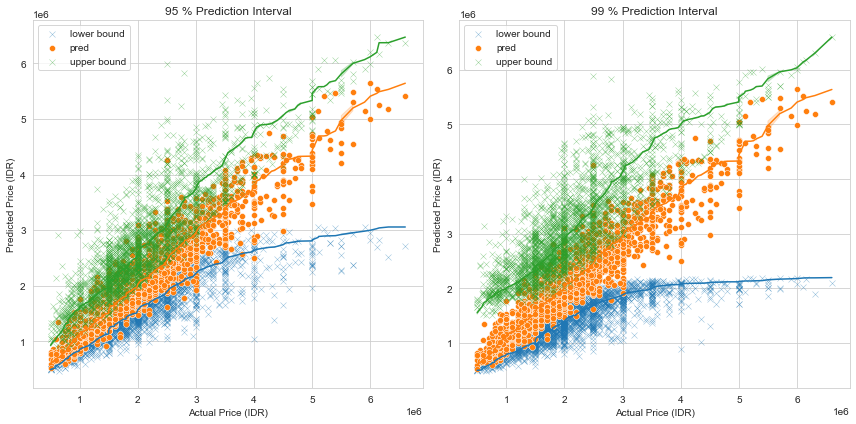

In [128]:
fid, ax = plt.subplots(figsize = (12, 6), nrows = 1, ncols = 2)

# 95% prediction interval 
sns.scatterplot(pred_interval['Actual Price'], pred_interval['Quantile 0.05'], marker = 'x', label = 'lower bound', ax = ax[0], alpha = 0.5)
sns.scatterplot(pred_interval['Actual Price'], pred_interval['Predicted Price'], label = 'pred', ax = ax[0])
sns.scatterplot(pred_interval['Actual Price'], pred_interval['Quantile 0.95'], marker = 'x', label = 'upper bound', ax = ax[0], alpha = 0.5)
sns.lineplot(sorted(pred_interval['Actual Price']), sorted(pred_interval['Quantile 0.05']), ax = ax[0])
sns.lineplot(sorted(pred_interval['Actual Price']), sorted(pred_interval['Predicted Price']), ax = ax[0])
sns.lineplot(sorted(pred_interval['Actual Price']), sorted(pred_interval['Quantile 0.95']), ax = ax[0])
ax[0].set_xlabel('Actual Price (IDR)')
ax[0].set_ylabel('Predicted Price (IDR)')
ax[0].set_title('95 % Prediction Interval')

# 99% prediction interval 
sns.scatterplot(pred_interval['Actual Price'], pred_interval['Quantile 0.01'], marker = 'x', label = 'lower bound', ax = ax[1], alpha = 0.5)
sns.scatterplot(pred_interval['Actual Price'], pred_interval['Predicted Price'], label = 'pred', ax = ax[1])
sns.scatterplot(pred_interval['Actual Price'], pred_interval['Quantile 0.99'], marker = 'x', label = 'upper bound', ax = ax[1], alpha = 0.5)
sns.lineplot(sorted(pred_interval['Actual Price']), sorted(pred_interval['Quantile 0.01']), ax = ax[1])
sns.lineplot(sorted(pred_interval['Actual Price']), sorted(pred_interval['Predicted Price']), ax = ax[1])
sns.lineplot(sorted(pred_interval['Actual Price']), sorted(pred_interval['Quantile 0.99']), ax = ax[1])
ax[1].set_xlabel('Actual Price (IDR)')
ax[1].set_ylabel('Predicted Price (IDR)')
ax[1].set_title('99 % Prediction Interval')
plt.tight_layout()
plt.show()

In [129]:
# save the model
import pickle
regressor_names = ['LGBM_final', 'LGBM_095', 'LGBM_005', 'LGBM_099', 'LGBM_001']
for name, reg in (zip(regressor_names, regressors)):
    pickle.dump(reg, open('model/{}.sav'.format(name), 'wb'))

In [130]:
# save the dataset after preprocessed
df_model = pd.concat([X_data, y_data], axis = 1)
df_model.to_csv('dataset/Kost Data (For Modelling).csv', index = False)

In [131]:
# save the dataset before preprocessed
df_common.to_csv('dataset/Kost Data (For EDA).csv', index = False)

In [132]:
# save ordinal encoder and one-hot encoder objects as they will be used later for model deployment
pickle.dump(pl_features_tree.transformer_list[1][1].steps[1][1], open('model/OHE.sav', 'wb'))
pickle.dump(pl_features_tree.transformer_list[2][1].steps[1][1], open('model/OE.sav', 'wb'))

# Model interpretation

## Feature importance

Feature importance is one of many machine learning model interpretation techniques. It will rank each feature based on how many times each feature has been used to split the decision trees within the LightGBM model. The more a feature is used to split trees, the more important it is.

Here are some insights that we can get from feature importance:
- The top 5 most important features are `luas_kost`, `total_fasilitas`, `total_fasilitas_kamar`, `total_fasilitas_gedung`, and `fasilitas_kamar_tipe kasur`.
- Surprisingly It looks like that near building objects are at the top 10 feature importances, but not all near building objects share the same importance. Mall (`sekitar_gedung_mall`), School (`sekitar_gedung_sekolah`), and Transportation Access (`sekitar_gedung_akses transportasi`) are more important than Supermarket (`sekitar_gedung_supermarket`) and Healthcare Access (`sekitar_gedung_akses kesehatan`). Usually, a boarding house located 'strategically' has higher monthly rent price.
- It turns out that `area parkir`, `fasilitas_kamar_meja`, `cctv`, `fasilitas_kamar_lemari`, and `fasilitas_kamar_kursi` are the facilities which are at the bottom 5 of feature importance. I am not surprised with this fact because most of the boarding houses in Jakarta commonly have such facilities. That is why the presence of those facilities hardly affect on estimating the monthly rent prices.

In [133]:
feature_importance = pd.DataFrame({'Feature name':features,
                                   'Importance':LGBM_final.feature_importances_}).sort_values('Importance', ascending = False).reset_index(drop = True)
feature_importance['Rank'] = np.arange(1, feature_importance.shape[0] + 1)
feature_importance

Feature name  Importance  Rank
0                             luas_kost        1338     1
1                       total_fasilitas        1091     2
2                 total_fasilitas_kamar         796     3
3                total_fasilitas_gedung         764     4
4            fasilitas_kamar_tipe kasur         417     5
5                  kota_Jakarta Selatan         257     6
6                   sekitar_gedung_mall         243     7
7                sekitar_gedung_sekolah         231     8
8     sekitar_gedung_akses transportasi         220     9
9                      cleaning service         219    10
10                               kompor         214    11
11                 tempat jemur pakaian         214    12
12            ruang santai / ruang tamu         214    13
13                              laundry         213    14
14                               kulkas         196    15
15                   kota_Jakarta Pusat         195    16
16                    jenis_kost_campur         190    17
17                   fasilitas_kamar_tv         188    18
18                            microwave         184    19
19                        jakarta_check         184    20
20                           area makan         175    21
21             fasilitas_kamar_wastafel         175    22
22  fasilitas_kamar_jendela kearah luar         169    23
23    fasilitas_kamar_kamar mandi dalam         164    24
24           sekitar_gedung_supermarket         154    25
25                            dispenser         152    26
26                   kota_Jakarta Timur         148    27
27     fasilitas_kamar_termasuk listrik         145    28
28          fasilitas_kamar_pemanas air         141    29
29                fasilitas_kamar_sprei         139    30
30       sekitar_gedung_akses kesehatan         137    31
31                                dapur         136    32
32               fasilitas_kamar_shower         132    33
33             fasilitas_kamar_tv kabel         130    34
34         fasilitas_kamar_jumlah kasur         122    35
35                                 wifi         117    36
36                   fasilitas_kamar_ac         108    37
37                           kota_Depok         102    38
38                           mesin cuci         102    39
39                fasilitas_kamar_kursi          91    40
40                   kota_Jakarta Barat          88    41
41               fasilitas_kamar_lemari          80    42
42                                 cctv          79    43
43                 fasilitas_kamar_meja          66    44
44                       kota_Tangerang          65    45
45                          area parkir          62    46
46                         kota_Bandung          39    47
47                   kota_Jakarta Utara          19    48

## SHAP values

The other technique to interpret a machine learning model is SHAP (SHapley Additive exPlanations) values. Unlike feature importance, this technique does tell us how is the contribution of each feature to the output prediction. In other words, we can see how the model makes its output prediction based on the contribution of each feature to their output prediction.

The SHAP values are computed for each data point that we have, and each feature of a data point has its own SHAP values. For example if we have 1000 data points, then we exactly have 1000 SHAP values multiply by all of feature that we have.

Here are some insights that we can get from SHAP values:
- According to the SHAP values, `total_fasilitas_kamar` is the most impactful feature, followed by `luas_kost`, `fasilitas_kamar_pemanas_air`. On average `total_fasilitas_kamar` gives the highest contibution to estimate the increasing or decreasing monthly rent price, followed by `luas_kost`, `fasilitas_kamar_pemanas_air`.
- It seems that the most expensive facility that exist in boarding house is Water Heater (`fasilitas_kamar_penamas_air`), followed by AC (`fasilitas_kamar_ac`).
- The model also capture that Parking Area (`area parkir`) and CCTV (`cctv`) are the cheapest facilities in boarding house. In fact, It's a must for a boarding house to have those two facilities, and every person usually wants that those facilites exist in her/his boarding house so that is why those facilities hardly affect the prediction of monthly rent price.

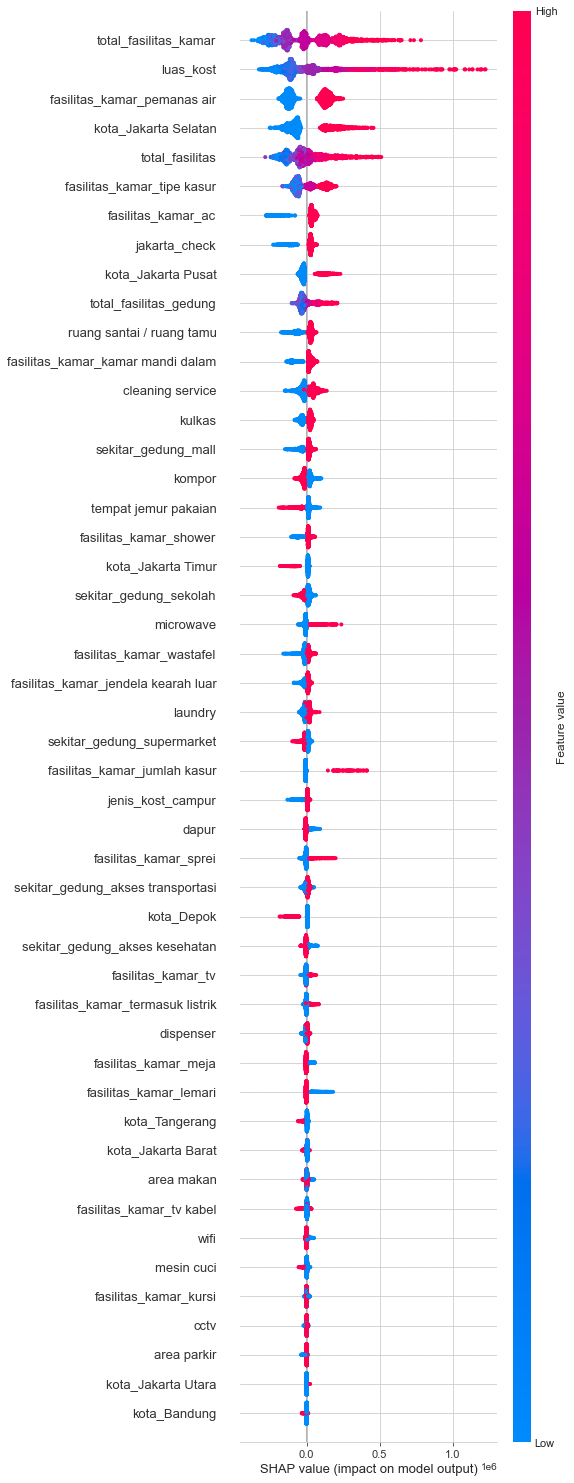

In [134]:
# bee swarm plot: plotting all of the calculated SHAP values of all data points onto a bee swarm plot
import shap
explainer = shap.Explainer(LGBM_final)
shap_values = explainer(X_data)
shap.summary_plot(shap_values, X_data, max_display = 50)

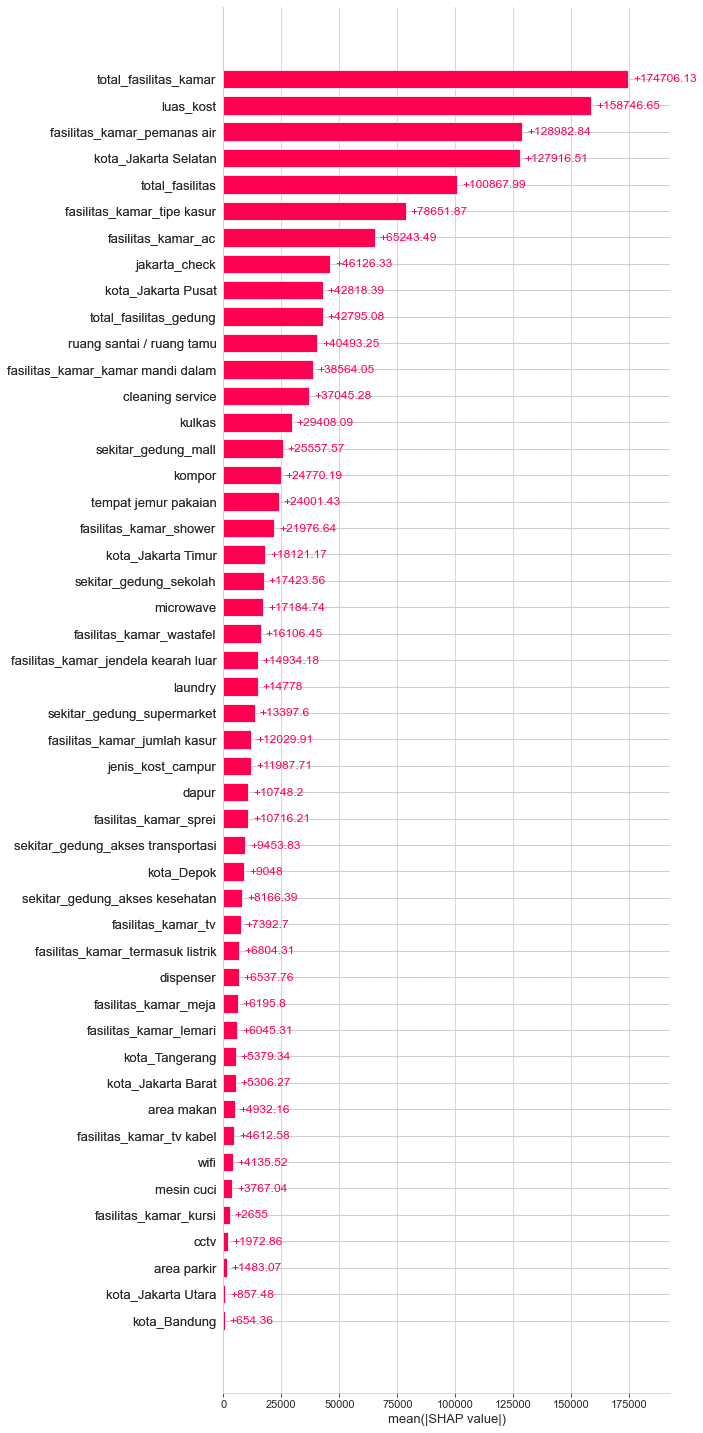

In [135]:
# bar plot: plotting the average of absolute SHAP values for each feature onto a bar plot
shap.plots.bar(shap_values, max_display = 50)